<a href="https://colab.research.google.com/github/Riadhchibani/AI_PROJECT/blob/main/mutli_modal_main_without_final_model_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning data

**Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

Data cleaning

In [ ]:
dataF = pd.read_csv('/content/labels_brset.csv', sep = ',')
dataF.head()
#index the dataF with image_id
dataF.set_index('image_id', inplace=True)

In [ ]:
print(dataF.columns)

Index(['patient_id', 'camera', 'patient_age', 'comorbidities',
       'diabetes_time_y', 'insuline', 'patient_sex', 'exam_eye', 'diabetes',
       'nationality', 'optic_disc', 'vessels', 'macula', 'DR_SDRG', 'DR_ICDR',
       'focus', 'Illuminaton', 'image_field', 'artifacts',
       'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
       'vascular_occlusion', 'hypertensive_retinopathy', 'drusens',
       'hemorrhage', 'retinal_detachment', 'myopic_fundus',
       'increased_cup_disc', 'other', 'quality'],
      dtype='object')


In [ ]:
dataF.describe()

patient_id   patient_age   patient_sex      exam_eye       vessels  \
count  16266.000000  10820.000000  16266.000000  16266.000000  16266.000000   
mean    4275.474302     57.655453      1.617976      1.498647      1.049613   
std     2463.584452     18.261783      0.485897      0.500014      0.217150   
min        1.000000      5.000000      1.000000      1.000000      1.000000   
25%     2158.250000     47.000000      1.000000      1.000000      1.000000   
50%     4270.000000     61.000000      2.000000      1.000000      1.000000   
75%     6420.750000     71.000000      2.000000      2.000000      1.000000   
max     8524.000000     97.000000      2.000000      2.000000      2.000000   

             macula       DR_SDRG       DR_ICDR         focus   Illuminaton  \
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000   
mean       1.287532      0.180930      0.176933      1.033137      1.005164   
std        0.452626      0.747103      0.722515      0.179684      0.071678   
min        1.000000      0.000000      0.000000      0.000000      1.000000   
25%        1.000000      0.000000      0.000000      1.000000      1.000000   
50%        1.000000      0.000000      0.000000      1.000000      1.000000   
75%        2.000000      0.000000      0.000000      1.000000      1.000000   
max        2.000000      4.000000      4.000000      2.000000      2.000000   

       ...         nevus           amd  vascular_occlusion  \
count  ...  16266.000000  16266.000000        16266.000000   
mean   ...      0.007992      0.018382            0.006209   
std    ...      0.089043      0.134332            0.078556   
min    ...      0.000000      0.000000            0.000000   
25%    ...      0.000000      0.000000            0.000000   
50%    ...      0.000000      0.000000            0.000000   
75%    ...      0.000000      0.000000            0.000000   
max    ...      1.000000      1.000000            1.000000   

       hypertensive_retinopathy       drusens    hemorrhage  \
count              16266.000000  16266.000000  16266.000000   
mean                   0.017460      0.174167      0.005840   
std                    0.130981      0.379265      0.076201   
min                    0.000000      0.000000      0.000000   
25%                    0.000000      0.000000      0.000000   
50%                    0.000000      0.000000      0.000000   
75%                    0.000000      0.000000      0.000000   
max                    1.000000      1.000000      1.000000   

       retinal_detachment  myopic_fundus  increased_cup_disc         other  
count        16266.000000   16266.000000        16266.000000  16266.000000  
mean             0.000430       0.016599            0.197037      0.050412  
std              0.020741       0.127767            0.397773      0.218800  
min              0.000000       0.000000            0.000000      0.000000  
25%              0.000000       0.000000            0.000000      0.000000  
50%              0.000000       0.000000            0.000000      0.000000  
75%              0.000000       0.000000            0.000000      0.000000  
max              1.000000       1.000000            1.000000      1.000000  

[8 rows x 25 columns]

In [ ]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16266 entries, img00001 to img16266
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                16266 non-null  int64  
 1   camera                    16266 non-null  object 
 2   patient_age               10820 non-null  float64
 3   comorbidities             8029 non-null   object 
 4   diabetes_time_y           1910 non-null   object 
 5   insuline                  1714 non-null   object 
 6   patient_sex               16266 non-null  int64  
 7   exam_eye                  16266 non-null  int64  
 8   diabetes                  16266 non-null  object 
 9   nationality               16266 non-null  object 
 10  optic_disc                16266 non-null  object 
 11  vessels                   16266 non-null  int64  
 12  macula                    16266 non-null  int64  
 13  DR_SDRG                   16266 non-null  int64  
 14  D

droping all features can not help us

1.   image_id
2.   patient_id
3.   camera
4.   nationality
5.   focus
5.   Illuminaton
5.   image_field
5.   artifacts
5.   quality
5.   other

In [ ]:
dataF = dataF.drop(columns=[ 'patient_id', 'camera', 'nationality', 'focus', 'Illuminaton', 'image_field', 'artifacts', 'quality', 'other'])
dataF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16266 entries, img00001 to img16266
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_age               10820 non-null  float64
 1   comorbidities             8029 non-null   object 
 2   diabetes_time_y           1910 non-null   object 
 3   insuline                  1714 non-null   object 
 4   patient_sex               16266 non-null  int64  
 5   exam_eye                  16266 non-null  int64  
 6   diabetes                  16266 non-null  object 
 7   optic_disc                16266 non-null  object 
 8   vessels                   16266 non-null  int64  
 9   macula                    16266 non-null  int64  
 10  DR_SDRG                   16266 non-null  int64  
 11  DR_ICDR                   16266 non-null  int64  
 12  diabetic_retinopathy      16266 non-null  int64  
 13  macular_edema             16266 non-null  int64  
 14  s

the age : filling by the mean for each gender

In [ ]:
dataF['patient_age'].unique()

array([48., 18., 22., 23., 14., 20., 28., 13., 37., 21., 16., 24., 26.,
       19., 42., 17., 27., 39., 25., 30., 29., 15., 32., 57., 44., 38.,
       47., 34., 10., 59., 66., 82., 77., 68., 72., 87., 80., 41., 76.,
       91., 71., 73., 83., 31., 45., 61., 55., 75., 81., 64., 63., 46.,
       74., 65., 33., 53., 50., 51., 69., 49., 62., 52., 70., 79., 84.,
       60., 78., 54., 56., 58., 85., 86., 11., 40., nan,  9., 36., 90.,
       67., 88.,  7., 35., 43., 89., 12.,  8., 95., 93., 97.,  6., 94.,
        5., 92.])

In [ ]:
dataF['patient_age'] = dataF.groupby('patient_sex')['patient_age'].transform(lambda x: x.fillna(x.mean()))
dataF['patient_age'].describe()

count    16266.000000
mean        57.622969
std         14.914914
min          5.000000
25%         55.000000
50%         58.684427
75%         66.000000
max         97.000000
Name: patient_age, dtype: float64

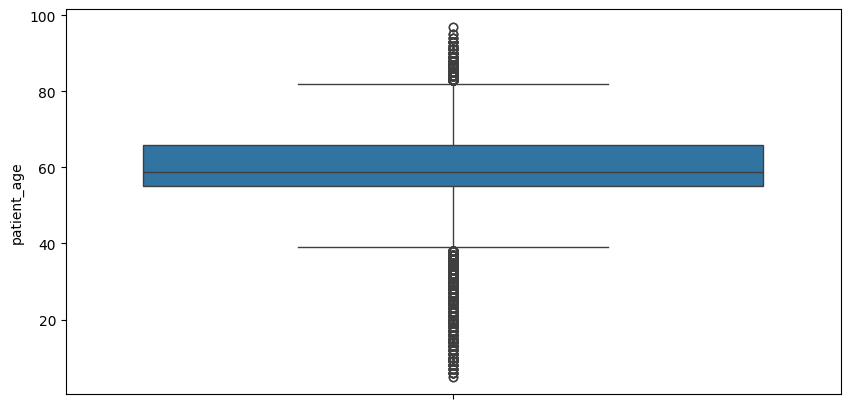

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF['patient_age'])
plt.show()

In [ ]:
print(dataF['patient_age'].describe())
print('null value count' , dataF['patient_age'].isna().sum())

count    16266.000000
mean        57.622969
std         14.914914
min          5.000000
25%         55.000000
50%         58.684427
75%         66.000000
max         97.000000
Name: patient_age, dtype: float64
null value count 0


In [ ]:
# change the type patient_age from float to int
dataF['patient_age'] = dataF['patient_age'].astype(int)

replace and fill the missing value for the column **diabetes_time_y**

In [ ]:
print(dataF['diabetes_time_y'].unique())

['12' '7' '11' '1' '20' '5' '9' '2' '3' '14' '4' '15' '23' '13' '10' '8'
 nan '16' '17' '6' '25' '18' '19' '22' '0,5' '37' '26' '40' '30' '0,20'
 '10,00' '38' '0,2' '21' '24' '35' '27' '32' '29' '45' '28' '43' '1,5'
 '50' '0,1' '49' '41' '0,3' '34' '60' '1O' '0,8' '51' 'Não' '39' '31']


In [ ]:
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].replace('Não', np.nan)
dataF['diabetes_time_y']

image_id
img00001     12
img00002     12
img00003      7
img00004      7
img00005     11
           ... 
img16262     14
img16263      4
img16264      4
img16265    NaN
img16266    NaN
Name: diabetes_time_y, Length: 16266, dtype: object

In [ ]:
print(dataF['diabetes_time_y'].unique())

['12' '7' '11' '1' '20' '5' '9' '2' '3' '14' '4' '15' '23' '13' '10' '8'
 nan '16' '17' '6' '25' '18' '19' '22' '0,5' '37' '26' '40' '30' '0,20'
 '10,00' '38' '0,2' '21' '24' '35' '27' '32' '29' '45' '28' '43' '1,5'
 '50' '0,1' '49' '41' '0,3' '34' '60' '1O' '0,8' '51' '39' '31']


In [ ]:
print(dataF['diabetes_time_y'].apply(type).value_counts())

diabetes_time_y
<class 'float'>    14357
<class 'str'>       1909
Name: count, dtype: int64


In [ ]:
print(dataF['diabetes_time_y'].describe())
print("null value count " ,dataF['diabetes_time_y'].isna().sum())
dataF['diabetes_time_y'].unique()

count     1909
unique      54
top         10
freq       252
Name: diabetes_time_y, dtype: object
null value count  14357


array(['12', '7', '11', '1', '20', '5', '9', '2', '3', '14', '4', '15',
       '23', '13', '10', '8', nan, '16', '17', '6', '25', '18', '19',
       '22', '0,5', '37', '26', '40', '30', '0,20', '10,00', '38', '0,2',
       '21', '24', '35', '27', '32', '29', '45', '28', '43', '1,5', '50',
       '0,1', '49', '41', '0,3', '34', '60', '1O', '0,8', '51', '39',
       '31'], dtype=object)

In [ ]:
# dataF['diabetes_time_y'] = (
#      pd.to_numeric(dataF['diabetes_time_y'], errors='coerce')  # Convert safely
#      .fillna(0)                                                # Replace NaNs
#      .astype(float)                                              # Final cast
#  )
# dataF['diabetes_time_y'] = pd.to_numeric(dataF['diabetes_time_y'], errors='coerce')
# dataF['diabetes_time_y'] = dataF['diabetes_time_y'].apply(lambda x: float(x) if pd.notna(x) and str(x).lower() != 'unknown' else np.nan)
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].apply(lambda x: float(str(x).replace(',', '.')) if pd.notna(x) and str(x).replace(',', '.').replace('.', '', 1).isdigit() else np.nan)



In [ ]:
dataF['diabetes_time_y'].unique()

array([12. ,  7. , 11. ,  1. , 20. ,  5. ,  9. ,  2. ,  3. , 14. ,  4. ,
       15. , 23. , 13. , 10. ,  8. ,  nan, 16. , 17. ,  6. , 25. , 18. ,
       19. , 22. ,  0.5, 37. , 26. , 40. , 30. ,  0.2, 38. , 21. , 24. ,
       35. , 27. , 32. , 29. , 45. , 28. , 43. ,  1.5, 50. ,  0.1, 49. ,
       41. ,  0.3, 34. , 60. ,  0.8, 51. , 39. , 31. ])

In [ ]:
#fill the null value by the mean of 'diabetes_time_y' column and not above the age of patient
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(lambda x: x.fillna(x.mean()))


In [ ]:
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
# print(dataF['diabetes_time_y'].describe())
# print("null value count " ,dataF['diabetes_time_y'].isna().sum())
dataF['diabetes_time_y'].unique()

array([12.        ,  7.        , 11.        ,  1.        , 20.        ,
        5.        ,  9.        ,  2.        ,  3.        , 14.        ,
        4.        , 15.        , 23.        , 13.        , 10.        ,
        8.        ,  3.16666667, 16.        , 17.        , 10.94117647,
        6.        , 25.        , 18.        , 19.        , 12.28571429,
       19.33333333, 22.        ,  0.5       , 37.        , 26.        ,
       17.83333333, 16.59649123, 17.10714286, 30.58823529,  9.9375    ,
        5.33333333, 12.69444444, 10.84615385, 11.2       , 16.125     ,
       18.228125  , 13.20454545, 11.37837838, 10.22142857, 12.7625    ,
       13.81818182, 11.93617021, 11.40930233, 12.92592593, 10.69387755,
       11.77647059, 11.36666667, 13.97777778, 13.92682927, 12.66666667,
       12.92307692, 14.8       , 25.66666667, 13.21428571, 16.4       ,
       10.15      , 13.31481481, 15.48571429, 19.05882353,  8.92352941,
       14.1875    , 13.13513514, 15.57142857, 13.55555556, 14.66

In [ ]:
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].fillna(0)

In [ ]:
# Select rows where diabetes_time_y is NaN
nan_rows = dataF[dataF['diabetes_time_y'].isnull()]


nan_counts = dataF[dataF['diabetes_time_y'].isnull()].groupby('patient_age').size()
print(nan_counts)

Series([], dtype: int64)


In [ ]:
dataF['diabetes_time_y'].unique()

array([12.        ,  7.        , 11.        ,  1.        , 20.        ,
        5.        ,  9.        ,  2.        ,  3.        , 14.        ,
        4.        , 15.        , 23.        , 13.        , 10.        ,
        8.        ,  3.16666667, 16.        , 17.        , 10.94117647,
        6.        , 25.        , 18.        , 19.        , 12.28571429,
       19.33333333, 22.        ,  0.5       , 37.        , 26.        ,
       17.83333333, 16.59649123, 17.10714286, 30.58823529,  9.9375    ,
        5.33333333, 12.69444444, 10.84615385, 11.2       , 16.125     ,
       18.228125  , 13.20454545, 11.37837838, 10.22142857, 12.7625    ,
       13.81818182, 11.93617021, 11.40930233, 12.92592593, 10.69387755,
       11.77647059, 11.36666667, 13.97777778, 13.92682927, 12.66666667,
       12.92307692, 14.8       , 25.66666667, 13.21428571, 16.4       ,
       10.15      , 13.31481481, 15.48571429, 19.05882353,  8.92352941,
       14.1875    , 13.13513514, 15.57142857, 13.55555556, 14.66

In [ ]:
age_58_rows = dataF[dataF['patient_age'] == 55]
print(age_58_rows.count)


<bound method DataFrame.count of           patient_age           comorbidities  diabetes_time_y insuline  \
image_id                                                                  
img00377           55            hypertension             12.0      NaN   
img00774           55                migraine             12.0      NaN   
img00775           55                migraine             12.0      NaN   
img00776           55  diabetes, hypertension             12.0      NaN   
img00777           55  diabetes, hypertension             12.0      NaN   
...               ...                     ...              ...      ...   
img15878           55            hypertension             12.0      NaN   
img16057           55                     NaN             12.0      NaN   
img16058           55                     NaN             12.0      NaN   
img16114           55                       0             12.0      NaN   
img16115           55                       0             12.0     

In [ ]:
print(dataF.isnull().sum())

patient_age                     0
comorbidities                8237
diabetes_time_y                 0
insuline                    14552
patient_sex                     0
exam_eye                        0
diabetes                        0
optic_disc                      0
vessels                         0
macula                          0
DR_SDRG                         0
DR_ICDR                         0
diabetic_retinopathy            0
macular_edema                   0
scar                            0
nevus                           0
amd                             0
vascular_occlusion              0
hypertensive_retinopathy        0
drusens                         0
hemorrhage                      0
retinal_detachment              0
myopic_fundus                   0
increased_cup_disc              0
dtype: int64


In [ ]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])
#print(dataF.loc[34])

          diabetes_time_y  patient_age
image_id                              
img00035             23.0           22
img00036             23.0           22
img00219             23.0           22
img00220             23.0           22


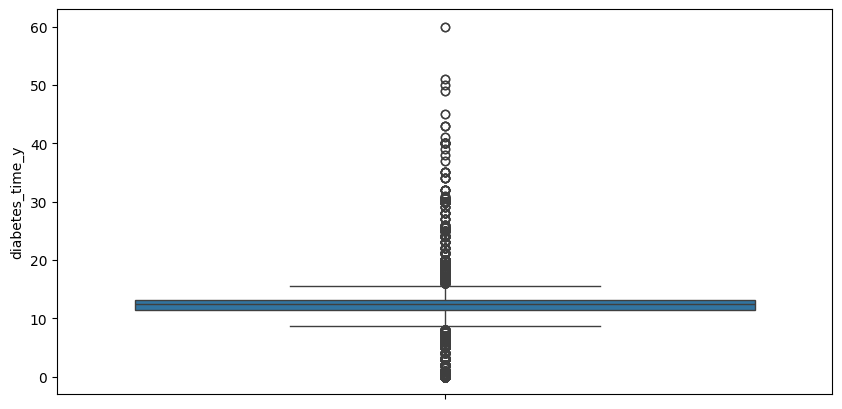

In [ ]:
#boxplot for 'diabetes_time_y'
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF['diabetes_time_y'])
plt.show()

In [ ]:
dataF['diabetes_time_y'].unique()

array([12.        ,  7.        , 11.        ,  1.        , 20.        ,
        5.        ,  9.        ,  2.        ,  3.        , 14.        ,
        4.        , 15.        , 23.        , 13.        , 10.        ,
        8.        ,  3.16666667, 16.        , 17.        , 10.94117647,
        6.        , 25.        , 18.        , 19.        , 12.28571429,
       19.33333333, 22.        ,  0.5       , 37.        , 26.        ,
       17.83333333, 16.59649123, 17.10714286, 30.58823529,  9.9375    ,
        5.33333333, 12.69444444, 10.84615385, 11.2       , 16.125     ,
       18.228125  , 13.20454545, 11.37837838, 10.22142857, 12.7625    ,
       13.81818182, 11.93617021, 11.40930233, 12.92592593, 10.69387755,
       11.77647059, 11.36666667, 13.97777778, 13.92682927, 12.66666667,
       12.92307692, 14.8       , 25.66666667, 13.21428571, 16.4       ,
       10.15      , 13.31481481, 15.48571429, 19.05882353,  8.92352941,
       14.1875    , 13.13513514, 15.57142857, 13.55555556, 14.66

In [ ]:
# type dataF['diabetes_time_y']
print(dataF['diabetes_time_y'].apply(type).value_counts())
print((dataF['diabetes_time_y']).sum())
print((dataF['diabetes_time_y'] < 0.5).sum())

diabetes_time_y
<class 'float'>    16266
Name: count, dtype: int64
205026.24361723685
186


In [ ]:
# # first attempt
# plt.figure(figsize=(10, 5))
# filtered_df = dataF[dataF['diabetes_time_y'] < 0.5]
# sns.boxplot(data=filtered_df['diabetes_time_y'])
# plt.show()

fixing **diabtec** field

In [ ]:
dataF['diabetes'].unique()

array(['yes', 'No'], dtype=object)

In [ ]:
# change yes with 1 and No with 0
dataF['diabetes'] = dataF['diabetes'].replace({'yes': 1, 'No': 0})
dataF['diabetes'].unique()

array([1, 0])

fill the miss values of **insuline** field

In [ ]:
dataF['insuline'].describe()

count     1714
unique       2
top        yes
freq       893
Name: insuline, dtype: object

In [ ]:
print(dataF['insuline'].isna().sum())

14552


In [ ]:
dataF['insuline'].unique()

array(['yes', 'no', nan], dtype=object)

In [ ]:
# replace yes with 1 and no with 0 and keep the NAN value untouched
dataF['insuline'] = dataF['insuline'].replace({'yes': 1, 'no': 0})
dataF['insuline'].unique()

array([ 1.,  0., nan])

In [ ]:
# Assuming your DataFrame is called df
features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
            'diabetic_retinopathy', 'macular_edema',
            'hypertensive_retinopathy', 'vascular_occlusion']

for feature in features:
    missing_count = dataF[feature].isnull().sum()
    if missing_count != 0:
        print(f"{feature}: {missing_count} missing values")

In [ ]:
features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
            'diabetic_retinopathy', 'macular_edema',
            'hypertensive_retinopathy', 'vascular_occlusion']

# Split data into rows with known and unknown 'insuline' values
df_known = dataF[dataF['insuline'].notnull()]
df_unknown = dataF[dataF['insuline'].isnull()]

# Prepare training data
X = df_known[features]
y = df_known['insuline']

# Impute missing values in features (if any)
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Prepare data for prediction
X_unknown = df_unknown[features]
X_unknown = imputer.transform(X_unknown)

# Predict missing 'insuline' values
predicted_insuline = model.predict(X_unknown)

# Fill missing values in the original dataset
dataF.loc[dataF['insuline'].isnull(), 'insuline'] = predicted_insuline

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# import pandas as pd
# import numpy as np

# # --- Features to use ---
# features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
#             'diabetic_retinopathy', 'macular_edema',
#             'hypertensive_retinopathy', 'vascular_occlusion']

# # --- Split data ---
# df_known = dataF[dataF['insuline'].notnull()]
# df_unknown = dataF[dataF['insuline'].isnull()]

# # --- Training data ---
# X = df_known[features]
# y = df_known['insuline']

# # --- Impute missing values ---
# imputer = SimpleImputer(strategy='most_frequent')
# X = imputer.fit_transform(X)

# # --- Classifiers to compare ---
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Support Vector Machine": SVC()
# }

# # --- Cross-validation setup ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# print("Model Evaluation with Cross-Validation:")
# print("-" * 50)

# # --- Evaluate each model ---
# for name, model in models.items():
#     acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
#     f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_macro').mean()
#     prec = cross_val_score(model, X, y, cv=cv, scoring='precision_macro').mean()
#     rec = cross_val_score(model, X, y, cv=cv, scoring='recall_macro').mean()

#     print(f"{name}")
#     print(f"  Accuracy : {acc:.3f}")
#     print(f"  F1 Score : {f1:.3f}")
#     print(f"  Precision: {prec:.3f}")
#     print(f"  Recall   : {rec:.3f}")
#     print("-" * 50)

# # --- Choose final model (e.g., Random Forest) ---
# final_model = RandomForestClassifier(random_state=42)
# final_model.fit(X, y)

# # --- Predict missing values ---
# X_unknown = df_unknown[features]
# X_unknown = imputer.transform(X_unknown)
# predicted_insuline = final_model.predict(X_unknown)

# # --- Fill missing values ---
# dataF.loc[dataF['insuline'].isnull(), 'insuline'] = predicted_insuline


In [ ]:
dataF['insuline'] = dataF['insuline'].astype(int)

In [ ]:
dataF['insuline'].unique()

array([1, 0])

In [ ]:
dataF['optic_disc'].unique()

array(['1', '2', 'bv'], dtype=object)

In [ ]:
dataF.count()

patient_age                 16266
comorbidities                8029
diabetes_time_y             16266
insuline                    16266
patient_sex                 16266
exam_eye                    16266
diabetes                    16266
optic_disc                  16266
vessels                     16266
macula                      16266
DR_SDRG                     16266
DR_ICDR                     16266
diabetic_retinopathy        16266
macular_edema               16266
scar                        16266
nevus                       16266
amd                         16266
vascular_occlusion          16266
hypertensive_retinopathy    16266
drusens                     16266
hemorrhage                  16266
retinal_detachment          16266
myopic_fundus               16266
increased_cup_disc          16266
dtype: int64

In [ ]:
matching_rows = dataF[dataF.drop('optic_disc', axis=1).eq(dataF.loc[dataF['optic_disc'] == 'bv'].iloc[0].drop('optic_disc')).all(axis=1)]

In [ ]:
print(matching_rows)

Empty DataFrame
Columns: [patient_age, comorbidities, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, nevus, amd, vascular_occlusion, hypertensive_retinopathy, drusens, hemorrhage, retinal_detachment, myopic_fundus, increased_cup_disc]
Index: []

[0 rows x 24 columns]


In [ ]:
dataF.count()

patient_age                 16266
comorbidities                8029
diabetes_time_y             16266
insuline                    16266
patient_sex                 16266
exam_eye                    16266
diabetes                    16266
optic_disc                  16266
vessels                     16266
macula                      16266
DR_SDRG                     16266
DR_ICDR                     16266
diabetic_retinopathy        16266
macular_edema               16266
scar                        16266
nevus                       16266
amd                         16266
vascular_occlusion          16266
hypertensive_retinopathy    16266
drusens                     16266
hemorrhage                  16266
retinal_detachment          16266
myopic_fundus               16266
increased_cup_disc          16266
dtype: int64

In [ ]:
print(dataF[dataF['optic_disc'] == 'bv'])

          patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
image_id                                                                      
img08220           55           NaN             12.0         1            1   

          exam_eye  diabetes optic_disc  vessels  macula  ...  scar  nevus  \
image_id                                                  ...                
img08220         2         0         bv        1       1  ...     0      0   

          amd  vascular_occlusion  hypertensive_retinopathy  drusens  \
image_id                                                               
img08220    0                   0                         0        0   

          hemorrhage  retinal_detachment  myopic_fundus  increased_cup_disc  
image_id                                                                     
img08220           0                   0              0                   0  

[1 rows x 24 columns]


In [ ]:
exclude_cols = ['optic_disc', 'patient_age', 'comorbidities', 'diabetes_time_y']
dataF['optic_disc'] = pd.to_numeric(dataF['optic_disc'], errors='coerce')

target_row = dataF[dataF['optic_disc'].isna()].iloc[0]
matching_rows = dataF[
    dataF.drop(columns=exclude_cols)
         .eq(target_row.drop(labels=exclude_cols))
         .all(axis=1)
]
print(matching_rows)

          patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
image_id                                                                      
img00409           65           NaN        13.926829         1            1   
img00442           41             0         5.333333         1            1   
img00483           37           NaN        14.666667         1            1   
img00521           60           NaN         8.923529         1            1   
img00523           44             0         6.387500         1            1   
...               ...           ...              ...       ...          ...   
img13836           33      epilepsy        12.666667         1            1   
img13837           55           NaN        12.000000         1            1   
img13839           36           NaN        10.000000         1            1   
img13842           65             0        13.926829         1            1   
img13887           55           NaN        12.000000

In [ ]:
print(matching_rows['optic_disc'].unique())

[ 1.  2. nan]


In [ ]:
print(matching_rows['optic_disc'].count())

906


In [ ]:
print(dataF['optic_disc'].count())

16265


In [ ]:
predicted_value = matching_rows['optic_disc'].mode().iloc[0]

print("Predicted optic_disc value for 'bv' row:", predicted_value)

Predicted optic_disc value for 'bv' row: 1.0


so the bv value will take 1

In [ ]:
dataF.loc[dataF['optic_disc'].isna(), 'optic_disc'] = 1

In [ ]:
dataF['optic_disc'] = dataF['optic_disc'].astype(int)

In [ ]:
dataF['optic_disc'].unique()

array([1, 2])

In [ ]:
print(dataF.dtypes)

patient_age                   int64
comorbidities                object
diabetes_time_y             float64
insuline                      int64
patient_sex                   int64
exam_eye                      int64
diabetes                      int64
optic_disc                    int64
vessels                       int64
macula                        int64
DR_SDRG                       int64
DR_ICDR                       int64
diabetic_retinopathy          int64
macular_edema                 int64
scar                          int64
nevus                         int64
amd                           int64
vascular_occlusion            int64
hypertensive_retinopathy      int64
drusens                       int64
hemorrhage                    int64
retinal_detachment            int64
myopic_fundus                 int64
increased_cup_disc            int64
dtype: object


In [ ]:
dataF['patient_age'] = dataF['patient_age'].astype(int)

In [ ]:
print(dataF.dtypes)

patient_age                   int64
comorbidities                object
diabetes_time_y             float64
insuline                      int64
patient_sex                   int64
exam_eye                      int64
diabetes                      int64
optic_disc                    int64
vessels                       int64
macula                        int64
DR_SDRG                       int64
DR_ICDR                       int64
diabetic_retinopathy          int64
macular_edema                 int64
scar                          int64
nevus                         int64
amd                           int64
vascular_occlusion            int64
hypertensive_retinopathy      int64
drusens                       int64
hemorrhage                    int64
retinal_detachment            int64
myopic_fundus                 int64
increased_cup_disc            int64
dtype: object


In [ ]:
dataF.describe()

patient_age  diabetes_time_y      insuline   patient_sex  \
count  16266.000000     16266.000000  16266.000000  16266.000000   
mean      57.363765        12.604589      0.346736      1.617976   
std       14.923971         4.669618      0.475945      0.485897   
min        5.000000         0.000000      0.000000      1.000000   
25%       55.000000        11.409302      0.000000      1.000000   
50%       58.000000        12.516216      0.000000      2.000000   
75%       66.000000        13.214286      1.000000      2.000000   
max       97.000000        60.000000      1.000000      2.000000   

           exam_eye      diabetes    optic_disc       vessels        macula  \
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000   
mean       1.498647      0.158552      1.201586      1.049613      1.287532   
std        0.500014      0.365269      0.401197      0.217150      0.452626   
min        1.000000      0.000000      1.000000      1.000000      1.000000   
25%        1.000000      0.000000      1.000000      1.000000      1.000000   
50%        1.000000      0.000000      1.000000      1.000000      1.000000   
75%        2.000000      0.000000      1.000000      1.000000      2.000000   
max        2.000000      1.000000      2.000000      2.000000      2.000000   

            DR_SDRG  ...          scar         nevus           amd  \
count  16266.000000  ...  16266.000000  16266.000000  16266.000000   
mean       0.180930  ...      0.017890      0.007992      0.018382   
std        0.747103  ...      0.132556      0.089043      0.134332   
min        0.000000  ...      0.000000      0.000000      0.000000   
25%        0.000000  ...      0.000000      0.000000      0.000000   
50%        0.000000  ...      0.000000      0.000000      0.000000   
75%        0.000000  ...      0.000000      0.000000      0.000000   
max        4.000000  ...      1.000000      1.000000      1.000000   

       vascular_occlusion  hypertensive_retinopathy       drusens  \
count        16266.000000              16266.000000  16266.000000   
mean             0.006209                  0.017460      0.174167   
std              0.078556                  0.130981      0.379265   
min              0.000000                  0.000000      0.000000   
25%              0.000000                  0.000000      0.000000   
50%              0.000000                  0.000000      0.000000   
75%              0.000000                  0.000000      0.000000   
max              1.000000                  1.000000      1.000000   

         hemorrhage  retinal_detachment  myopic_fundus  increased_cup_disc  
count  16266.000000        16266.000000   16266.000000        16266.000000  
mean       0.005840            0.000430       0.016599            0.197037  
std        0.076201            0.020741       0.127767            0.397773  
min        0.000000            0.000000       0.000000            0.000000  
25%        0.000000            0.000000       0.000000            0.000000  
50%        0.000000            0.000000       0.000000            0.000000  
75%        0.000000            0.000000       0.000000            0.000000  
max        1.000000            1.000000       1.000000            1.000000  

[8 rows x 23 columns]

catch wrong data

In [ ]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])
#print(dataF.loc[34])

          diabetes_time_y  patient_age
image_id                              
img00035             23.0           22
img00036             23.0           22
img00219             23.0           22
img00220             23.0           22


In [ ]:
target_indices = ['img00035', 'img00036', 'img00219', 'img00220']
print(dataF.loc[target_indices])
# Update diabetes_time_y to be patient_age - 1 for those rows
dataF.loc[target_indices, 'diabetes_time_y'] = dataF.loc[target_indices, 'patient_age'] - 1

          patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
image_id                                                                      
img00035           22     diabetes1             23.0         1            1   
img00036           22     diabetes1             23.0         1            1   
img00219           22     diabetes1             23.0         1            2   
img00220           22     diabetes1             23.0         1            2   

          exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  \
image_id                                                   ...                
img00035         1         1           1        1       1  ...     0      0   
img00036         2         1           1        1       1  ...     0      0   
img00219         1         1           1        2       1  ...     0      0   
img00220         2         1           1        2       1  ...     0      0   

          amd  vascular_occlusion  hypertensive_re

In [ ]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])

Empty DataFrame
Columns: [diabetes_time_y, patient_age]
Index: []


In [ ]:
print(dataF.loc[target_indices])

          patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
image_id                                                                      
img00035           22     diabetes1             21.0         1            1   
img00036           22     diabetes1             21.0         1            1   
img00219           22     diabetes1             21.0         1            2   
img00220           22     diabetes1             21.0         1            2   

          exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  \
image_id                                                   ...                
img00035         1         1           1        1       1  ...     0      0   
img00036         2         1           1        1       1  ...     0      0   
img00219         1         1           1        2       1  ...     0      0   
img00220         2         1           1        2       1  ...     0      0   

          amd  vascular_occlusion  hypertensive_re

comorbidities field need to make it numeric

In [ ]:
dataF['comorbidities'].unique()

array(['diabetes1', 'diabetes1, hypertension', 'diabetes, hypertension',
       'dyslipidemia', 'hypertension',
       'acute myocardium infarct, encephalic vascular accident', nan, '0',
       'hyperthyroidism', 'cerebral palsy', 'diabetes',
       'human immunodeficiency virus', 'encephalic vascular accident',
       'diabetes, dyslipidemia, hypothyroidism', 'hypothyroidism',
       'hypertension , hypothyroidism', 'asthma', 'lupus', 'parkinson',
       'rhinitis', 'diabetes, arrhythmia', 'rheumatoid arthritis',
       'hypertension , rheumatoid arthritis', 'migraine',
       'diabetes, hypertension , hypothyroidism',
       'hypertension , alzheimer', 'hypertension , dyslipidemia',
       'diabetes, hypertension , tabagism',
       'hypothyroidism, hypophysis adenoma', 'syphilis', 'arthrosis',
       'hypertension , cardiac insufficiency', 'hypertension , arthritis',
       'acute myocardium infarct', 'sickle cell anemia, thalassemia',
       'hypertension , chagas', 'cardiopathy', 

In [ ]:
dataF['comorbidities'].describe()

count     8029
unique     213
top          0
freq      2766
Name: comorbidities, dtype: object

In [ ]:
from itertools import chain

diseasesList = []
allComorbiditiesData = dataF['comorbidities'].str.split(",")
unique_comorbidities = set(chain.from_iterable(allComorbiditiesData.dropna()))
#print(unique_comorbidities)
for item in unique_comorbidities:
    if item in dataF.columns:
        print(f"✅ '{item}' exists in the columns.")
    else:
        print(f"❌ '{item}' does NOT exist in the columns.")
        diseasesList.append(item)


❌ 'osteoporosis' does NOT exist in the columns.
❌ ' diabetes' does NOT exist in the columns.
❌ ' parkison' does NOT exist in the columns.
❌ 'trombose' does NOT exist in the columns.
❌ 'diabetes1' does NOT exist in the columns.
❌ 'ankylosing spondylitis' does NOT exist in the columns.
❌ ' parkinson' does NOT exist in the columns.
❌ 'juvenile arthritis' does NOT exist in the columns.
❌ ' hydroxichloroquine' does NOT exist in the columns.
❌ 'adrenal hypoplasia' does NOT exist in the columns.
❌ 'syphilis' does NOT exist in the columns.
❌ 'lung cancer' does NOT exist in the columns.
✅ 'diabetes' exists in the columns.
❌ ' dyslipidemia' does NOT exist in the columns.
❌ 'deep vascular thrombosis' does NOT exist in the columns.
❌ ' intestinal cancer' does NOT exist in the columns.
❌ 'albinism' does NOT exist in the columns.
❌ 'cardiac insufficiency' does NOT exist in the columns.
❌ ' hyperthyroidism' does NOT exist in the columns.
❌ 'human immunodeficiency virus' does NOT exist in the columns.

In [ ]:
# diseasesList = [
#     'cerebrovascular accident', 'rheumatoid arthritis', 'encephalic vascular accident',
#     'parkinson', 'hypertension', 'hepatic transplant', 'hypocholesterolemia', 'arthritis',
#     'hyperthyroidism', 'kidney transplant', 'acute myocardium infarct', 'lupus',
#     'mccune albright', 'trombose', 'hypercholesterolemia', 'cardiac insufficiency',
#     'intracranial hypertension', 'breast cancer', 'osteoporosis', 'cerebral palsy',
#     'pulmonary embolism', 'dyslipidemia', 'chloroquine', 'juvenile arthritis',
#     'human immunodeficiency virus', 'vasculitis', 'psoriasis', 'hydrocephalus',
#     'albinism', 'alzheimer', 'thyroiditis', 'epilepsy', 'valvulopathy',
#     'ulcerative colitis', 'cone dystrophy', 'thalassemia', 'cardiopathy', 'rhinitis',
#     'chronic kidney disease', 'behcet', 'dpoc', 'sickle cell anemia', 'cirrhosis',
#     'hashimoto disease', 'leucemia', 'hydroxychloroquine', 'meningioma', 'dialysis',
#     'chagas', 'migraine', 'prostatic hyperplasia', 'lymphoma', 'multiple sclerosis',
#     'chagas disease', 'catheterism', 'arrhythmia', 'muscular dystrophy', 'arthrosis',
#     'chron disease', 'herpetic encephalitis', 'lung cancer', 'anemia',
#     'adrenal hypoplasia', 'sjogren', 'brain tumor', 'vitiligo', 'intestinal cancer',
#     'obesity', 'sarcoidosis', 'graves disease', 'asthma', 'hypothyroidism',
#     'hepatitis c', 'hepatic cancer', 'deep vascular thrombosis',
#     'syphilis', 'prolactinoma', 'hypophysis adenoma', 'epilepsia', 'tabagism',
#     'down syndrome', 'hypertriglyceridemia', 'chronic obstructive pulmonary disease',
#     'aneurysm', 'fibromyalgia', 'devic', 'ankylosing spondylitis', 'neurofibromatosis',
#     'policitemia vera'
# ]

# Ensure all disease names are lowercase and unique
diseasesList = sorted(set(d.strip().lower() for d in diseasesList))

# Clean and standardize the comorbidities column
dataF['comorbidities_clean'] = dataF['comorbidities'].fillna('').str.lower()

# Create binary columns for each disease
for disease in diseasesList:
    dataF[disease] = dataF['comorbidities_clean'].apply(lambda x: int(disease in x))

In [ ]:
dataF.columns
print(dataF.describe())

        patient_age  diabetes_time_y      insuline   patient_sex  \
count  16266.000000     16266.000000  16266.000000  16266.000000   
mean      57.363765        12.604097      0.346736      1.617976   
std       14.923971         4.668628      0.475945      0.485897   
min        5.000000         0.000000      0.000000      1.000000   
25%       55.000000        11.409302      0.000000      1.000000   
50%       58.000000        12.516216      0.000000      2.000000   
75%       66.000000        13.214286      1.000000      2.000000   
max       97.000000        60.000000      1.000000      2.000000   

           exam_eye      diabetes    optic_disc       vessels        macula  \
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000   
mean       1.498647      0.158552      1.201586      1.049613      1.287532   
std        0.500014      0.365269      0.401197      0.217150      0.452626   
min        1.000000      0.000000      1.000000      1.000000      1.00

In [ ]:
#dataF['hypercholesterolemia'].loc[2134]

In [ ]:
print(dataF.isnull().sum())


patient_age              0
comorbidities         8237
diabetes_time_y          0
insuline                 0
patient_sex              0
                      ... 
trombose                 0
ulcerative colitis       0
valvulopathy             0
vasculitis               0
vitiligo                 0
Length: 121, dtype: int64


In [ ]:
from IPython.display import display, HTML
display(HTML(dataF.to_html(max_rows=100)))

In [ ]:
#check if any type of columns type Object or string
object_columns = dataF.select_dtypes(include=['object', 'string']).columns
print("Columns with object or string dtype:")
print(object_columns.tolist())

dataF.drop(columns=['comorbidities', 'comorbidities_clean', 'diabetes1', '0'], inplace=True)

Columns with object or string dtype:
['comorbidities', 'comorbidities_clean']


In [ ]:
# #dataF_PCA = dataF[kept_columns]
# #print(dataF_PCA.describe())
# #print(dataF_PCA.isnull().values.any())
# rows_with_nan = dataF[dataF.isnull().any(axis=1)]
# print(rows_with_nan)
# print(dataF.describe())


In [ ]:
print(dataF.isnull().sum())


patient_age           0
diabetes_time_y       0
insuline              0
patient_sex           0
exam_eye              0
                     ..
trombose              0
ulcerative colitis    0
valvulopathy          0
vasculitis            0
vitiligo              0
Length: 117, dtype: int64


In [ ]:
object_columns = dataF.select_dtypes(include=['object', 'string']).columns
print("Columns with object or string dtype:")
print(object_columns.tolist())

Columns with object or string dtype:
[]


In [ ]:
# Fill NaNs with the mean of existing (non-NaN) values for each patient_age
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(
    lambda x: x.fillna(x.mean())
)

**Data selection**

In [ ]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# plt.figure(figsize=(80, 60))  # Bigger size for more features
# sns.heatmap(dataF.corr(numeric_only=True), annot=True, cmap='coolwarm')

# # Save the figure
# plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')  # High-res
# plt.close()


In [ ]:
from sklearn.feature_selection import VarianceThreshold

# Exclude non-numeric columns
numeric_df = dataF.select_dtypes(include=['number'])

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)  # You can adjust the threshold
reduced_data = selector.fit_transform(numeric_df)

# Get kept feature names
kept_columns = numeric_df.columns[selector.get_support()]
#kept_columns = [col for col in kept_columns if col not in ['diabetic_retinopathy', 'DR_SDRG', 'DR_ICDR']]
print("Kept features:", list(kept_columns))

Kept features: ['patient_age', 'diabetes_time_y', 'insuline', 'patient_sex', 'exam_eye', 'diabetes', 'optic_disc', 'vessels', 'macula', 'DR_SDRG', 'DR_ICDR', 'diabetic_retinopathy', 'macular_edema', 'scar', 'amd', 'hypertensive_retinopathy', 'drusens', 'myopic_fundus', 'increased_cup_disc', 'hypertension', 'hypothyroidism']


In [ ]:
reduced_data

array([[48.        , 12.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [48.        , 12.        ,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [18.        ,  7.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [19.        ,  4.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [20.        , 10.94117647,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [20.        , 10.94117647,  1.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
all_columns = dataF.columns.tolist()
print(f"Total columns before filtering: {len(all_columns)}")
print("Columns before filtering:")
print(", ".join(all_columns))

Total columns before filtering: 117
Columns before filtering:
patient_age, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, nevus, amd, vascular_occlusion, hypertensive_retinopathy, drusens, hemorrhage, retinal_detachment, myopic_fundus, increased_cup_disc, acute myocardium infarct, adrenal hypoplasia, albinism, alzheimer, anemia, aneurysm, ankylosing spondylitis, arrhythmia, arthritis, arthrosis, asthma, behcet, brain tumor, breast cancer, cardiac insufficiency, cardiopathy, catheterism, cerebral palsy, cerebrovascular accident, chagas, chagas disease, chloroquine, chron disease, chronic kidney disease, chronic obstructive pulmonary disease, cirrhosis, cone dystrophy, deep vascular thrombosis, devic, dialysis, down syndrome, dpoc, dyslipidemia, encephalic vascular accident, epilepsia, epilepsy, fibromyalgia, graves disease, hashimoto disease, hepatic cancer, hepatic transplant, hepatit

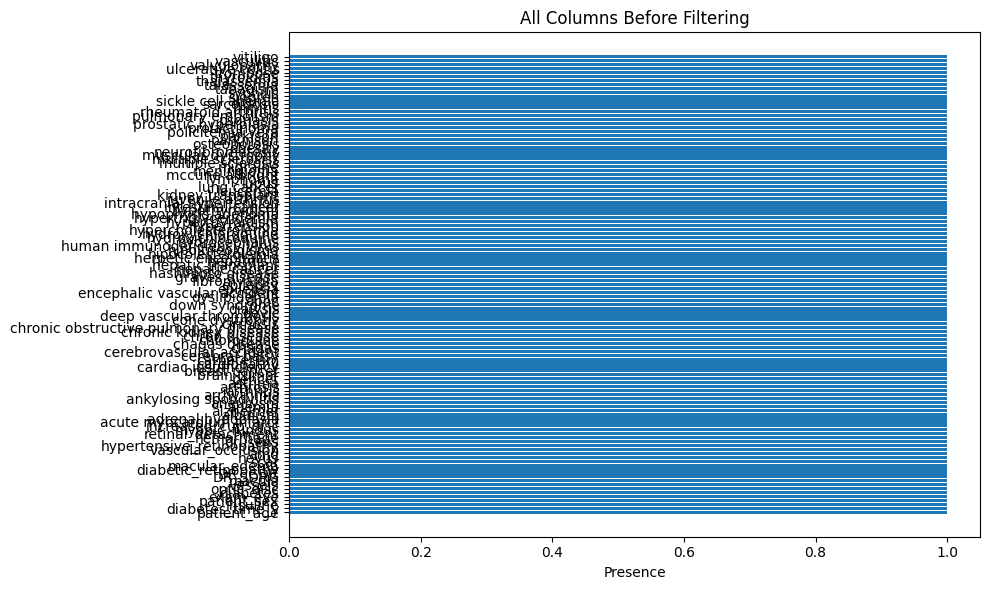

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(all_columns, [1] * len(all_columns))  # Dummy bars
plt.title("All Columns Before Filtering")
plt.xlabel("Presence")
plt.tight_layout()
plt.show()

**some examples**

In [ ]:
dataF_dr_cdv = dataF[kept_columns]
#dataF_dr_cdv = dataF_dr_cdv.drop(columns=['diabetic_retinopathy'])
#print dataF_dr_cdv in one line TOP 5 seprated by ,
print("| ".join(dataF_dr_cdv.head(10).astype(str).apply(lambda row: " , ".join(row), axis=1)))

48 , 12.0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0| 48 , 12.0 , 1 , 1 , 2 , 1 , 2 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0| 18 , 7.0 , 1 , 2 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 18 , 7.0 , 1 , 2 , 2 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 11.0 , 1 , 1 , 1 , 1 , 2 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 11.0 , 1 , 1 , 2 , 1 , 2 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 1.0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 1.0 , 1 , 1 , 2 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 23 , 20.0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 23 , 20.0 , 1 , 1 , 2 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0


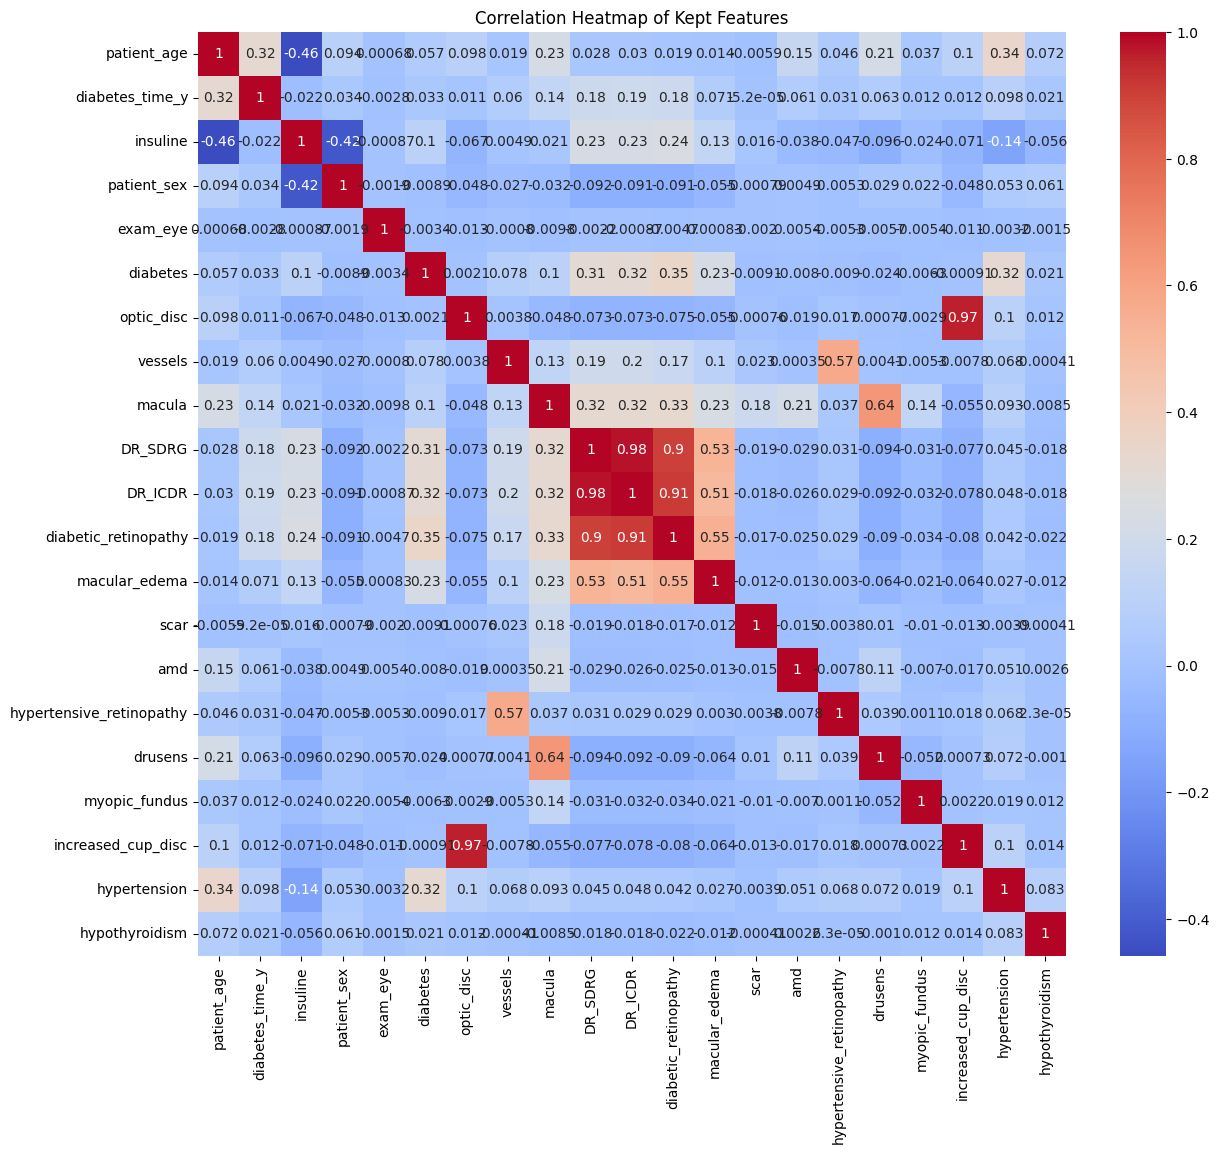

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only kept features from the original DataFrame
kept_features_df = dataF[kept_columns]

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(kept_features_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Kept Features")
plt.show()


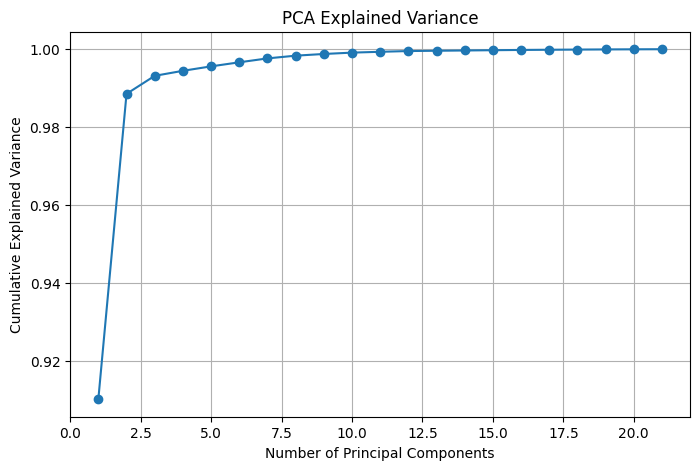

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numeric features from your DataFrame (kept_columns from earlier)
X = dataF[kept_columns].select_dtypes(include='number').dropna()

# Initialize PCA without limiting components to analyze all
pca = PCA()
pca.fit(X)

# Explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [ ]:
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

Total variance retained: 1.0000000000000002


In [ ]:
dataF_PCA = dataF[kept_columns]
#print(dataF_PCA.describe())
#print(dataF_PCA.isnull().values.any())
rows_with_nan = dataF_PCA[dataF_PCA.isnull().any(axis=1)]
print(rows_with_nan)



Empty DataFrame
Columns: [patient_age, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, amd, hypertensive_retinopathy, drusens, myopic_fundus, increased_cup_disc, hypertension, hypothyroidism]
Index: []

[0 rows x 21 columns]


# piplines

In [ ]:
import torch
import os
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from transformers import BertModel
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

* dataset class

In [ ]:
class MultiModalDataset(Dataset):
    def __init__(self, clinical_data, image_data, dr_labels, cvr_labels, transform=None):
        self.clinical_data = clinical_data
        self.image_data = image_data
        self.dr_labels = dr_labels
        self.cvr_labels = cvr_labels
        self.transform = transform

    def __len__(self):
        return len(self.clinical_data)

    def __getitem__(self, idx):
        clinical = torch.tensor(self.clinical_data[idx], dtype=torch.float32)
        image = self.image_data[idx]
        if self.transform:
            image = self.transform(image)
        dr_label = torch.tensor(self.dr_labels[idx], dtype=torch.long)
        cvr_label = torch.tensor(self.cvr_labels[idx], dtype=torch.float32)  # regression target
        return clinical, image, dr_label, cvr_label

* class clinical data

In [ ]:
class ClinicalFeatureEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc = nn.Sequential(
          nn.Linear(input_dim, hidden_dim),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(hidden_dim, hidden_dim),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(hidden_dim, input_dim)   # reconstruct original 18 features
      )

    def forward(self, x):
        return self.fc(x)

* Retinal Image

In [ ]:
class RetinalImageEncoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = models.resnet18(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Linear(base_model.fc.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

In [ ]:
import os
import torch
import torch.nn as nn
import pandas as pd
from torchvision import models, transforms
from PIL import Image
from torchvision.models import mobilenet_v2, inception_v3
import timm

class ResNet50Encoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = models.resnet50(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Linear(base_model.fc.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


class MobileNetV2Encoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = mobilenet_v2(pretrained=True)
        self.feature_extractor = base_model.features
        self.fc = nn.Linear(base_model.last_channel, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = nn.functional.adaptive_avg_pool2d(x, (1, 1))  # GAP
        x = x.view(x.size(0), -1)
        return self.fc(x)


class InceptionResNetV2Encoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = timm.create_model("inception_resnet_v2", pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        in_features = base_model.num_features
        self.fc = nn.Linear(in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        if len(x.shape) == 4:  # some timm models return [B,C,H,W]
            x = nn.functional.adaptive_avg_pool2d(x, (1, 1))
            x = x.view(x.size(0), -1)
        return self.fc(x)


In [ ]:
class DenseNet121Encoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = timm.create_model("densenet121", pretrained=True, num_classes=0)
        self.feature_extractor = base_model
        in_features = base_model.num_features
        self.fc = nn.Linear(in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)  # already pooled
        return self.fc(x)


class EfficientNetB3Encoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = timm.create_model("efficientnet_b3", pretrained=True, num_classes=0)
        self.feature_extractor = base_model
        in_features = base_model.num_features
        self.fc = nn.Linear(in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)  # already pooled
        return self.fc(x)

In [ ]:
class ResNet101Encoder(nn.Module):
    def __init__(self, output_dim=256):
        super().__init__()
        base_model = models.resnet101(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Linear(base_model.fc.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

class ResNet152Encoder(nn.Module):
    def __init__(self, output_dim=256):
        super().__init__()
        base_model = models.resnet152(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Linear(base_model.fc.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

class DenseNet169Encoder(nn.Module):
    def __init__(self, output_dim=256):
        super().__init__()
        base_model = models.densenet169(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.features.children()))
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(base_model.classifier.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

class DenseNet201Encoder(nn.Module):
    def __init__(self, output_dim=256):
        super().__init__()
        base_model = models.densenet201(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.features.children()))
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(base_model.classifier.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

* fusion

In [ ]:
class MultimodalClassifier(nn.Module):
    def __init__(self, clinical_dim, image_dim, hidden_dim, num_classes_dr):
        super().__init__()
        self.clinical_encoder = ClinicalFeatureEncoder(clinical_dim, hidden_dim)
        #self.image_encoder = RetinalImageEncoder(image_dim) # image_dim in place hidden_dim ?
        #self.cross_modal = CrossModalTransformer(embed_dim=hidden_dim)

        self.dr_head = nn.Linear(hidden_dim, num_classes_dr)
        self.cvr_head = nn.Linear(hidden_dim, 1)  # Regression for cardiovascular risk

    def forward(self, clinical, image):
        clinical_embed = self.clinical_encoder(clinical).unsqueeze(1)  # (B, 1, D)
        image_embed = self.image_encoder(image).unsqueeze(1)          # (B, 1, D)

        joint = torch.cat([clinical_embed, image_embed], dim=1)       # (B, 2, D)
        fused = self.cross_modal(joint)                               # (B, 2, D)
        fused_rep = fused.mean(dim=1)                                 # (B, D)

        return self.dr_head(fused_rep), self.cvr_head(fused_rep).squeeze(1)

* model

In [ ]:
class CrossModalTransformer(nn.Module):
    def __init__(self, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        return self.transformer(x)

* excution

# funds images pipeline

*** image Retinal ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

Mounted at /content/drive


* RESNET18

In [ ]:
encoder = RetinalImageEncoder(output_dim=256)
encoder.eval().to("cuda")  # use GPU if available

# Preprocessing (same as before)
preprocess = transforms.Compose([
    transforms.Resize((2420, 1880)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Path to your folder
image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# Store results
features_list = []
filenames = []

# Loop over images in the folder
with torch.no_grad():
    for filename in os.listdir(image_folder_dr):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(image_folder_dr, filename)
            image = Image.open(img_path).convert("RGB")
            input_tensor = preprocess(image).unsqueeze(0).to("cuda")

            feat = encoder(input_tensor).cpu().numpy().flatten()

            features_list.append(feat)
            filenames.append(filename)

# Convert to DataFrame for easy use
df_dr_features = pd.DataFrame(features_list, index=filenames)
# Save
df_dr_features.to_parquet("df_dr_features.parquet", index=True)

print(df_dr_features.head(1))

/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


100%|██████████| 44.7M/44.7M [00:00<00:00, 154MB/s]


                   0         1         2         3         4         5    \
img15903.jpg -0.237981 -0.673742  0.620785  0.840754 -0.303265 -0.569858   

                  6         7         8         9    ...    246       247  \
img15903.jpg -0.54904 -0.133551 -0.345022  0.069132  ...  0.276 -0.513538   

                   248       249       250       251     252       253  \
img15903.jpg -0.304973 -0.671494  0.934738 -0.982848 -0.2733  0.146012   

                   254       255  
img15903.jpg -0.070408  0.684013  

[1 rows x 256 columns]


In [ ]:
df_dr_features.shape

In [ ]:

df_dr_features_test = pd.read_parquet("df_dr_features.parquet")
df_dr_features_test.head(1)

0         1         2         3         4         5    \
img15903.jpg -0.237981 -0.673742  0.620785  0.840754 -0.303265 -0.569858   

                  6         7         8         9    ...    246       247  \
img15903.jpg -0.54904 -0.133551 -0.345022  0.069132  ...  0.276 -0.513538   

                   248       249       250       251     252       253  \
img15903.jpg -0.304973 -0.671494  0.934738 -0.982848 -0.2733  0.146012   

                   254       255  
img15903.jpg -0.070408  0.684013  

[1 rows x 256 columns]

In [ ]:
# Save
df_dr_features.to_parquet("df_dr_features.parquet", index=True)


#df_dr_features = pd.read_parquet("df_dr_features.parquet")


* models :
- resnet50
- mobilenetv2
- inceptionresnetv2

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

encoders = {
    "resnet50": ResNet50Encoder(256).to(device).eval(),
    "mobilenetv2": MobileNetV2Encoder(256).to(device).eval(),
    "inceptionresnetv2": InceptionResNetV2Encoder(256).to(device).eval()
}

# ======================
# Preprocessing
# ======================
preprocess = transforms.Compose([
    transforms.Resize((2420, 1880)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

features_dict = {"filename": []}

# create a dict entry for each encoder
for model_name in encoders.keys():
    features_dict[model_name] = []

# ======================
# Loop through images once
# ======================
with torch.no_grad():
    for filename in os.listdir(image_folder_dr):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(image_folder_dr, filename)
            image = Image.open(img_path).convert("RGB")
            input_tensor = preprocess(image).unsqueeze(0).to(device)

            features_dict["filename"].append(filename)

            for model_name, encoder in encoders.items():
                feat = encoder(input_tensor).cpu().numpy().flatten()
                features_dict[model_name].append(feat)

# ======================
# Convert to DataFrames per model
# ======================
df_filenames = pd.DataFrame(features_dict["filename"], columns=["filename"])

df_resnet50 = pd.concat(
    [df_filenames, pd.DataFrame(features_dict["resnet50"],
                                columns=[f"resnet50_f{i}" for i in range(256)])],
    axis=1
)

df_mobilenetv2 = pd.concat(
    [df_filenames, pd.DataFrame(features_dict["mobilenetv2"],
                                columns=[f"mobilenetv2_f{i}" for i in range(256)])],
    axis=1
)

df_inceptionresnetv2 = pd.concat(
    [df_filenames, pd.DataFrame(features_dict["inceptionresnetv2"],
                                columns=[f"inceptionresnetv2_f{i}" for i in range(256)])],
    axis=1
)

# ======================
# Save each DataFrame
# ======================
df_resnet50.to_parquet("df_resnet50_features.parquet", index=False)
df_mobilenetv2.to_parquet("df_mobilenetv2_features.parquet", index=False)
df_inceptionresnetv2.to_parquet("df_inceptionresnetv2_features.parquet", index=False)

print("ResNet50 Features:\n", df_resnet50.head())
print("MobileNetV2 Features:\n", df_mobilenetv2.head())
print("InceptionResNetV2 Features:\n", df_inceptionresnetv2.head())

** save the features in parquet file **

models
- densenet121
- efficientnet_b3

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

encodersV2 = {
    "densenet121": DenseNet121Encoder(256).to(device).eval(),
    "efficientnet_b3": EfficientNetB3Encoder(256).to(device).eval()
}

# ======================
# Preprocessing
# ======================
preprocess = transforms.Compose([
    transforms.Resize((2420, 1880)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ======================
# Image Folder
# ======================
image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

features_dict = {"filename": []}
for model_name in encodersV2.keys():
    features_dict[model_name] = []

# ======================
# Loop through images once
# ======================
with torch.no_grad():
    for filename in os.listdir(image_folder_dr):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(image_folder_dr, filename)
            image = Image.open(img_path).convert("RGB")
            input_tensor = preprocess(image).unsqueeze(0).to(device)

            features_dict["filename"].append(filename)

            for model_name, encoder in encodersV2.items():
                feat = encoder(input_tensor).cpu().numpy().flatten()
                features_dict[model_name].append(feat)

# ======================
# Convert to DataFrames per model
# ======================
df_filenames = pd.DataFrame(features_dict["filename"], columns=["filename"])

df_densenet121 = pd.concat(
    [df_filenames, pd.DataFrame(features_dict["densenet121"],
                                columns=[f"densenet121_f{i}" for i in range(256)])],
    axis=1
)

df_efficientnetb3 = pd.concat(
    [df_filenames, pd.DataFrame(features_dict["efficientnet_b3"],
                                columns=[f"efficientnetb3_f{i}" for i in range(256)])],
    axis=1
)

# ======================
# Save each DataFrame
# ======================
df_densenet121.to_parquet("df_densenet121_features.parquet", index=False)
df_efficientnetb3.to_parquet("df_efficientnetb3_features.parquet", index=False)

print("DenseNet121 Features:\n", df_densenet121.head())
print("EfficientNet-B3 Features:\n", df_efficientnetb3.head())

DenseNet121 Features:
        filename  densenet121_f0  densenet121_f1  densenet121_f2  \
0  img15903.jpg       -0.079555       -0.093342        0.718648   
1  img15002.jpg       -0.182445        0.005216        0.691260   
2  img15640.jpg       -0.126566       -0.029811        0.757779   
3  img15387.jpg       -0.114713        0.003045        0.622048   
4  img15740.jpg       -0.176284        0.086908        0.640607   

   densenet121_f3  densenet121_f4  densenet121_f5  densenet121_f6  \
0        0.407090        0.109407       -0.019251       -0.076044   
1        0.518127        0.096909       -0.038829        0.003896   
2        0.468943        0.141132        0.085767        0.034030   
3        0.477991        0.185509        0.072651        0.029376   
4        0.460733        0.140592        0.002562        0.098780   

   densenet121_f7  densenet121_f8  ...  densenet121_f246  densenet121_f247  \
0        0.175453        0.159695  ...         -0.182035         -0.091825   
1  

In [ ]:
# save efficientnetb3 model into file
device = "cuda" if torch.cuda.is_available() else "cpu"
efficientnetb3_model = DenseNet121Encoder(256).to(device).eval()

torch.save(efficientnetb3_model.state_dict(), "efficientnetb3_model.pth")

model.safetensors:   0%|          | 0.00/32.3M [00:00<?, ?B/s]

model
* resnet101
* resnet152
* densenet169
* densenet201

In [ ]:
preprocess = transforms.Compose([
    transforms.Resize((224, 224)),  # default input for ResNet/DenseNet
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# ================================
# Folder with images
# ================================
image_folder = "/content/drive/MyDrive/fundus_photos_all"

# ================================
# Extract features for each model
# ================================
encoders = {
    "resnet101": ResNet101Encoder(256),
    "resnet152": ResNet152Encoder(256),
    "densenet169": DenseNet169Encoder(256),
    "densenet201": DenseNet201Encoder(256)
}

features_dict = {name: [] for name in encoders.keys()}
features_dict["filename"] = []

device = "cuda" if torch.cuda.is_available() else "cpu"

with torch.no_grad():
    for filename in os.listdir(image_folder):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(image_folder, filename)
            image = Image.open(img_path).convert("RGB")
            input_tensor = preprocess(image).unsqueeze(0).to(device)

            for name, encoder in encoders.items():
                encoder.to(device).eval()
                feat = encoder(input_tensor).cpu().numpy().flatten()
                features_dict[name].append(feat)

            features_dict["filename"].append(filename)

# ================================
# Convert to DataFrames
# ================================
dfs = []
for name in encoders.keys():
    df_model = pd.DataFrame(features_dict[name],
                            columns=[f"{name}_f{i}" for i in range(256)])
    dfs.append(df_model)

df_features = pd.concat([pd.DataFrame(features_dict["filename"], columns=["filename"])] + dfs, axis=1)

# ================================
# Save
# ================================
df_features.to_parquet("df_features_cnn.parquet", index=False)
print(df_features.head())

       filename  resnet101_f0  resnet101_f1  resnet101_f2  resnet101_f3  \
0  img15903.jpg     -0.013982      0.192023      0.233687      0.255785   
1  img15002.jpg      0.051551      0.319265     -0.054142      0.030405   
2  img15640.jpg      0.038690      0.134260      0.186931      0.196009   
3  img15387.jpg      0.130764      0.429240      0.150608      0.192462   
4  img15740.jpg      0.100358      0.372371      0.172923      0.120493   

   resnet101_f4  resnet101_f5  resnet101_f6  resnet101_f7  resnet101_f8  ...  \
0      0.074378     -0.322992      0.298898     -0.187307      0.184108  ...   
1      0.217167     -0.472024      0.241316     -0.280031     -0.052027  ...   
2      0.052725     -0.454401      0.313607     -0.340147      0.191268  ...   
3     -0.078077     -0.280019      0.166000     -0.242047      0.170171  ...   
4      0.033755     -0.424039      0.193241     -0.109683      0.155856  ...   

   densenet201_f246  densenet201_f247  densenet201_f248  densenet201

In [ ]:
import pandas as pd

# Read parquet file
df = pd.read_parquet("df_features_cnn.parquet")

# Separate ResNet101 features
df_resnet101 = df[["filename"] + [col for col in df.columns if col.startswith("resnet101_")]]

# Separate DenseNet201 features
df_densenet201 = df[["filename"] + [col for col in df.columns if col.startswith("densenet201_")]]

# Save if needed
df_resnet101.to_parquet("df_resnet101.parquet", index=False)
df_densenet201.to_parquet("df_densenet201.parquet", index=False)

print("ResNet101:", df_resnet101.shape)
print("DenseNet201:", df_densenet201.shape)


ResNet101: (16266, 257)
DenseNet201: (16266, 257)


# PCA metric, dimension of the image data

In [ ]:
df_resnet50 = pd.read_parquet("/content/df_resnet50_features.parquet")
df_mobilenetv2 = pd.read_parquet("/content/df_mobilenetv2_features.parquet")
df_inceptionresnetv2 = pd.read_parquet("/content/df_inceptionresnetv2_features.parquet")
df_densenet121 = pd.read_parquet("/content/df_densenet121_features.parquet")
df_resnet18 = pd.read_parquet("/content/df_dr_features.parquet")
df_efficientnetb3_features = pd.read_parquet("/content/df_efficientnetb3_features.parquet")
df_features_cnn = pd.read_parquet("/content/df_features_cnn.parquet") # resnet101 resnet152 densenet169 densenet201

df_resnet18 = df_resnet18.reset_index().rename(columns={"index": "filename"})

# Check what your identifier column is
id_col = []
for c in ["filename", "image_id", "file", "id"]:
    if c in df_features_cnn.columns:
        id_col = [c]
        break

# Split into separate DataFrames (features + filename/image_id)
df_resnet101   = df_features_cnn[id_col + [c for c in df_features_cnn.columns if c.startswith("resnet101")]].copy()
df_resnet152   = df_features_cnn[id_col + [c for c in df_features_cnn.columns if c.startswith("resnet152")]].copy()
df_densenet169 = df_features_cnn[id_col + [c for c in df_features_cnn.columns if c.startswith("densenet169")]].copy()
df_densenet201 = df_features_cnn[id_col + [c for c in df_features_cnn.columns if c.startswith("densenet201")]].copy()


df_resnet50_without_imageId = df_resnet50.drop(columns=['filename'])
df_mobilenetv2_without_imageId = df_mobilenetv2.drop(columns=['filename'])
df_inceptionresnetv2_without_imageId = df_inceptionresnetv2.drop(columns=['filename'])
df_densenet121_without_imageId = df_densenet121.drop(columns=['filename'])
df_resnet18_without_imageId = df_resnet18.drop(columns=['filename'])
df_efficientnetb3_features_without_imageId = df_efficientnetb3_features.drop(columns=['filename'])
df_resnet101_without_imageId = df_resnet101.drop(columns=['filename'])
df_resnet152_without_imageId = df_resnet152.drop(columns=['filename'])
df_densenet169_without_imageId = df_densenet169.drop(columns=['filename'])
df_densenet201_without_imageId = df_densenet201.drop(columns=['filename'])



========== Running PCA for resnet50 ==========
resnet50 PCA shape: (16266, 32)


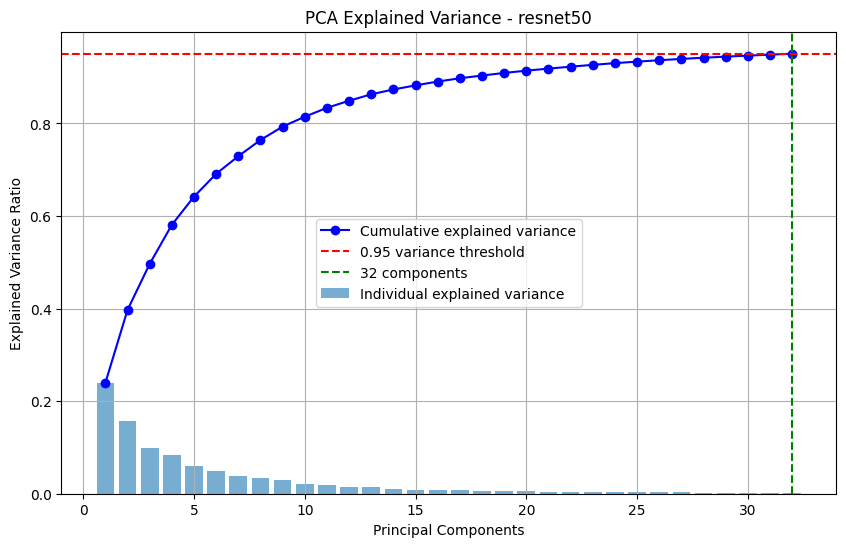

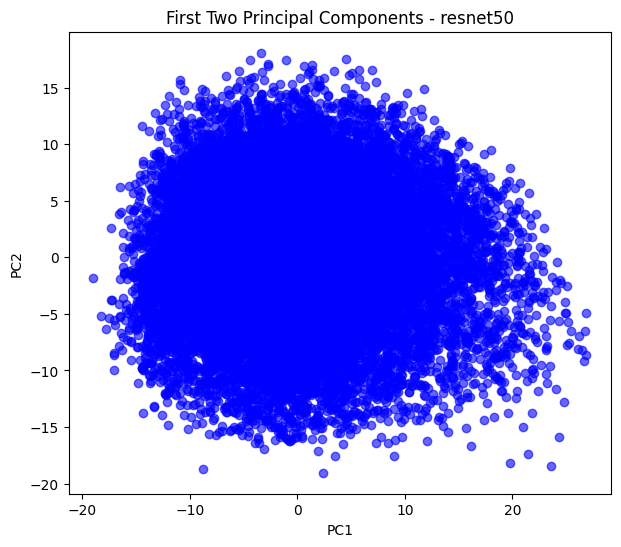

resnet50 Reconstruction Error: 0.04939361661672592


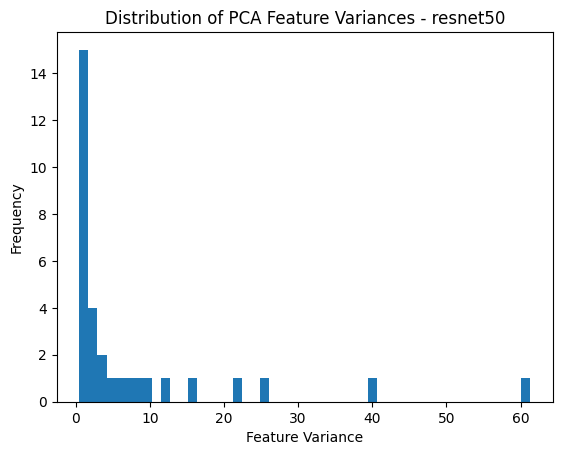


========== Running PCA for mobilenetv2 ==========
mobilenetv2 PCA shape: (16266, 35)


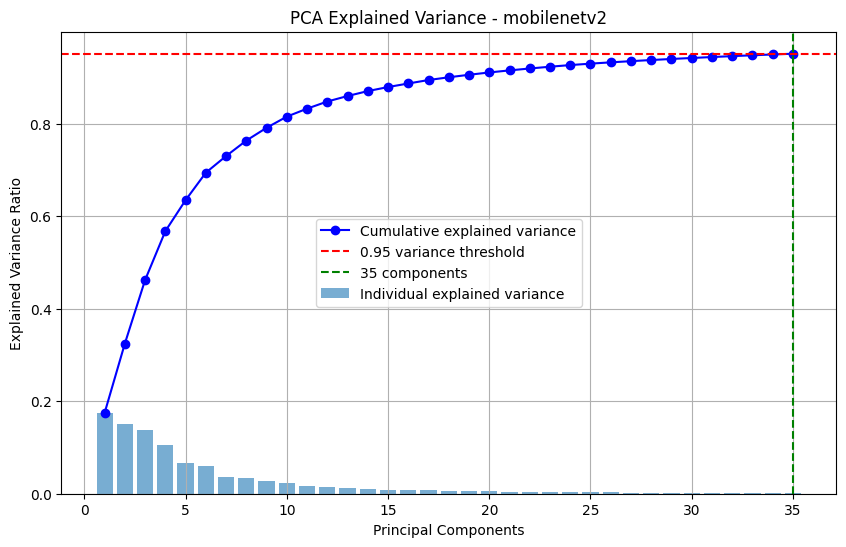

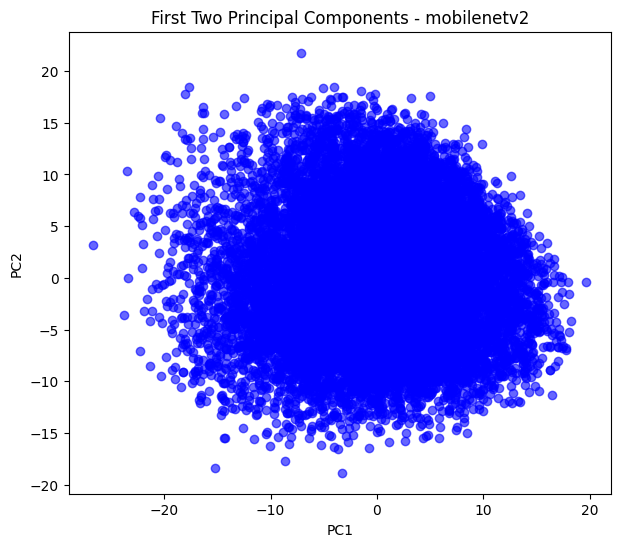

mobilenetv2 Reconstruction Error: 0.04867299646139145


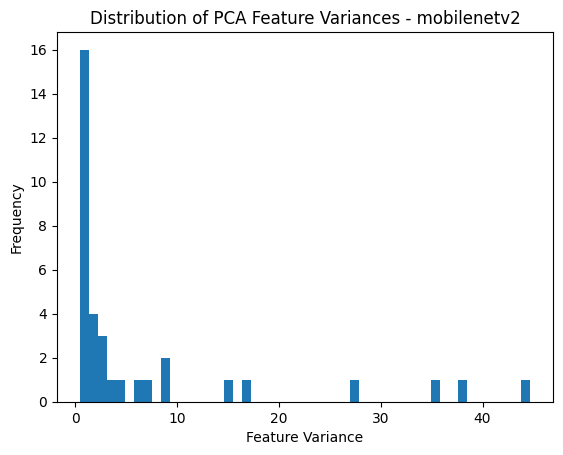


========== Running PCA for inceptionresnetv2 ==========
inceptionresnetv2 PCA shape: (16266, 44)


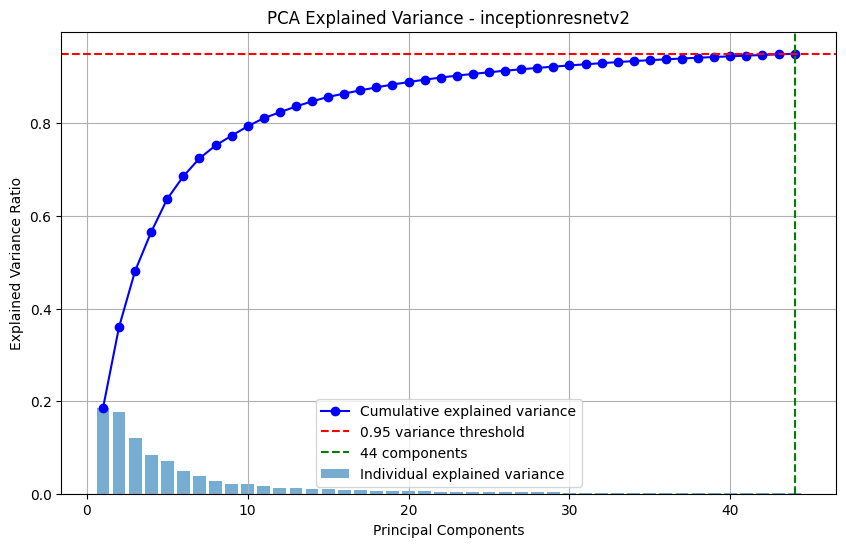

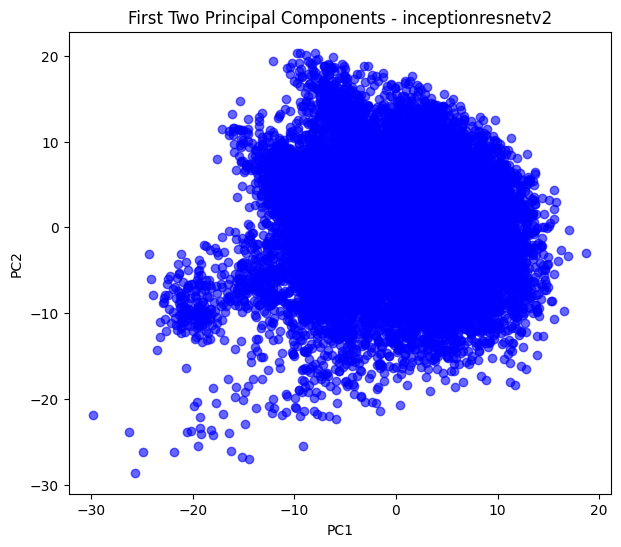

inceptionresnetv2 Reconstruction Error: 0.04970678687095642


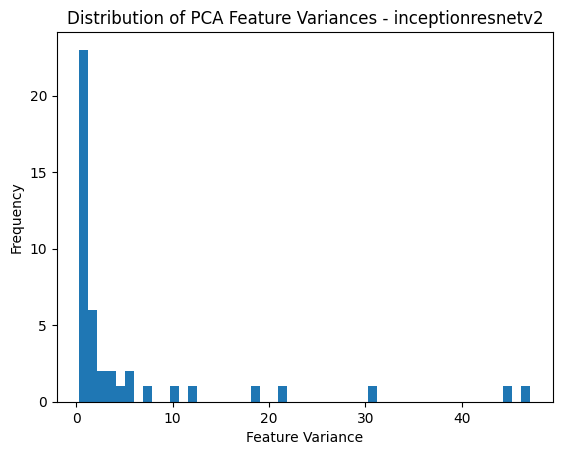


========== Running PCA for densenet121 ==========
densenet121 PCA shape: (16266, 34)


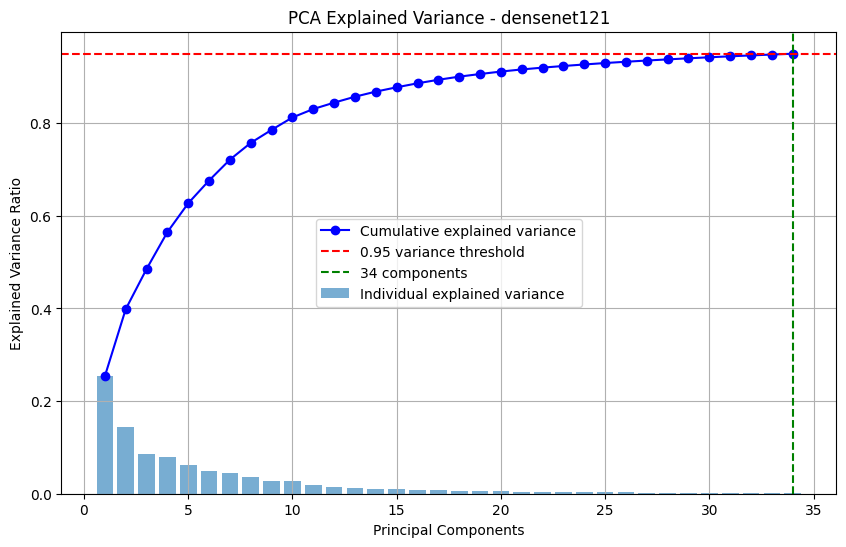

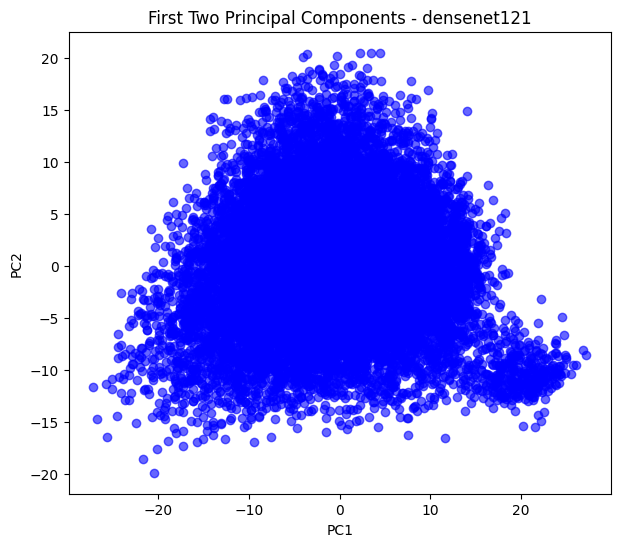

densenet121 Reconstruction Error: 0.04996776580810547


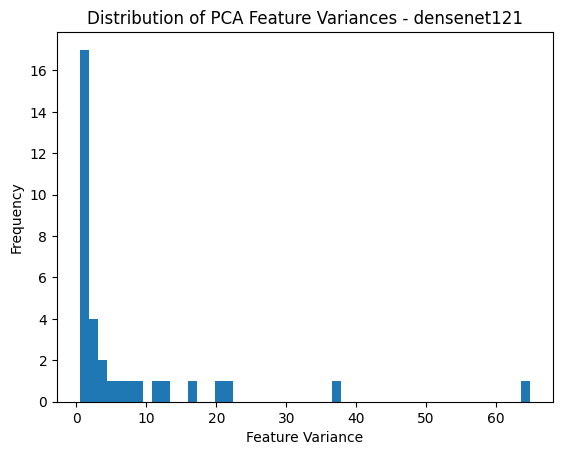


========== Running PCA for resnet18 ==========
resnet18 PCA shape: (16266, 35)


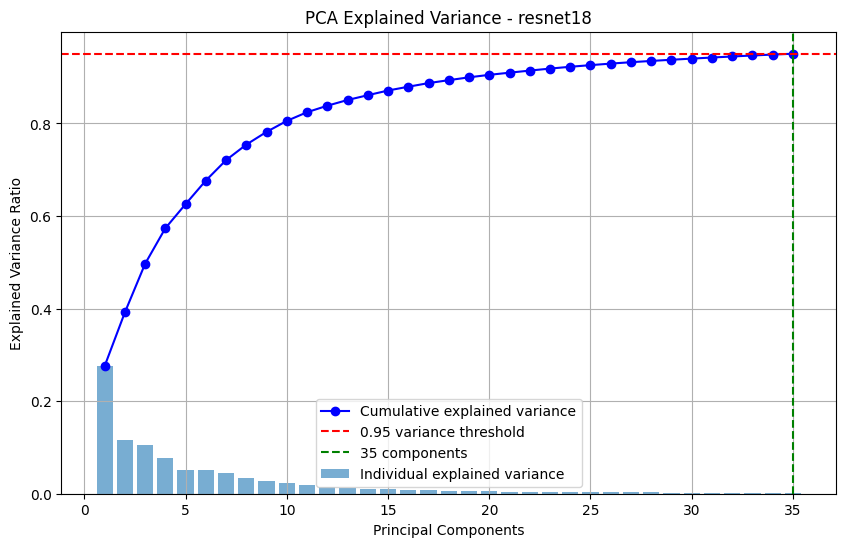

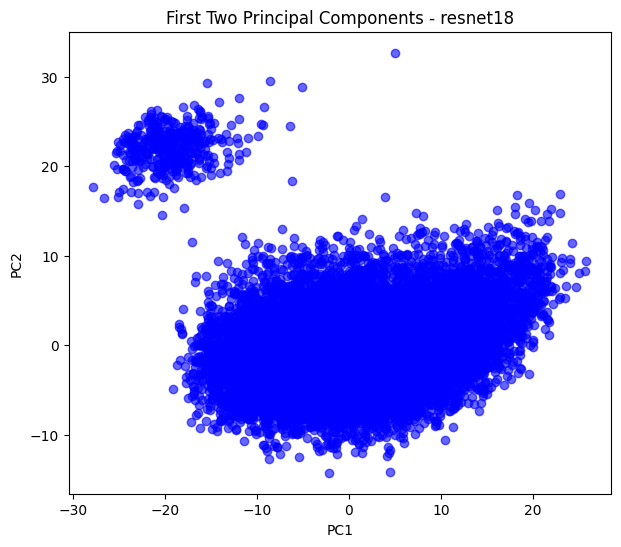

resnet18 Reconstruction Error: 0.04931078478693962


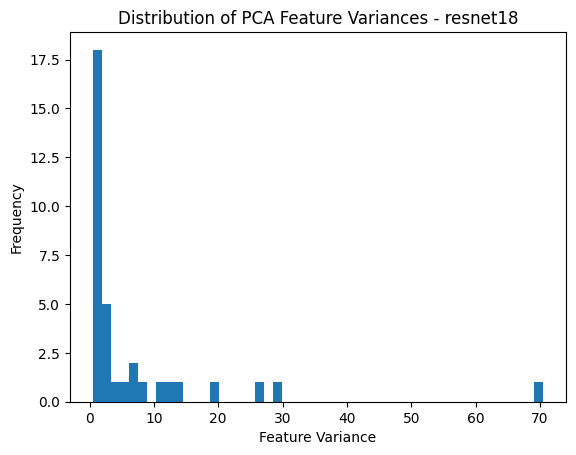


========== Running PCA for efficientnetb3 ==========
efficientnetb3 PCA shape: (16266, 49)


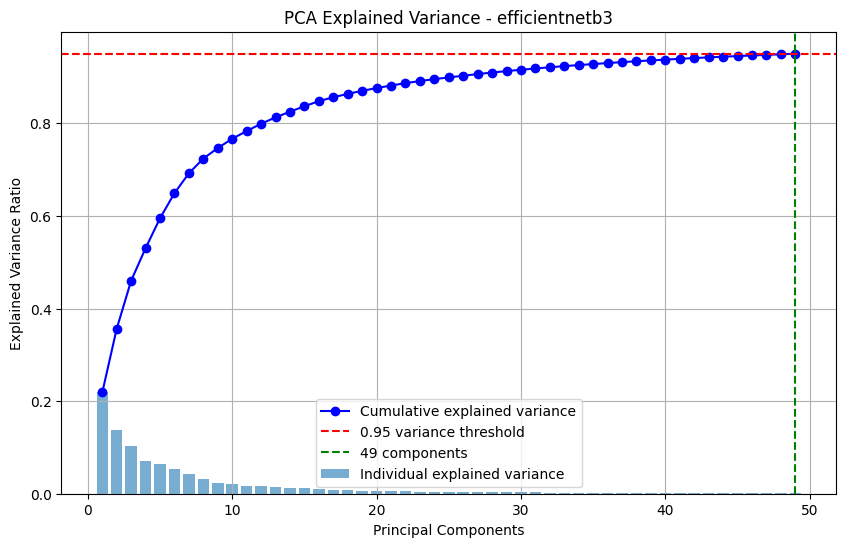

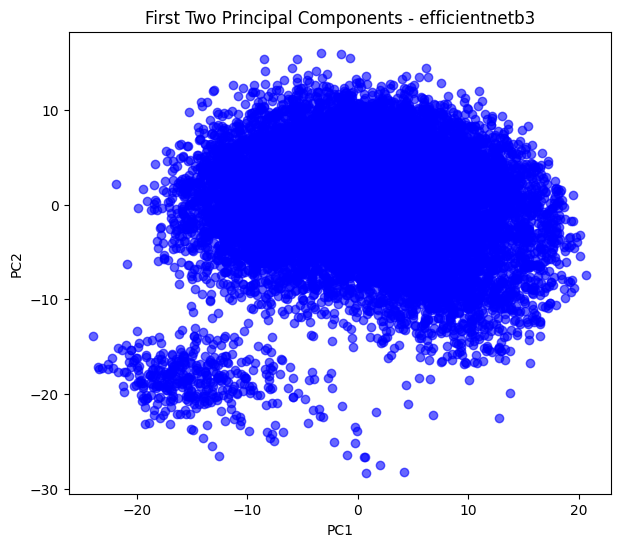

efficientnetb3 Reconstruction Error: 0.049740858376026154


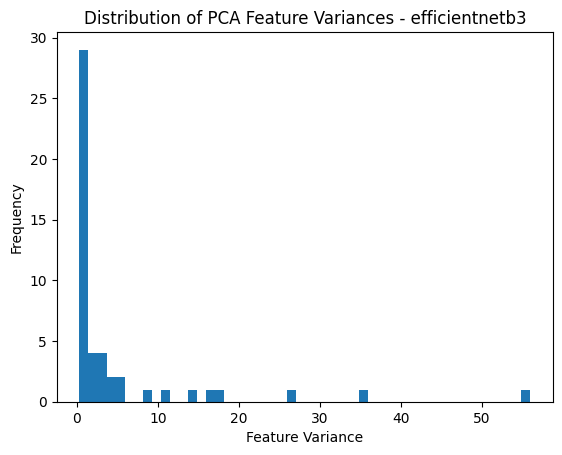


========== Running PCA for resnet101 ==========
resnet101 PCA shape: (16266, 89)


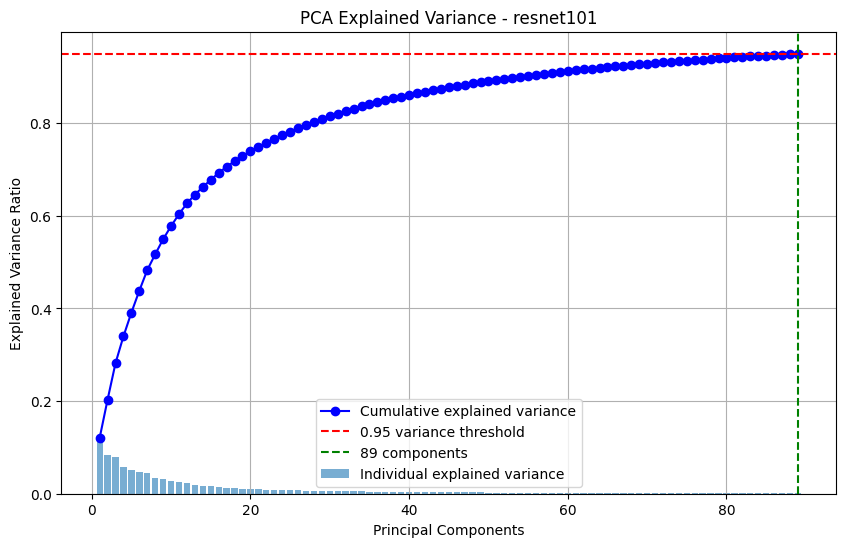

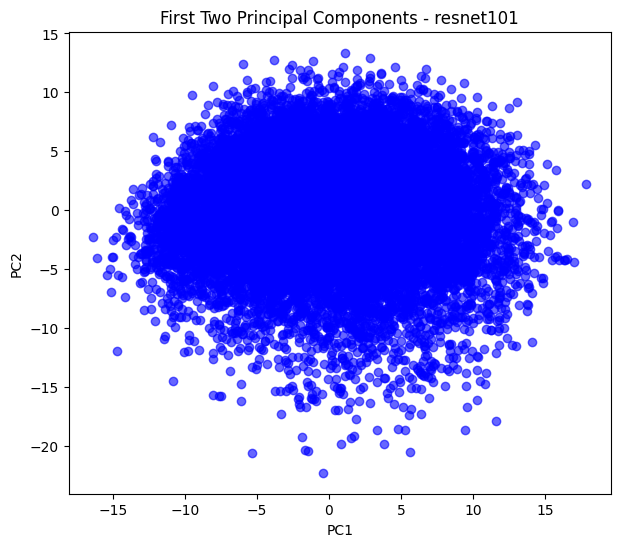

resnet101 Reconstruction Error: 0.04992436245083809


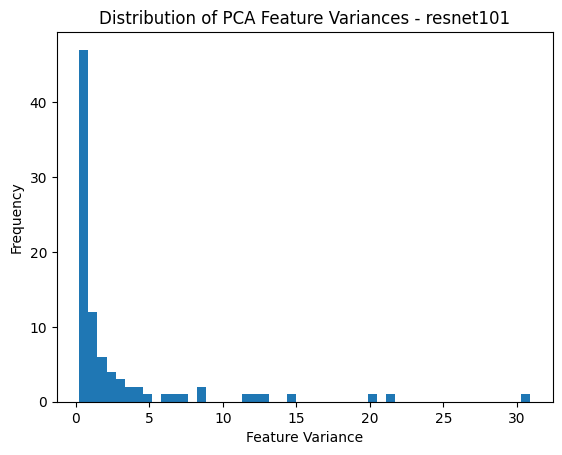


========== Running PCA for resnet152 ==========
resnet152 PCA shape: (16266, 84)


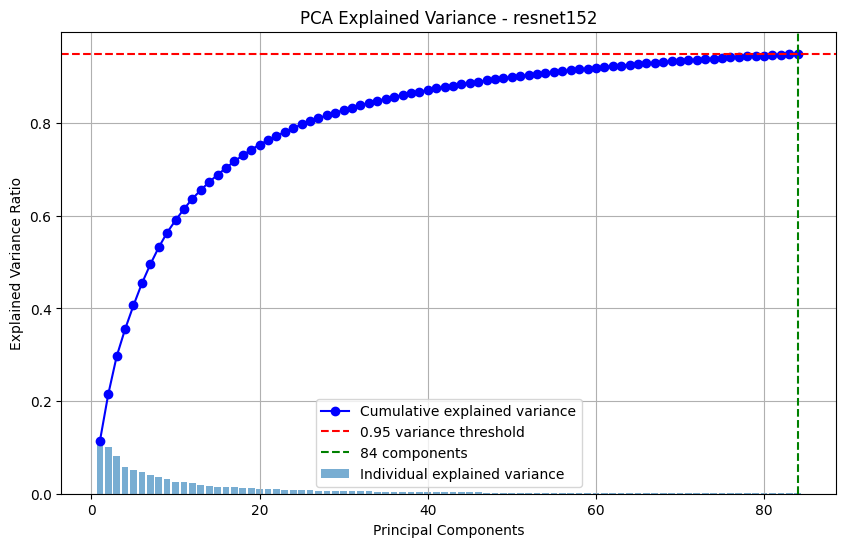

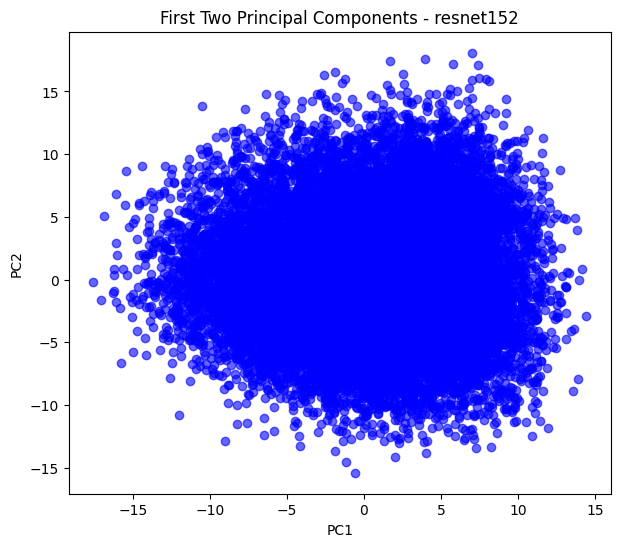

resnet152 Reconstruction Error: 0.04992179572582245


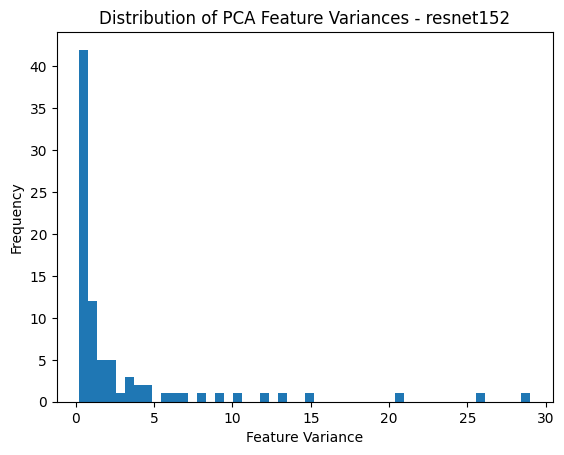


========== Running PCA for densenet169 ==========
densenet169 PCA shape: (16266, 123)


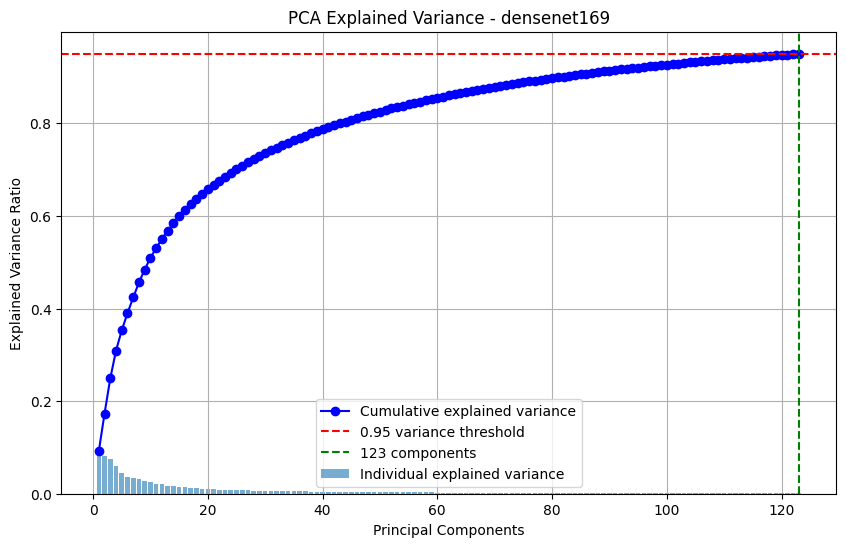

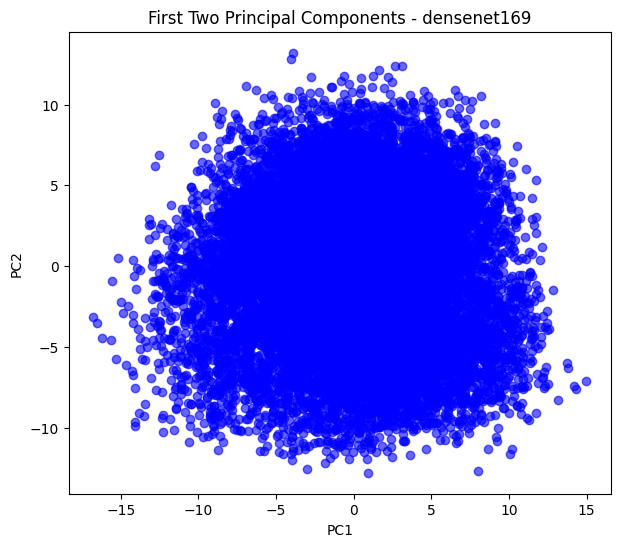

densenet169 Reconstruction Error: 0.04970056191086769


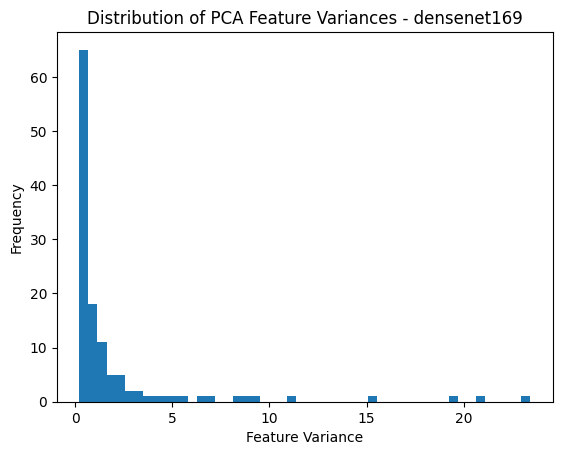


========== Running PCA for densenet201 ==========
densenet201 PCA shape: (16266, 126)


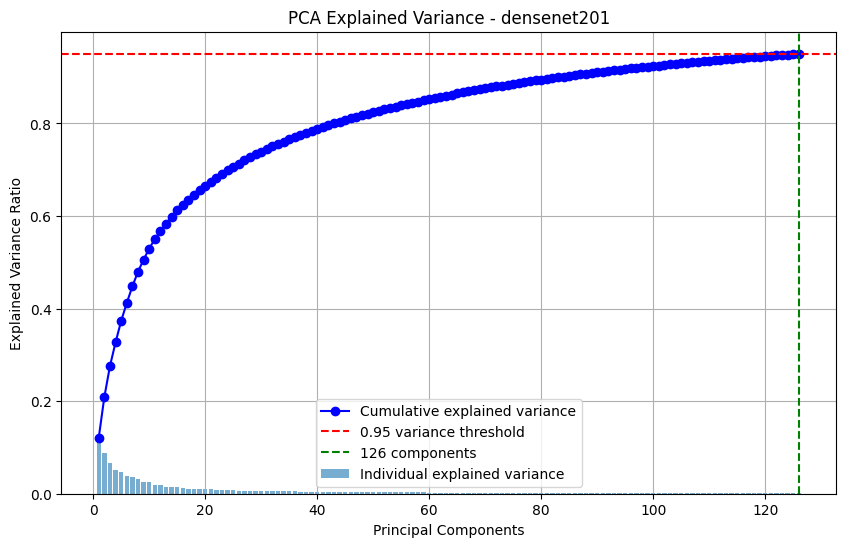

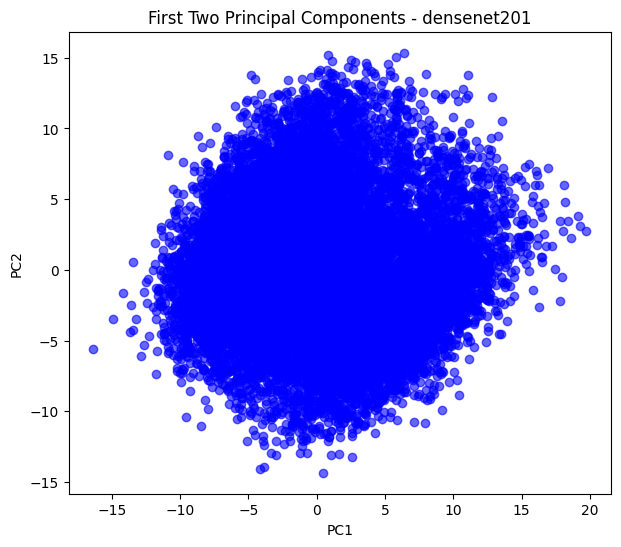

densenet201 Reconstruction Error: 0.049448590725660324


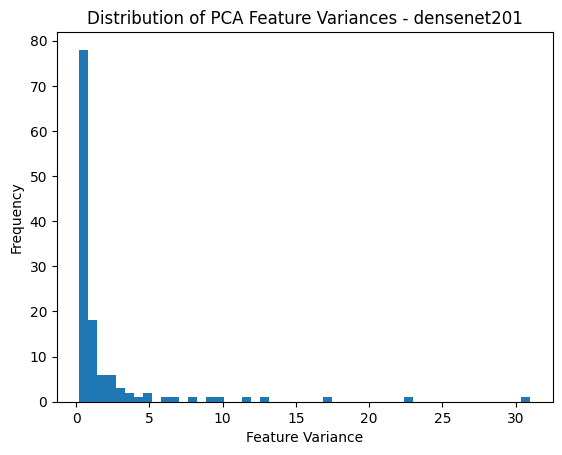

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Put all your dfs into a dictionary for looping
dfs = {
    "resnet50": df_resnet50_without_imageId,
    "mobilenetv2": df_mobilenetv2_without_imageId,
    "inceptionresnetv2": df_inceptionresnetv2_without_imageId,
    "densenet121": df_densenet121_without_imageId,
    "resnet18": df_resnet18_without_imageId,
    "efficientnetb3": df_efficientnetb3_features_without_imageId,
    "resnet101": df_resnet101_without_imageId,
    "resnet152": df_resnet152_without_imageId,
    "densenet169": df_densenet169_without_imageId,
    "densenet201": df_densenet201_without_imageId
}

for name, df in dfs.items():
    print(f"\n========== Running PCA for {name} ==========")

    # 1) Standardize
    scaler = StandardScaler(with_mean=True, with_std=True)
    X_std = scaler.fit_transform(df)
    n_components = 0.95
    # 2) PCA fit keeping 99% variance
    pca = PCA(n_components=n_components, random_state=42)
    X_pca = pca.fit_transform(X_std)
    print(f"{name} PCA shape: {X_pca.shape}")

    # 3) Explained variance plot
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(10,6))
    plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual explained variance')
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='blue', label='Cumulative explained variance')
    plt.axhline(y=n_components, color='r', linestyle='--', label=str(n_components)+' variance threshold')
    n_components_99 = np.argmax(cumulative_variance >= n_components) + 1
    plt.axvline(x=n_components_99, color='g', linestyle='--', label=f'{n_components_99} components')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'PCA Explained Variance - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 4) Scatter plot of first two PCs
    if X_pca.shape[1] >= 2:  # only if at least 2 PCs
        plt.figure(figsize=(7,6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title(f"First Two Principal Components - {name}")
        plt.show()

    # 5) Reconstruction error
    X_reconstructed = pca.inverse_transform(X_pca)
    reconstruction_error = np.mean((X_std - X_reconstructed) ** 2)
    print(f"{name} Reconstruction Error: {reconstruction_error}")

    # 6) Histogram of variances
    variances = X_pca.var(axis=0)
    plt.hist(variances, bins=50)
    plt.xlabel("Feature Variance")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of PCA Feature Variances - {name}")
    plt.show()



========== Running PCA for resnet50 ==========
resnet50 PCA shape: (16266, 94)


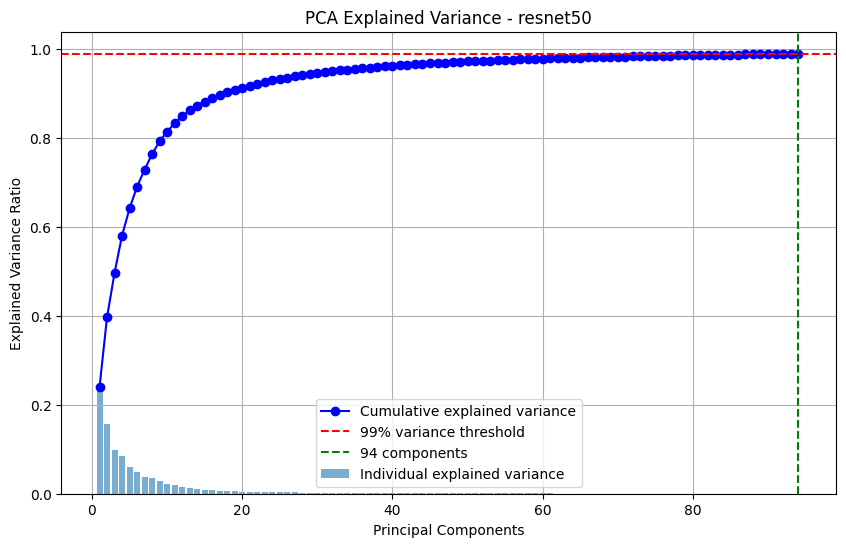

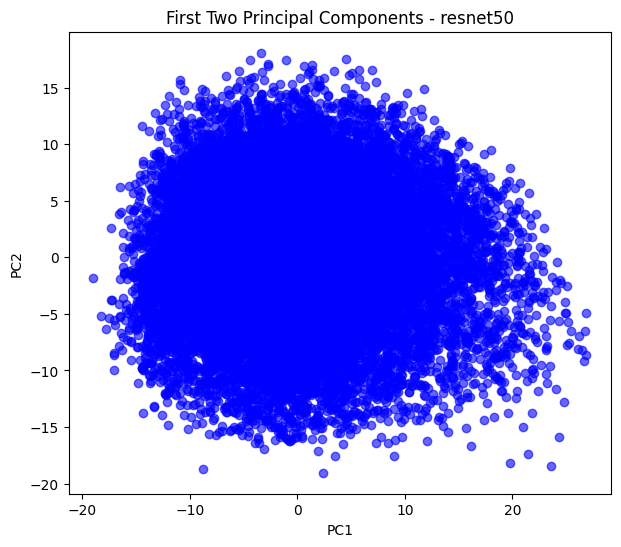

resnet50 Reconstruction Error: 0.0099268089979887


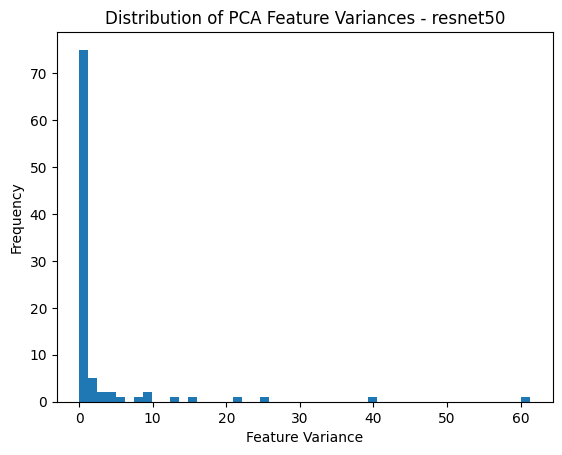


========== Running PCA for mobilenetv2 ==========
mobilenetv2 PCA shape: (16266, 103)


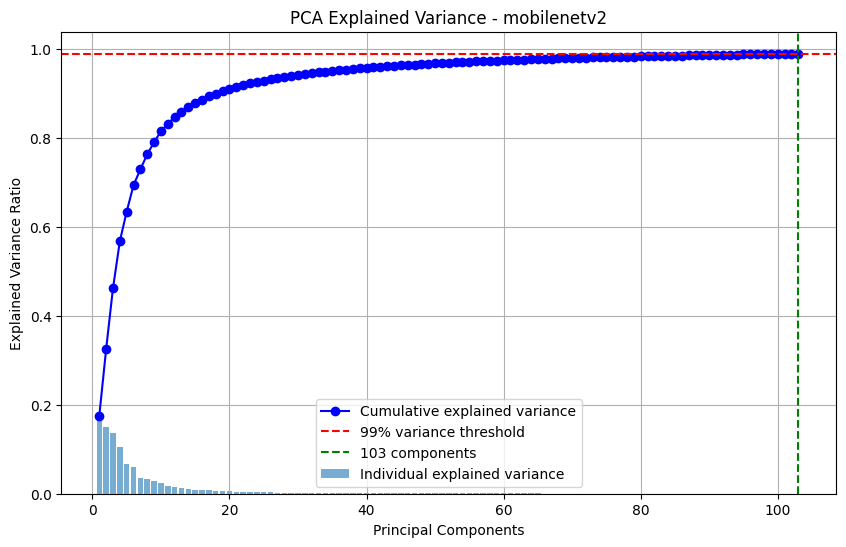

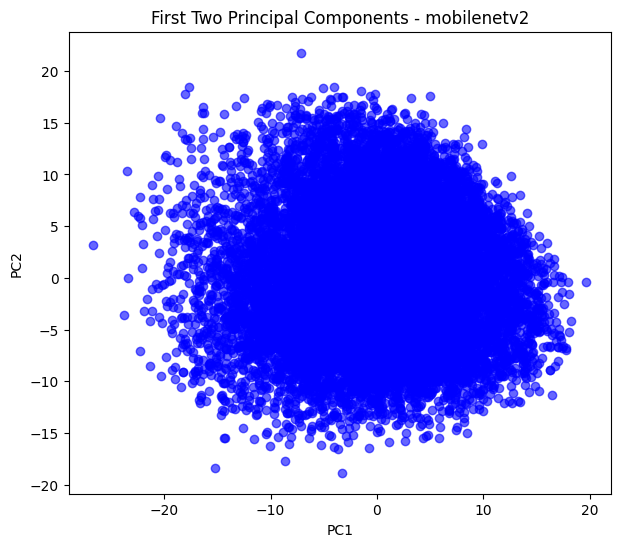

mobilenetv2 Reconstruction Error: 0.009841411374509335


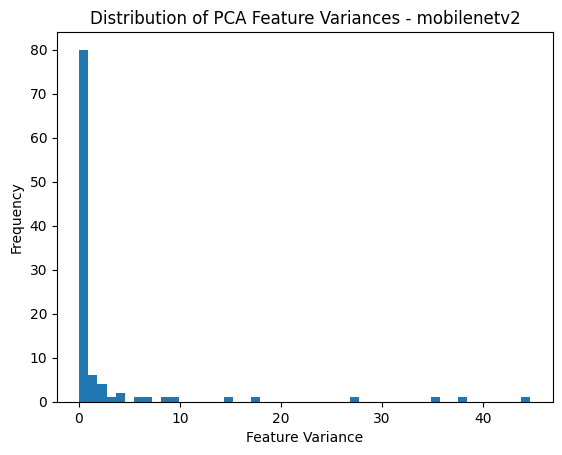


========== Running PCA for inceptionresnetv2 ==========
inceptionresnetv2 PCA shape: (16266, 126)


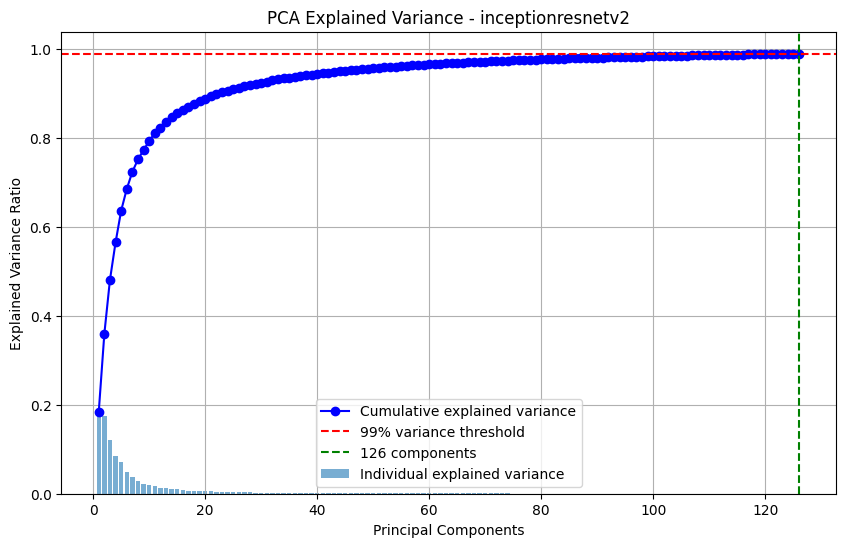

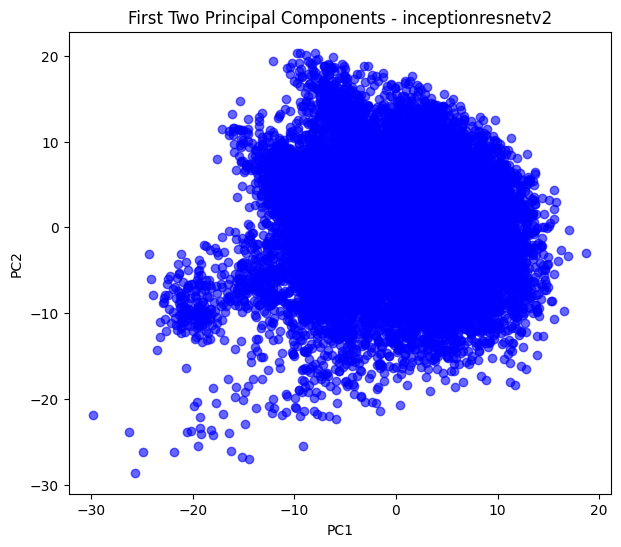

inceptionresnetv2 Reconstruction Error: 0.009962640702724457


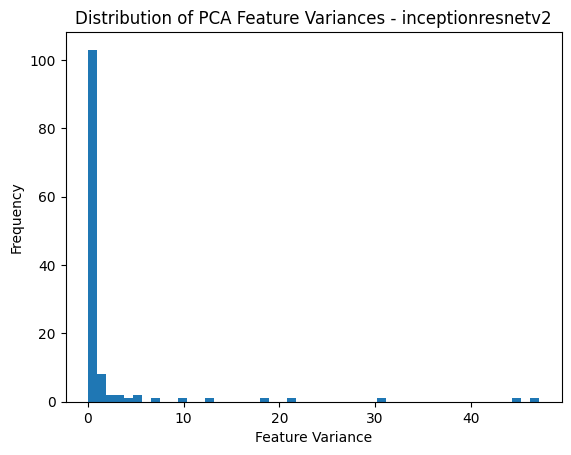


========== Running PCA for densenet121 ==========
densenet121 PCA shape: (16266, 101)


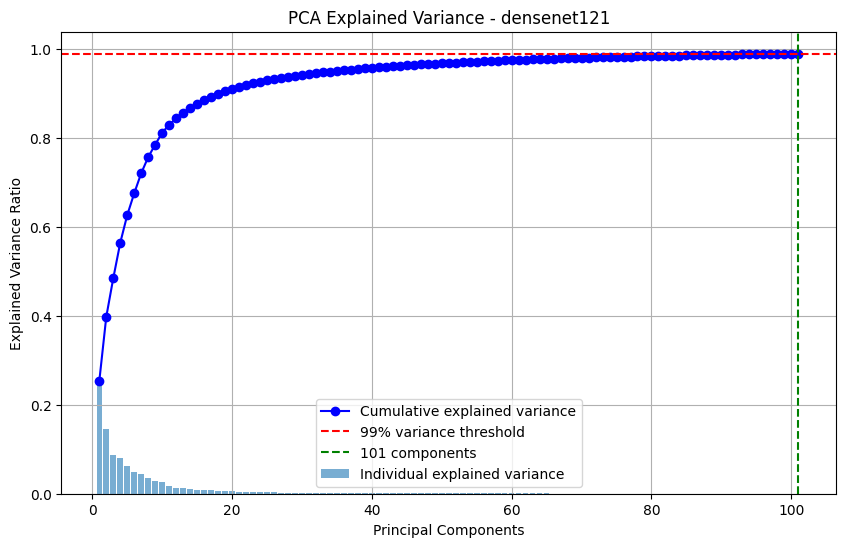

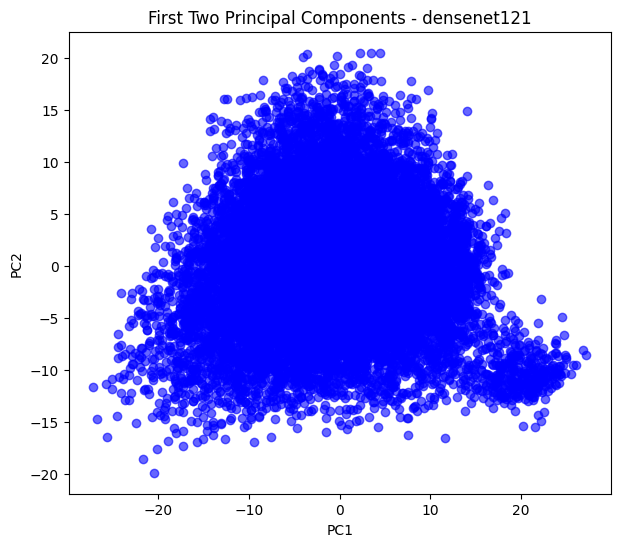

densenet121 Reconstruction Error: 0.009865464642643929


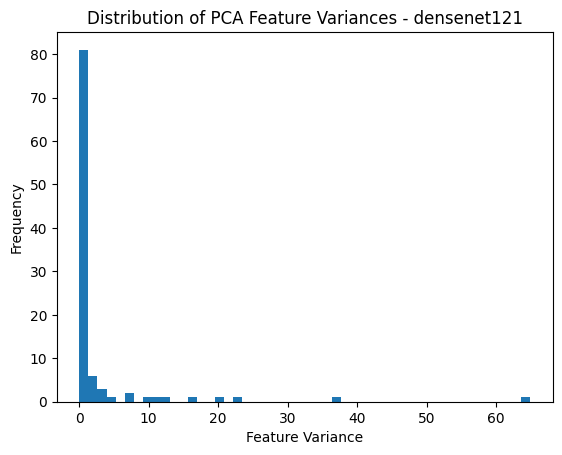


========== Running PCA for resnet18 ==========
resnet18 PCA shape: (16266, 97)


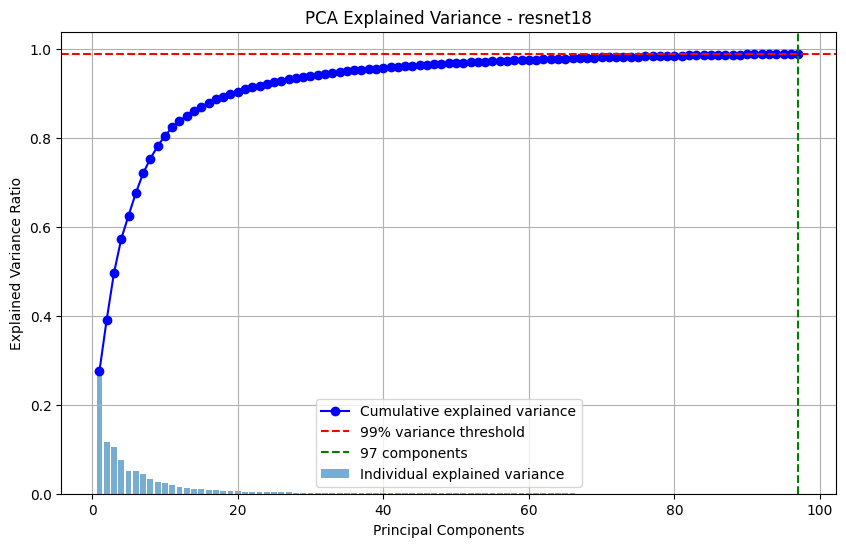

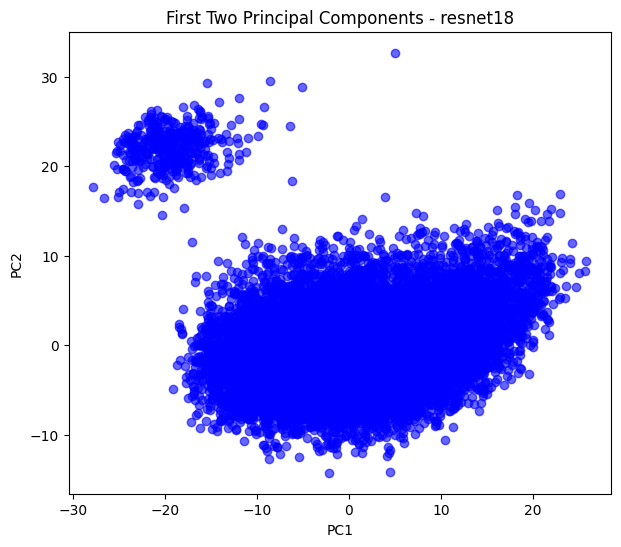

resnet18 Reconstruction Error: 0.009854045696556568


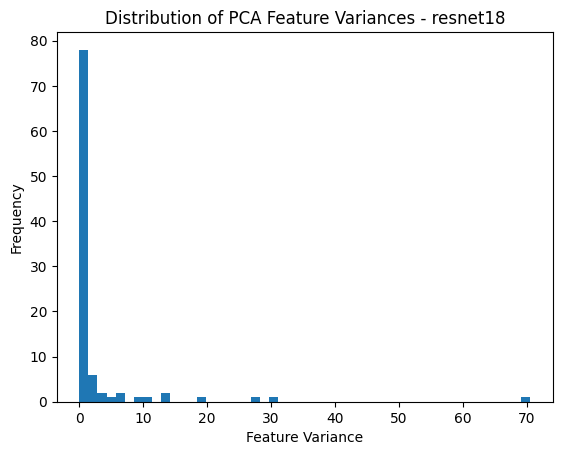


========== Running PCA for efficientnetb3 ==========
efficientnetb3 PCA shape: (16266, 133)


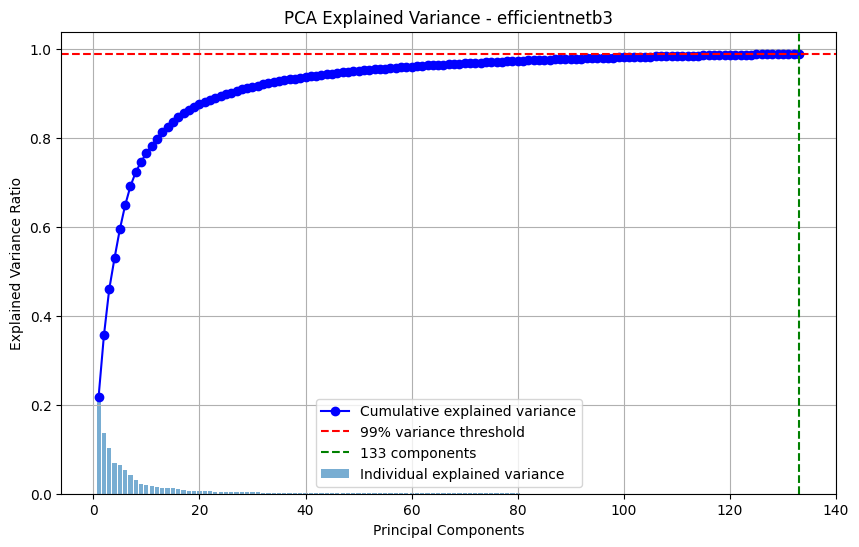

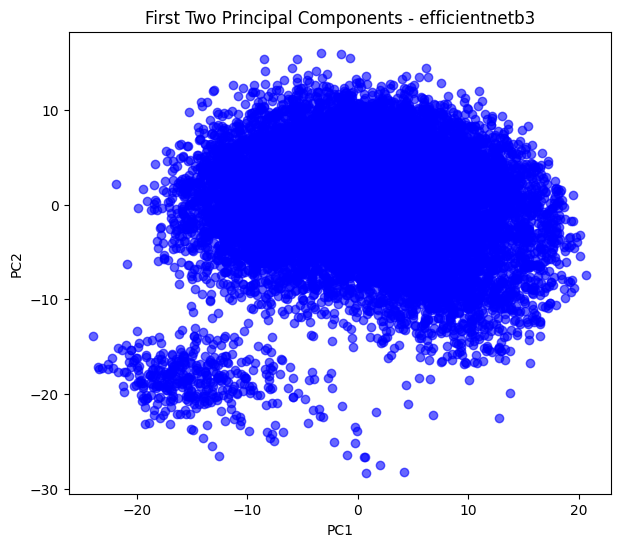

efficientnetb3 Reconstruction Error: 0.009951210580766201


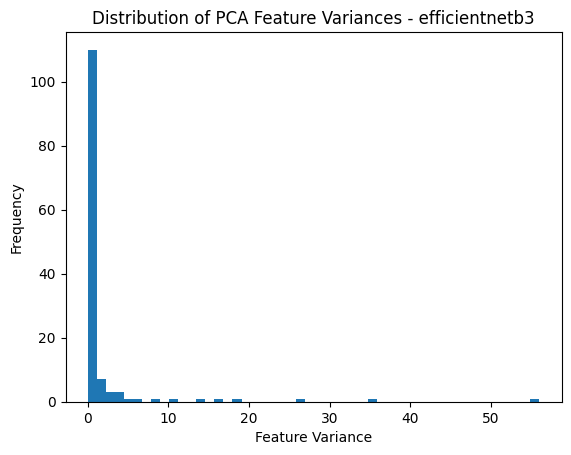


========== Running PCA for resnet101 ==========
resnet101 PCA shape: (16266, 179)


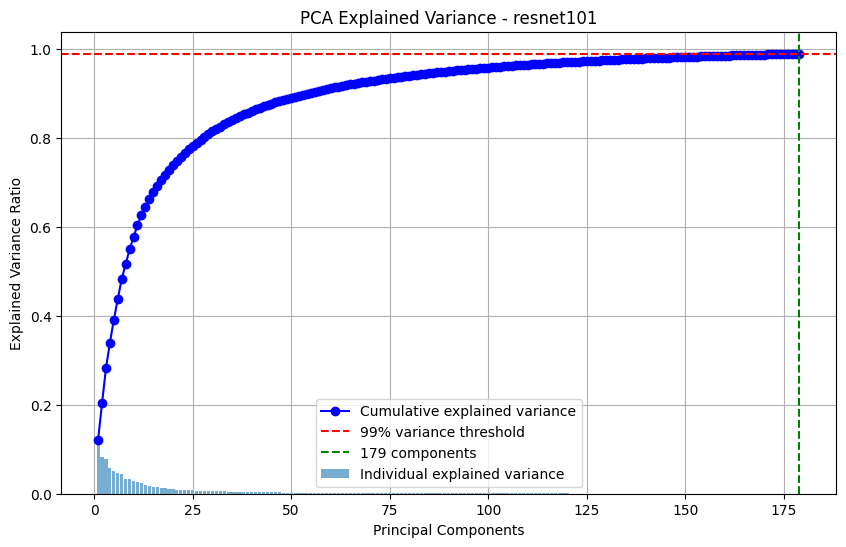

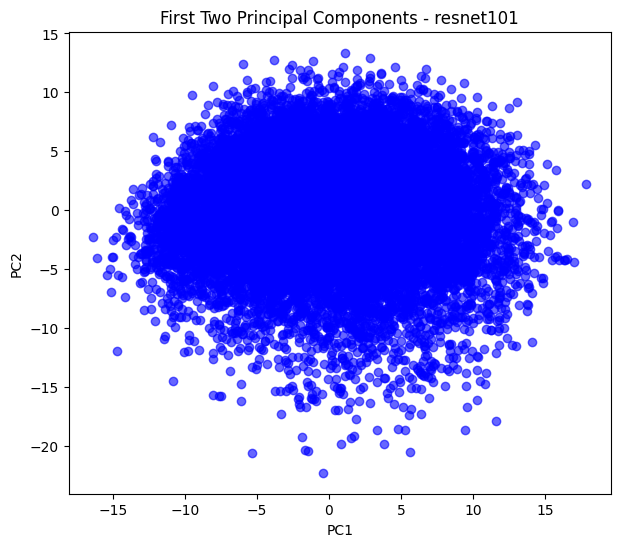

resnet101 Reconstruction Error: 0.009887829422950745


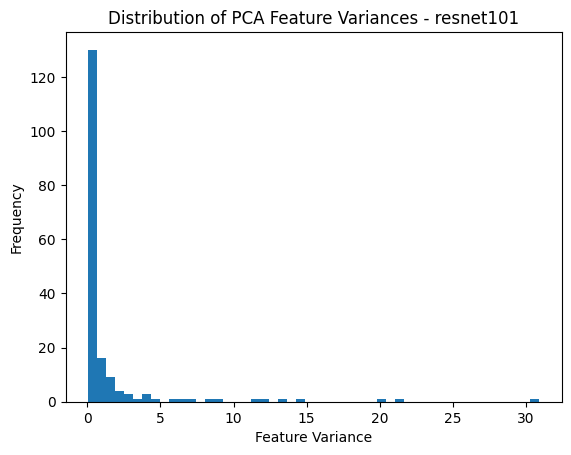


========== Running PCA for resnet152 ==========
resnet152 PCA shape: (16266, 174)


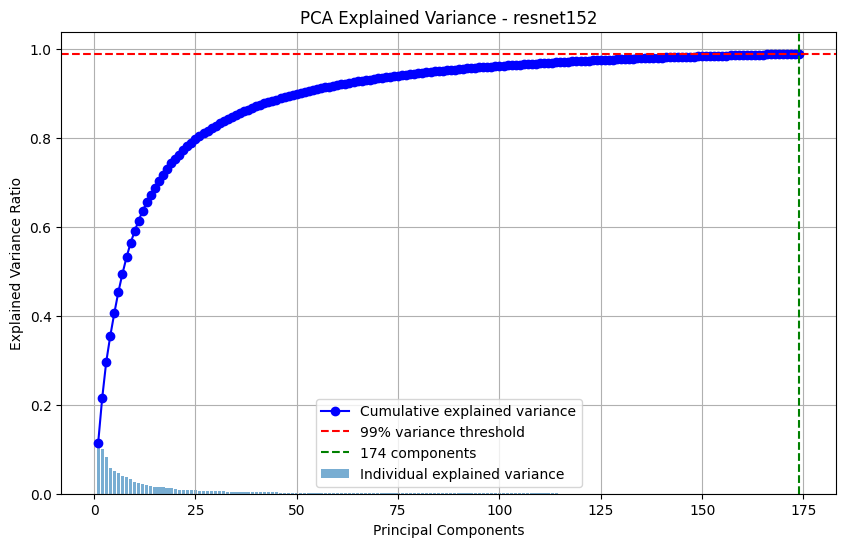

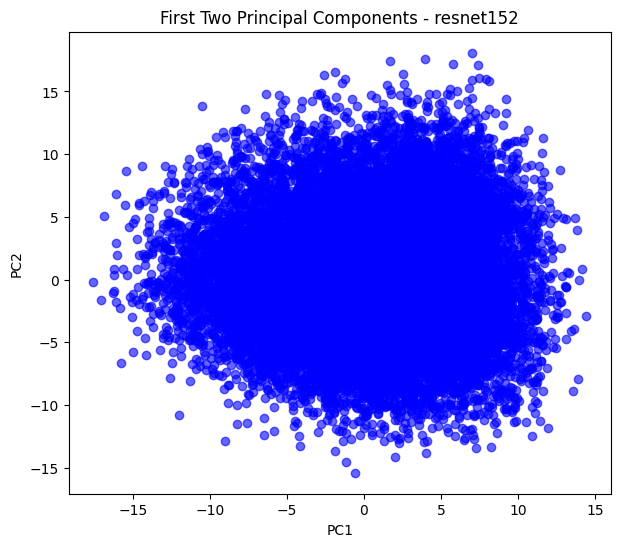

resnet152 Reconstruction Error: 0.009949244558811188


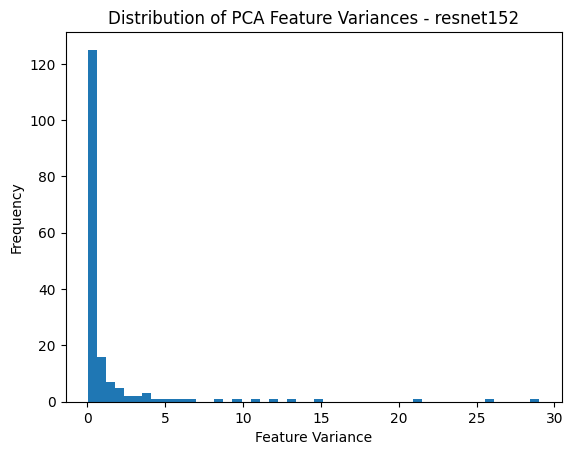


========== Running PCA for densenet169 ==========
densenet169 PCA shape: (16266, 199)


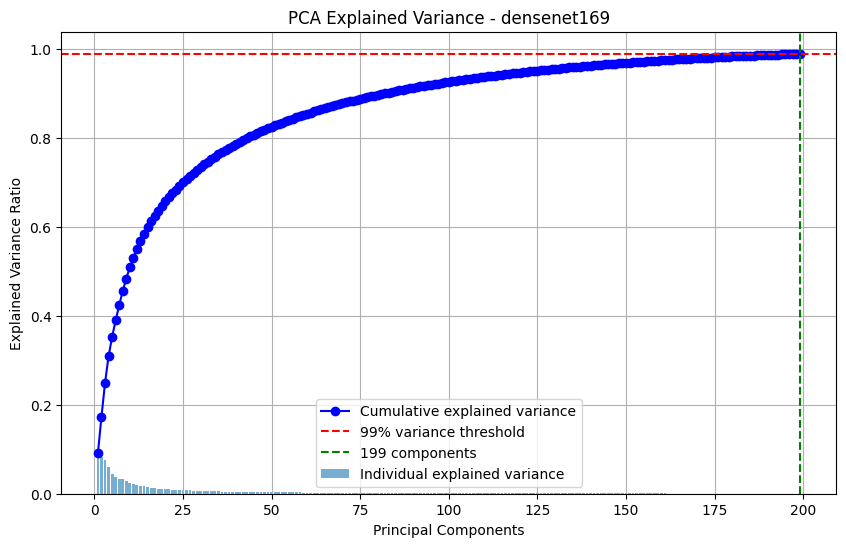

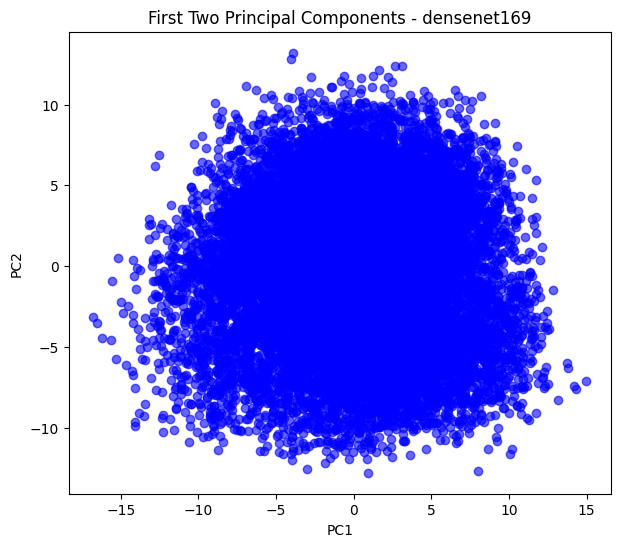

densenet169 Reconstruction Error: 0.009930848143994808


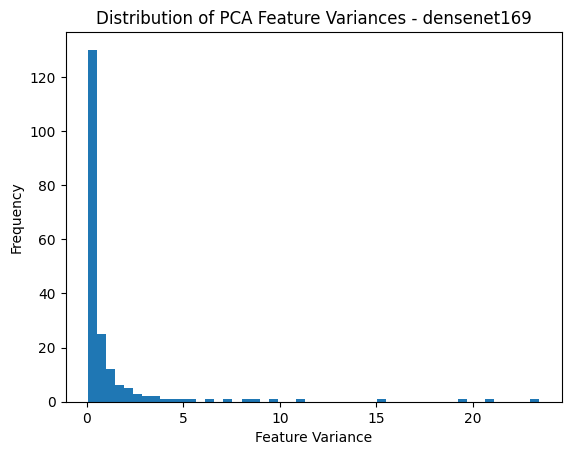


========== Running PCA for densenet201 ==========
densenet201 PCA shape: (16266, 203)


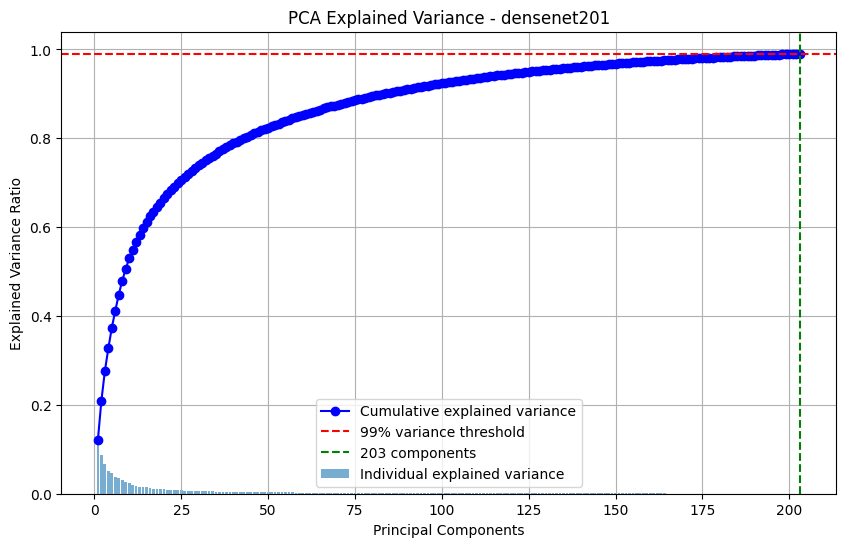

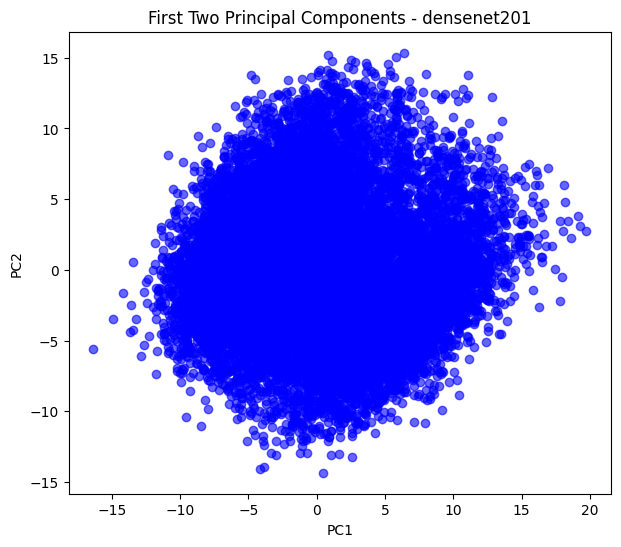

densenet201 Reconstruction Error: 0.009734134189784527


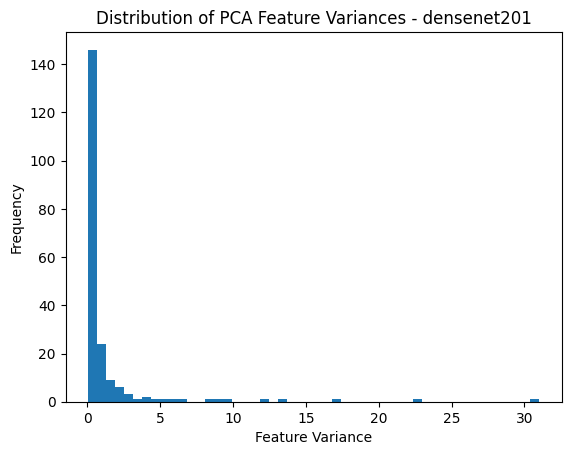

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Put all your dfs into a dictionary for looping
dfs = {
    "resnet50": df_resnet50_without_imageId,
    "mobilenetv2": df_mobilenetv2_without_imageId,
    "inceptionresnetv2": df_inceptionresnetv2_without_imageId,
    "densenet121": df_densenet121_without_imageId,
    "resnet18": df_resnet18_without_imageId,
    "efficientnetb3": df_efficientnetb3_features_without_imageId,
    "resnet101": df_resnet101_without_imageId,
    "resnet152": df_resnet152_without_imageId,
    "densenet169": df_densenet169_without_imageId,
    "densenet201": df_densenet201_without_imageId
}

for name, df in dfs.items():
    print(f"\n========== Running PCA for {name} ==========")

    # 1) Standardize
    scaler = StandardScaler(with_mean=True, with_std=True)
    X_std = scaler.fit_transform(df)

    # 2) PCA fit keeping 99% variance
    pca = PCA(n_components=0.99, random_state=42)
    X_pca = pca.fit_transform(X_std)
    print(f"{name} PCA shape: {X_pca.shape}")

    # 3) Explained variance plot
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    plt.figure(figsize=(10,6))
    plt.bar(range(1, len(explained_variance)+1), explained_variance, alpha=0.6, label='Individual explained variance')
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', color='blue', label='Cumulative explained variance')
    plt.axhline(y=0.99, color='r', linestyle='--', label='99% variance threshold')
    n_components_99 = np.argmax(cumulative_variance >= 0.99) + 1
    plt.axvline(x=n_components_99, color='g', linestyle='--', label=f'{n_components_99} components')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.title(f'PCA Explained Variance - {name}')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 4) Scatter plot of first two PCs
    if X_pca.shape[1] >= 2:  # only if at least 2 PCs
        plt.figure(figsize=(7,6))
        plt.scatter(X_pca[:, 0], X_pca[:, 1], alpha=0.6, c='blue')
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.title(f"First Two Principal Components - {name}")
        plt.show()

    # 5) Reconstruction error
    X_reconstructed = pca.inverse_transform(X_pca)
    reconstruction_error = np.mean((X_std - X_reconstructed) ** 2)
    print(f"{name} Reconstruction Error: {reconstruction_error}")

    # 6) Histogram of variances
    variances = X_pca.var(axis=0)
    plt.hist(variances, bins=50)
    plt.xlabel("Feature Variance")
    plt.ylabel("Frequency")
    plt.title(f"Distribution of PCA Feature Variances - {name}")
    plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import os  # for splitting filename

# target dataframe (has labels + image_id)
dataF_for_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
target = dataF_for_dr[["image_id", "diabetic_retinopathy"]]

# Dictionary of feature dataframes
dfs = {
    "resnet50": df_resnet50,
    "mobilenetv2": df_mobilenetv2,
    "inceptionresnetv2": df_inceptionresnetv2,
    "densenet121": df_densenet121,
    "resnet18": df_resnet18,
    "efficientnetb3": df_efficientnetb3_features,
    "resnet101": df_resnet101,
    "resnet152": df_resnet152,
    "densenet169": df_densenet169,
    "densenet201": df_densenet201
}

results = {}

for name, df in dfs.items():
    print(f"\n========== Evaluating {name} ==========")

    # If 'filename' exists, create a column without extension
    if "filename" in df.columns:
        df["image_id_no_ext"] = df["filename"].apply(lambda x: os.path.splitext(x)[0])
        merge_left = "image_id_no_ext"
    else:
        # Otherwise assume df index or column 'image_id' matches target
        merge_left = "image_id"

    # Merge with labels on appropriate column
    df_merged = pd.merge(df, target, left_on=merge_left, right_on="image_id")

    # Prepare X and y
    drop_cols = ["filename", "image_id", "image_id_no_ext", "diabetic_retinopathy"]
    X = df_merged.drop(columns=[c for c in drop_cols if c in df_merged.columns], errors="ignore").values
    y = df_merged["diabetic_retinopathy"].values

    # Standardize
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # PCA (95% variance)
    pca = PCA(n_components=0.99, random_state=42)
    X_pca = pca.fit_transform(X_std)

    # Logistic Regression + CV
    clf = LogisticRegression(max_iter=500)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring="roc_auc")

    results[name] = {
        "n_components": X_pca.shape[1],
        "reconstruction_error": np.mean((X_std - pca.inverse_transform(X_pca)) ** 2),
        "mean_auc": scores.mean(),
        "std_auc": scores.std()
    }

# Convert to DataFrame for comparison
df_results = pd.DataFrame(results).T.sort_values(by="mean_auc", ascending=False)
print("\n===== Model Comparison =====")
print(df_results)



========== Evaluating resnet50 ==========

========== Evaluating mobilenetv2 ==========

========== Evaluating inceptionresnetv2 ==========

========== Evaluating densenet121 ==========

========== Evaluating resnet18 ==========

========== Evaluating efficientnetb3 ==========

========== Evaluating resnet101 ==========

========== Evaluating resnet152 ==========

========== Evaluating densenet169 ==========

========== Evaluating densenet201 ==========

===== Model Comparison =====
                   n_components  reconstruction_error  mean_auc   std_auc
efficientnetb3            133.0              0.009951  0.925512  0.012989
densenet121               101.0              0.009865  0.906592  0.005115
resnet50                   94.0              0.009927  0.902033  0.010720
resnet101                 179.0              0.009888  0.893844  0.016938
resnet152                 174.0              0.009949  0.892230  0.022170
densenet201               203.0              0.009734  0.890265  0.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import os  # for splitting filename

# target dataframe (has labels + image_id)
dataF_for_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
target = dataF_for_dr[["image_id", "diabetic_retinopathy"]]

# Dictionary of feature dataframes
dfs = {
    "resnet50": df_resnet50,
    "mobilenetv2": df_mobilenetv2,
    "inceptionresnetv2": df_inceptionresnetv2,
    "densenet121": df_densenet121,
    "resnet18": df_resnet18,
    "efficientnetb3": df_efficientnetb3_features,
    "resnet101": df_resnet101,
    "resnet152": df_resnet152,
    "densenet169": df_densenet169,
    "densenet201": df_densenet201
}

results = {}

for name, df in dfs.items():
    print(f"\n========== Evaluating {name} ==========")

    # If 'filename' exists, create a column without extension
    if "filename" in df.columns:
        df["image_id_no_ext"] = df["filename"].apply(lambda x: os.path.splitext(x)[0])
        merge_left = "image_id_no_ext"
    else:
        # Otherwise assume df index or column 'image_id' matches target
        merge_left = "image_id"

    # Merge with labels on appropriate column
    df_merged = pd.merge(df, target, left_on=merge_left, right_on="image_id")

    # Prepare X and y
    drop_cols = ["filename", "image_id", "image_id_no_ext", "diabetic_retinopathy"]
    X = df_merged.drop(columns=[c for c in drop_cols if c in df_merged.columns], errors="ignore").values
    y = df_merged["diabetic_retinopathy"].values

    # Standardize
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # PCA (95% variance)
    pca = PCA(n_components=0.99, random_state=42)
    X_pca = pca.fit_transform(X_std)

    #RandomForestClassifier
    from sklearn.ensemble import RandomForestClassifier
    clf = RandomForestClassifier(n_estimators=200, random_state=42)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring="roc_auc")


    results[name] = {
        "n_components": X_pca.shape[1],
        "reconstruction_error": np.mean((X_std - pca.inverse_transform(X_pca)) ** 2),
        "mean_auc": scores.mean(),
        "std_auc": scores.std()
    }

# Convert to DataFrame for comparison
df_results = pd.DataFrame(results).T.sort_values(by="mean_auc", ascending=False)
print("\n===== Model Comparison =====")
print(df_results)



========== Evaluating resnet50 ==========

========== Evaluating mobilenetv2 ==========

========== Evaluating inceptionresnetv2 ==========

========== Evaluating densenet121 ==========

========== Evaluating resnet18 ==========

========== Evaluating efficientnetb3 ==========

========== Evaluating resnet101 ==========


KeyboardInterrupt: 

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import os  # for splitting filename

# target dataframe (has labels + image_id)
dataF_for_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
target = dataF_for_dr[["image_id", "diabetic_retinopathy"]]

# Dictionary of feature dataframes
dfs = {
    "resnet50": df_resnet50,
    "mobilenetv2": df_mobilenetv2,
    "inceptionresnetv2": df_inceptionresnetv2,
    "densenet121": df_densenet121,
    "resnet18": df_resnet18,
    "efficientnetb3": df_efficientnetb3_features,
    "resnet101": df_resnet101,
    "resnet152": df_resnet152,
    "densenet169": df_densenet169,
    "densenet201": df_densenet201
}

results = {}

for name, df in dfs.items():
    print(f"\n========== Evaluating {name} ==========")

    # If 'filename' exists, create a column without extension
    if "filename" in df.columns:
        df["image_id_no_ext"] = df["filename"].apply(lambda x: os.path.splitext(x)[0])
        merge_left = "image_id_no_ext"
    else:
        # Otherwise assume df index or column 'image_id' matches target
        merge_left = "image_id"

    # Merge with labels on appropriate column
    df_merged = pd.merge(df, target, left_on=merge_left, right_on="image_id")

    # Prepare X and y
    drop_cols = ["filename", "image_id", "image_id_no_ext", "diabetic_retinopathy"]
    X = df_merged.drop(columns=[c for c in drop_cols if c in df_merged.columns], errors="ignore").values
    y = df_merged["diabetic_retinopathy"].values

    # Standardize
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # PCA (95% variance)
    pca = PCA(n_components=0.99, random_state=42)
    X_pca = pca.fit_transform(X_std)

    #XGBClassifier
    from xgboost import XGBClassifier
    clf = XGBClassifier(n_estimators=200, max_depth=5, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring="roc_auc")


    results[name] = {
        "n_components": X_pca.shape[1],
        "reconstruction_error": np.mean((X_std - pca.inverse_transform(X_pca)) ** 2),
        "mean_auc": scores.mean(),
        "std_auc": scores.std()
    }

# Convert to DataFrame for comparison
df_results = pd.DataFrame(results).T.sort_values(by="mean_auc", ascending=False)
print("\n===== Model Comparison =====")
print(df_results)



========== Evaluating resnet50 ==========

========== Evaluating mobilenetv2 ==========

========== Evaluating inceptionresnetv2 ==========

========== Evaluating densenet121 ==========

========== Evaluating resnet18 ==========

========== Evaluating efficientnetb3 ==========

========== Evaluating resnet101 ==========

========== Evaluating resnet152 ==========

========== Evaluating densenet169 ==========

========== Evaluating densenet201 ==========

===== Model Comparison =====
                   n_components  reconstruction_error  mean_auc   std_auc
efficientnetb3            133.0              0.009951  0.924167  0.009621
densenet121               101.0              0.009865  0.906585  0.006484
resnet50                   94.0              0.009927  0.897669  0.011522
densenet201               203.0              0.009734  0.882807  0.013264
resnet152                 174.0              0.009949  0.882576  0.020684
resnet101                 179.0              0.009888  0.881556  0.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import os  # for splitting filename

# target dataframe (has labels + image_id)
dataF_for_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
target = dataF_for_dr[["image_id", "diabetic_retinopathy"]]

# Dictionary of feature dataframes
dfs = {
    "resnet50": df_resnet50,
    "mobilenetv2": df_mobilenetv2,
    "inceptionresnetv2": df_inceptionresnetv2,
    "densenet121": df_densenet121,
    "resnet18": df_resnet18,
    "efficientnetb3": df_efficientnetb3_features,
    "resnet101": df_resnet101,
    "resnet152": df_resnet152,
    "densenet169": df_densenet169,
    "densenet201": df_densenet201
}

results = {}

for name, df in dfs.items():
    print(f"\n========== Evaluating {name} ==========")

    # If 'filename' exists, create a column without extension
    if "filename" in df.columns:
        df["image_id_no_ext"] = df["filename"].apply(lambda x: os.path.splitext(x)[0])
        merge_left = "image_id_no_ext"
    else:
        # Otherwise assume df index or column 'image_id' matches target
        merge_left = "image_id"

    # Merge with labels on appropriate column
    df_merged = pd.merge(df, target, left_on=merge_left, right_on="image_id")

    # Prepare X and y
    drop_cols = ["filename", "image_id", "image_id_no_ext", "diabetic_retinopathy"]
    X = df_merged.drop(columns=[c for c in drop_cols if c in df_merged.columns], errors="ignore").values
    y = df_merged["diabetic_retinopathy"].values

    # Standardize
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # PCA (95% variance)
    pca = PCA(n_components=0.99, random_state=42)
    X_pca = pca.fit_transform(X_std)

    #SVC
    from sklearn.svm import SVC
    clf = SVC(kernel='rbf', probability=True, random_state=42)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring="roc_auc")



    results[name] = {
        "n_components": X_pca.shape[1],
        "reconstruction_error": np.mean((X_std - pca.inverse_transform(X_pca)) ** 2),
        "mean_auc": scores.mean(),
        "std_auc": scores.std()
    }

# Convert to DataFrame for comparison
df_results = pd.DataFrame(results).T.sort_values(by="mean_auc", ascending=False)
print("\n===== Model Comparison =====")
print(df_results)



========== Evaluating resnet50 ==========

========== Evaluating mobilenetv2 ==========

========== Evaluating inceptionresnetv2 ==========

========== Evaluating densenet121 ==========

========== Evaluating efficientnetb3 ==========

========== Evaluating resnet101 ==========

========== Evaluating resnet152 ==========

========== Evaluating densenet169 ==========

========== Evaluating densenet201 ==========

===== Model Comparison =====
                   n_components  reconstruction_error  mean_auc   std_auc
efficientnetb3            133.0              0.009951  0.938634  0.010815
densenet121               101.0              0.009865  0.920869  0.012389
resnet50                   94.0              0.009927  0.914190  0.015022
densenet201               203.0              0.009734  0.904625  0.014807
densenet169               199.0              0.009931  0.901044  0.018387
resnet101                 179.0              0.009888  0.899160  0.014070
mobilenetv2               103.0     

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import os  # for splitting filename

# target dataframe (has labels + image_id)
dataF_for_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
target = dataF_for_dr[["image_id", "diabetic_retinopathy"]]

# Dictionary of feature dataframes
dfs = {
    "resnet50": df_resnet50,
    "mobilenetv2": df_mobilenetv2,
    "inceptionresnetv2": df_inceptionresnetv2,
    "densenet121": df_densenet121,
    "resnet18": df_resnet18,
    "efficientnetb3": df_efficientnetb3_features,
    "resnet101": df_resnet101,
    "resnet152": df_resnet152,
    "densenet169": df_densenet169,
    "densenet201": df_densenet201
}

results = {}

for name, df in dfs.items():
    print(f"\n========== Evaluating {name} ==========")

    # If 'filename' exists, create a column without extension
    if "filename" in df.columns:
        df["image_id_no_ext"] = df["filename"].apply(lambda x: os.path.splitext(x)[0])
        merge_left = "image_id_no_ext"
    else:
        # Otherwise assume df index or column 'image_id' matches target
        merge_left = "image_id"

    # Merge with labels on appropriate column
    df_merged = pd.merge(df, target, left_on=merge_left, right_on="image_id")

    # Prepare X and y
    drop_cols = ["filename", "image_id", "image_id_no_ext", "diabetic_retinopathy"]
    X = df_merged.drop(columns=[c for c in drop_cols if c in df_merged.columns], errors="ignore").values
    y = df_merged["diabetic_retinopathy"].values

    # Standardize
    scaler = StandardScaler()
    X_std = scaler.fit_transform(X)

    # PCA (95% variance)
    pca = PCA(n_components=0.99, random_state=42)
    X_pca = pca.fit_transform(X_std)

    #MLPClassifier
    from sklearn.neural_network import MLPClassifier
    clf = MLPClassifier(hidden_layer_sizes=(128,64), max_iter=500, random_state=42)
    scores = cross_val_score(clf, X_pca, y, cv=5, scoring="roc_auc")





    results[name] = {
        "n_components": X_pca.shape[1],
        "reconstruction_error": np.mean((X_std - pca.inverse_transform(X_pca)) ** 2),
        "mean_auc": scores.mean(),
        "std_auc": scores.std()
    }

# Convert to DataFrame for comparison
df_results = pd.DataFrame(results).T.sort_values(by="mean_auc", ascending=False)
print("\n===== Model Comparison =====")
print(df_results)



========== Evaluating resnet50 ==========

========== Evaluating mobilenetv2 ==========

========== Evaluating inceptionresnetv2 ==========

========== Evaluating densenet121 ==========

========== Evaluating efficientnetb3 ==========

========== Evaluating resnet101 ==========

========== Evaluating resnet152 ==========

========== Evaluating densenet169 ==========

========== Evaluating densenet201 ==========

===== Model Comparison =====
                   n_components  reconstruction_error  mean_auc   std_auc
efficientnetb3            133.0              0.009951  0.925880  0.009178
densenet121               101.0              0.009865  0.918562  0.010468
resnet50                   94.0              0.009927  0.901242  0.011124
mobilenetv2               103.0              0.009841  0.893856  0.012351
resnet101                 179.0              0.009888  0.889150  0.014400
densenet169               199.0              0.009931  0.889097  0.017337
densenet201               203.0     

In [ ]:
df_efficientnetb3_features = pd.read_parquet("/content/df_efficientnetb3_features.parquet")

df_efficientnetb3_features_without_imageId = df_efficientnetb3_features.drop(columns=['filename'])

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd

df_efficientnetb3_features = pd.read_parquet("/content/df_efficientnetb3_features.parquet")

# Keep filenames safe
ids = df_efficientnetb3_features['filename']

# Standardize features (exclude filename column)
scaler = StandardScaler(with_mean=True, with_std=True)
X_std = scaler.fit_transform(df_efficientnetb3_features.drop(columns=['filename']))

# PCA
pca = PCA(n_components=0.99, random_state=42)
X_pca = pca.fit_transform(X_std)

# Build PCA DataFrame with filenames preserved
df_features_efficientnetb3 = pd.DataFrame(X_pca, index=ids)
df_features_efficientnetb3.index.name = "filename"

print(df_features_efficientnetb3.head())


                    0         1         2         3         4         5    \
filename                                                                    
img15903.jpg  -3.592151  4.688638  4.582955  0.562544 -4.189972  0.290838   
img15002.jpg  -3.484809  2.826800  2.318323  0.712574 -4.629986 -3.755746   
img15640.jpg  -3.386371  9.293484 -4.669433 -0.007252  4.749338 -0.741463   
img15387.jpg -10.332663  1.249642 -4.678374 -0.901593 -5.438857  1.100588   
img15740.jpg   2.049474  7.676735 -3.305134 -5.011627 -0.745182 -3.131155   

                   6         7         8         9    ...       123       124  \
filename                                              ...                       
img15903.jpg -2.597577 -1.687247  3.909827 -0.644248  ... -0.237119 -0.156643   
img15002.jpg -2.518557  3.064854 -1.347228 -0.415780  ...  0.249826  0.013429   
img15640.jpg -2.579093  2.741164  1.951571  2.836499  ... -0.131678 -0.314559   
img15387.jpg -4.983833  4.223788  3.451232  0.747021  .

In [ ]:
df_features_efficientnetb3 = pd.DataFrame(X_pca)

In [ ]:
df_features_efficientnetb3.head(1)

0         1         2         3         4         5         6    \
0 -3.592151  4.688638  4.582955  0.562544 -4.189972  0.290838 -2.597577   

        7         8         9    ...       123       124       125       126  \
0 -1.687247  3.909827 -0.644248  ... -0.237119 -0.156643  0.025877 -0.274332   

        127       128      129       130       131       132  
0  0.076408  0.236039  0.12324 -0.177145  0.160483 -0.091988  

[1 rows x 133 columns]

In [ ]:
df_features_efficientnetb3.to_parquet("efficientnetb3_features_ready_to_fus_with_filename.parquet", index=True)

In [ ]:
import torch

# Suppose this is your EfficientNetB3 feature extractor
# Either the full model or your pipeline (without the classifier)
torch.save(efficientnetb3_model.state_dict(), "efficientnetb3_features_model.pth")
print("EfficientNetB3 feature extractor saved to efficientnetb3_features_model.pth")


# clinical pipeline

*** clinical data ***

In [ ]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

X_clinical = dataF[kept_columns].values
rows = dataF[kept_columns].shape[0]

scaler = StandardScaler()
X_clinical_scaled = scaler.fit_transform(X_clinical)

X_clinical_tensor = torch.tensor(X_clinical_scaled, dtype=torch.float32)

input_dim = X_clinical_tensor.shape[1]  # 21 features

hidden_dim = input_dim*4

bottleneck_dim = int(np.sqrt(input_dim)) # strong compression rule

pipeline_cvr = ClinicalFeatureEncoder(input_dim, hidden_dim)
optimizer = torch.optim.Adam(pipeline_cvr.parameters(), lr=1e-3)
criterion = nn.MSELoss()


In [ ]:
X_clinical_tensor.shape

torch.Size([16266, 21])

In [ ]:
# Suppose you store losses
losses = []
epochs = 250
for epoch in range(epochs):
    optimizer.zero_grad()
    x_hat = pipeline_cvr(X_clinical_tensor)
    loss = criterion(x_hat, X_clinical_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.9115
Epoch 20, Loss: 0.7759
Epoch 30, Loss: 0.6151
Epoch 40, Loss: 0.4771
Epoch 50, Loss: 0.3766
Epoch 60, Loss: 0.3119
Epoch 70, Loss: 0.2713
Epoch 80, Loss: 0.2448
Epoch 90, Loss: 0.2260
Epoch 100, Loss: 0.2112
Epoch 110, Loss: 0.2004
Epoch 120, Loss: 0.1921
Epoch 130, Loss: 0.1888
Epoch 140, Loss: 0.1828
Epoch 150, Loss: 0.1783
Epoch 160, Loss: 0.1755
Epoch 170, Loss: 0.1721
Epoch 180, Loss: 0.1681
Epoch 190, Loss: 0.1640
Epoch 200, Loss: 0.1622
Epoch 210, Loss: 0.1603
Epoch 220, Loss: 0.1579
Epoch 230, Loss: 0.1550
Epoch 240, Loss: 0.1543
Epoch 250, Loss: 0.1530


In [ ]:
with torch.no_grad():
    x_hat = pipeline_cvr(X_clinical_tensor)
    num = torch.sum((X_clinical_tensor - x_hat) ** 2)           # SSE
    den = torch.sum((X_clinical_tensor - X_clinical_tensor.mean(0)) ** 2)       # Total variance
    R2 = 1 - num / den
    print("Explained variance (R^2):", R2.item())

Explained variance (R^2): 0.8495931625366211


In [ ]:
# save the model in file
# torch.save(pipeline_cvr.state_dict(), "clinical_model.pth")


# Load the model
# loaded_model = ClinicalFeatureEncoder(input_dim, hidden_dim)
# loaded_model.load_state_dict(torch.load("clinical_encoder.pth"))
# loaded_model.eval()  # put in evaluation mode

In [ ]:
with torch.no_grad():
    x_hat = pipeline_cvr(X_clinical_tensor)

x_hat_np = x_hat.cpu().numpy()

df_clinical_input = pd.DataFrame(x_hat_np)

print(df_clinical_input.head())

         0         1         2         3         4         5         6   \
0 -0.484619  0.031224  0.673518 -1.223719 -1.676473  2.047502  0.622663   
1 -0.745977  0.281820  1.012984 -0.709121  1.176177  2.315960  1.878054   
2 -2.683117 -1.997128  1.475783  0.330566 -0.558744  1.837998 -0.378201   
3 -2.474119 -1.114845  1.109708  0.893743  0.595592  1.717710 -0.609559   
4 -1.263645  0.089756  1.074070 -1.378153 -1.181140  2.550217  0.528330   

         7         8         9   ...        11        12        13        14  \
0 -0.275797 -0.581476 -0.276456  ... -0.290436 -0.255871 -0.235203 -0.201626   
1 -0.046385 -0.657278 -0.039058  ... -0.011185  0.189492  0.298941 -0.091681   
2  0.155402 -0.412412 -0.241729  ...  0.016913 -0.310551 -0.219065 -0.174262   
3  0.987986 -0.348063  0.011579  ...  0.276867 -0.438590  0.143011 -0.364496   
4 -0.428672 -0.096230 -0.281673  ... -0.241984 -0.265921  0.171326  0.224144   

         15        16        17        18        19        20  
0  0

In [ ]:
# save the df_clinical_input into parquet file
df_clinical_input.to_parquet("df_clinical_input.parquet", index=True)

In [ ]:
print(x_hat)

tensor([[-4.8462e-01,  3.1224e-02,  6.7352e-01,  ...,  6.6119e-01,
         -2.7117e-03,  3.5256e-01],
        [-7.4598e-01,  2.8182e-01,  1.0130e+00,  ...,  1.7463e+00,
         -1.3936e-01, -7.1709e-01],
        [-2.6831e+00, -1.9971e+00,  1.4758e+00,  ..., -4.1255e-01,
          2.2582e-01,  1.9652e-01],
        ...,
        [-2.9020e+00, -2.2369e+00,  1.4064e+00,  ..., -4.3147e-01,
         -3.6847e-01, -3.2936e-01],
        [-2.1701e+00, -2.4707e-01,  1.3616e+00,  ...,  1.6812e+00,
         -8.1483e-01, -1.3237e-01],
        [-2.4533e+00, -8.7836e-01,  1.7098e+00,  ..., -5.6502e-01,
         -1.5971e-01, -1.8989e-01]])


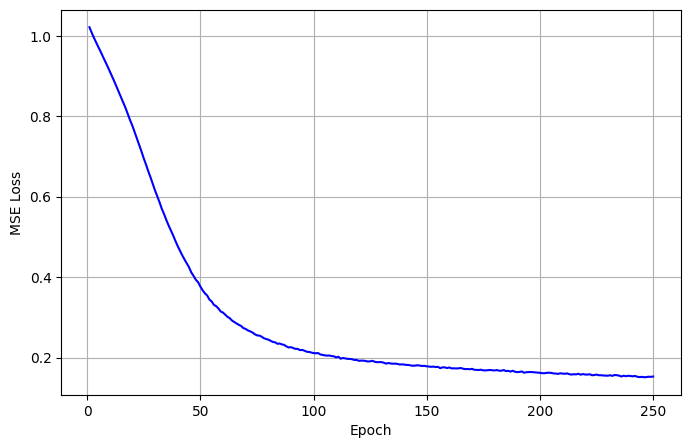

In [ ]:
import matplotlib.pyplot as plt

# Plot loss
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), losses, color='blue')

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.grid(True)
plt.show()


5️⃣ Why it works

Hidden dimension increased (input_dim*4) → more capacity to learn feature correlations.

Dropout prevents overfitting but is not too high (0.2).

ReLU activations help learn nonlinear relationships.

StandardScaler ensures all features contribute equally.

Enough epochs (150) → network converges.

In [ ]:
#1st attempt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

X_clinical = dataF[kept_columns].values
rows = dataF[kept_columns].shape[0]

scaler = StandardScaler()
X_clinical_scaled = scaler.fit_transform(X_clinical)

X_clinical_tensor = torch.tensor(X_clinical_scaled, dtype=torch.float32)

input_dim = X_clinical_tensor.shape[1]  # 21 features

hidden_dim = input_dim*1

bottleneck_dim = int(np.sqrt(input_dim)) # strong compression rule

pipeline_cvr = ClinicalFeatureEncoder(input_dim, hidden_dim)
optimizer = torch.optim.Adam(pipeline_cvr.parameters(), lr=1e-3)
criterion = nn.MSELoss()

losses = []
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    x_hat = pipeline_cvr(X_clinical_tensor)
    loss = criterion(x_hat, X_clinical_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

with torch.no_grad():
    x_hat = pipeline_cvr(X_clinical_tensor)
    num = torch.sum((X_clinical_tensor - x_hat) ** 2)           # SSE
    den = torch.sum((X_clinical_tensor - X_clinical_tensor.mean(0)) ** 2)       # Total variance
    R2 = 1 - num / den
    print("Explained variance (R^2):", R2.item())

In [ ]:
#2st attempt
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

X_clinical = dataF[kept_columns].values
rows = dataF[kept_columns].shape[0]

scaler = StandardScaler()
X_clinical_scaled = scaler.fit_transform(X_clinical)

X_clinical_tensor = torch.tensor(X_clinical_scaled, dtype=torch.float32)

input_dim = X_clinical_tensor.shape[1]  # 21 features

hidden_dim = input_dim*2

bottleneck_dim = int(np.sqrt(input_dim)) # strong compression rule

pipeline_cvr = ClinicalFeatureEncoder(input_dim, hidden_dim)
optimizer = torch.optim.Adam(pipeline_cvr.parameters(), lr=1e-3)
criterion = nn.MSELoss()

losses = []
epochs = 50
for epoch in range(epochs):
    optimizer.zero_grad()
    x_hat = pipeline_cvr(X_clinical_tensor)
    loss = criterion(x_hat, X_clinical_tensor)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

with torch.no_grad():
    x_hat = pipeline_cvr(X_clinical_tensor)
    num = torch.sum((X_clinical_tensor - x_hat) ** 2)           # SSE
    den = torch.sum((X_clinical_tensor - X_clinical_tensor.mean(0)) ** 2)       # Total variance
    R2 = 1 - num / den
    print("Explained variance (R^2):", R2.item())

In [ ]:
x_hat_cvr = scaler.inverse_transform(x_hat)
df_reconstructed = pd.DataFrame(x_hat_cvr)
print(df_reconstructed.head())

In [ ]:
import numpy as np

# Check if there are any NaN values in the NumPy array
nan_check = np.isnan(X_clinical)

# Sum the NaN values per column (if it's a 2D array)
nan_count_per_column = np.sum(nan_check, axis=0)

# Check if there are any NaN values in the entire array
any_nan = np.isnan(X_clinical).any()

print(f"NaN values per column: {nan_count_per_column}")
print(f"Does the array contain any NaN values? {any_nan}")

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import matplotlib.pyplot as plt

# Plot histograms for ALL embedding features
df_reconstructed.hist(figsize=(20, 20), bins=30)

# Add a global title
plt.suptitle("Distribution of All Clinical Embedding Features", fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust so title fits
plt.show()


NameError: name 'df_reconstructed' is not defined

In [ ]:
import seaborn as sns

corr = df_reconstructed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap of clinical embeddings")
plt.show()

NameError: name 'df_reconstructed' is not defined

# final model

class fusion

In [ ]:
# # class
# class MultimodalClassifier(nn.Module):
#     def __init__(self, clinical_feat, image_feat, hidden_dim, num_classes_dr):
#         super().__init__()
#         #self.clinical_encoder = ClinicalFeatureEncoder(clinical_dim, hidden_dim)
#         #self.image_encoder = RetinalImageEncoder(image_dim) # image_dim in place hidden_dim ?
#         self.cross_modal = CrossModalTransformer(embed_dim=hidden_dim)

#         self.dr_head = nn.Linear(hidden_dim, num_classes_dr)
#         self.cvr_head = nn.Linear(hidden_dim, 1)  # Regression for cardiovascular risk

#     def forward(self, clinical, image):
#         clinical_embed = clinical_feat.unsqueeze(1)  # (B, 1, D)
#         image_embed = image_feat.unsqueeze(1)          # (B, 1, D)

#         joint = torch.cat([clinical_embed, image_embed], dim=1)       # (B, 2, D)
#         fused = self.cross_modal(joint)                               # (B, 2, D)
#         fused_rep = fused.mean(dim=1)                                 # (B, D)

#         return self.dr_head(fused_rep), self.cvr_head(fused_rep).squeeze(1)

In [ ]:
# class CrossModalTransformer(nn.Module):
#     def __init__(self, embed_dim, num_heads=4, num_layers=2):
#         super().__init__()
#         encoder_layer = nn.TransformerEncoderLayer(
#             d_model=embed_dim, nhead=num_heads, batch_first=True
#         )
#         self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

#     def forward(self, x):
#         return self.transformer(x)

* 1 attempt

In [ ]:
import torch
import torch.nn as nn

class CrossModalTransformer(nn.Module):
    def __init__(self, clinical_dim, image_dim, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        # Projection layers to map to same dimension
        self.clinical_proj = nn.Linear(clinical_dim, embed_dim)
        self.image_proj = nn.Linear(image_dim, embed_dim)

        # Transformer encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # Output heads
        self.cvr_head = nn.Linear(embed_dim, 1)  # CVR
        self.dr_head = nn.Linear(embed_dim, 1)   # DR

    def forward(self, clinical_feat, image_feat):
        # Project features to same dimension
        clinical_emb = self.clinical_proj(clinical_feat)
        image_emb = self.image_proj(image_feat)

        # Stack into sequence
        x = torch.stack([clinical_emb, image_emb], dim=1)  # (B, 2, embed_dim)

        #
        assert x.dim() == 3, f"Expected 3D input, got {x.shape}"
        assert x.shape[2] == self.clinical_proj.out_features, \
            f"Expected embed_dim={self.clinical_proj.out_features}, but got {x.shape[2]}"
        #
        # Transformer encoder
        encoded = self.transformer(x)  # (B, 2, embed_dim)

        # Fuse (mean pooling)
        fused = encoded.mean(dim=1)  # (B, embed_dim)

        # Predictions
        cvr_out = self.cvr_head(fused)
        dr_out = self.dr_head(fused)
        return cvr_out, dr_out

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class ClinicalImageDataset(Dataset):
    def __init__(self, dataframe, clinical_cols, image_cols, dr_col, cvr_col=None):
        """
        dataframe    : merged DataFrame with clinical, image, and labels
        clinical_cols: list of column names for clinical features
        image_cols   : list of column names for image features
        dr_col       : name of the DR label column
        cvr_col      : name of the CVR label column (can be None if missing)
        """
        self.df = dataframe
        self.clinical_cols = clinical_cols
        self.image_cols = image_cols
        self.dr_col = dr_col
        self.cvr_col = cvr_col

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        row = self.df.iloc[idx]

        clinical_feat = torch.tensor(pd.to_numeric(row[self.clinical_cols], errors="coerce").values, dtype=torch.float32)
        image_feat    = torch.tensor(pd.to_numeric(row[self.image_cols], errors="coerce").values, dtype=torch.float32)
        dr_label = torch.tensor(row[self.dr_col], dtype=torch.float32)

        if self.cvr_col:
            cvr_label = torch.tensor(row[self.cvr_col], dtype=torch.float32)
            return clinical_feat, image_feat, dr_label, cvr_label
        else:
            return clinical_feat, image_feat, dr_label


In [ ]:
import pandas as pd

df_clinical_input = pd.read_parquet("/content/df_clinical_input.parquet")
efficientnetb3_features_ready_to_fus = pd.read_parquet("/content/efficientnetb3_features_ready_to_fus_with_filename.parquet")

#index of df_clinical_input into column named filename
df_clinical_input = df_clinical_input.reset_index(drop=False)
df_clinical_input = df_clinical_input.rename(columns={'index': 'filename'})

In [ ]:
# Function to increment and format numeric index
def fix_filename(x):
    return f"img{x+1:05d}.jpg"  # add 1 and zero-pad to 5 digits

# Apply to the index
df_clinical_input.index = df_clinical_input.index.to_series().apply(fix_filename)

print(df_clinical_input.index[:10])


Index(['img00001.jpg', 'img00002.jpg', 'img00003.jpg', 'img00004.jpg',
       'img00005.jpg', 'img00006.jpg', 'img00007.jpg', 'img00008.jpg',
       'img00009.jpg', 'img00010.jpg'],
      dtype='object')


In [ ]:
#put the index into name filename column
# Move index into a column named "filename"
df_clinical_input.drop(columns=["filename"], inplace=True)
df_clinical_input = df_clinical_input.reset_index().rename(columns={"index": "filename"})

print(df_clinical_input.head())


       filename         0         1         2         3         4         5  \
0  img00001.jpg -0.484619  0.031224  0.673518 -1.223719 -1.676473  2.047502   
1  img00002.jpg -0.745977  0.281820  1.012984 -0.709121  1.176177  2.315960   
2  img00003.jpg -2.683117 -1.997128  1.475783  0.330566 -0.558744  1.837998   
3  img00004.jpg -2.474119 -1.114845  1.109708  0.893743  0.595592  1.717710   
4  img00005.jpg -1.263645  0.089756  1.074070 -1.378153 -1.181140  2.550217   

          6         7         8  ...        11        12        13        14  \
0  0.622663 -0.275797 -0.581476  ... -0.290436 -0.255871 -0.235203 -0.201626   
1  1.878054 -0.046385 -0.657278  ... -0.011185  0.189492  0.298941 -0.091681   
2 -0.378201  0.155402 -0.412412  ...  0.016913 -0.310551 -0.219065 -0.174262   
3 -0.609559  0.987986 -0.348063  ...  0.276867 -0.438590  0.143011 -0.364496   
4  0.528330 -0.428672 -0.096230  ... -0.241984 -0.265921  0.171326  0.224144   

         15        16        17        18   

In [ ]:
df_clinical_input

filename         0         1         2         3         4  \
0      img00001.jpg -0.484619  0.031224  0.673518 -1.223719 -1.676473   
1      img00002.jpg -0.745977  0.281820  1.012984 -0.709121  1.176177   
2      img00003.jpg -2.683117 -1.997128  1.475783  0.330566 -0.558744   
3      img00004.jpg -2.474119 -1.114845  1.109708  0.893743  0.595592   
4      img00005.jpg -1.263645  0.089756  1.074070 -1.378153 -1.181140   
...             ...       ...       ...       ...       ...       ...   
16261  img16262.jpg -1.026255  1.218856  2.129727 -1.221627  0.869133   
16262  img16263.jpg -2.720744 -1.305878  1.793107 -1.712195 -1.521169   
16263  img16264.jpg -2.902005 -2.236882  1.406409 -1.132459  0.966310   
16264  img16265.jpg -2.170057 -0.247073  1.361555 -1.056912 -1.394579   
16265  img16266.jpg -2.453331 -0.878365  1.709847 -1.927155  0.706776   

              5         6         7         8  ...        11        12  \
0      2.047502  0.622663 -0.275797 -0.581476  ... -0.290436 -0.255871   
1      2.315960  1.878054 -0.046385 -0.657278  ... -0.011185  0.189492   
2      1.837998 -0.378201  0.155402 -0.412412  ...  0.016913 -0.310551   
3      1.717710 -0.609559  0.987986 -0.348063  ...  0.276867 -0.438590   
4      2.550217  0.528330 -0.428672 -0.096230  ... -0.241984 -0.265921   
...         ...       ...       ...       ...  ...       ...       ...   
16261  2.255041  1.516371 -0.272330 -0.390535  ...  2.365930 -0.063081   
16262  1.704498 -0.131443 -0.055766 -0.938787  ...  0.189877  0.116746   
16263  1.953618 -0.487003 -0.171155 -0.571105  ...  0.041458  0.009123   
16264  1.947286  1.837233  0.110666 -0.511381  ...  0.275331 -0.148229   
16265  2.639559 -0.501450 -0.215197 -0.543896  ...  0.256510  0.210116   

             13        14        15        16        17        18        19  \
0     -0.235203 -0.201626  0.099028 -0.108443  0.217852  0.661193 -0.002712   
1      0.298941 -0.091681 -0.393199 -0.618137 -0.019448  1.746342 -0.139361   
2     -0.219065 -0.174262 -0.183672 -0.615665  0.406475 -0.412549  0.225823   
3      0.143011 -0.364496  0.217522 -0.547936  0.055472 -0.552350  0.004259   
4      0.171326  0.224144  0.167227 -0.117118 -0.006952  0.359079 -0.923727   
...         ...       ...       ...       ...       ...       ...       ...   
16261  0.308897  0.287762 -0.221027 -0.674923 -0.901702  1.590977 -1.063145   
16262  0.003081 -0.574415 -0.271633 -0.938505  0.159773 -0.135645 -0.844071   
16263  0.418703 -0.394586 -0.105926 -0.775600  0.144759 -0.431468 -0.368474   
16264  0.279578 -0.515534  0.273418 -0.090531 -0.111102  1.681244 -0.814827   
16265  0.076550 -0.514495 -0.364107 -0.557027  0.656222 -0.565023 -0.159707   

             20  
0      0.352557  
1     -0.717086  
2      0.196516  
3      0.051648  
4     -0.154848  
...         ...  
16261  0.375127  
16262  0.538876  
16263 -0.329363  
16264 -0.132373  
16265 -0.189893  

[16266 rows x 22 columns]

In [ ]:
efficientnetb3_features_ready_to_fus

0         1         2         3         4         5    \
filename                                                                    
img15903.jpg  -3.592151  4.688638  4.582955  0.562544 -4.189972  0.290838   
img15002.jpg  -3.484809  2.826800  2.318323  0.712574 -4.629986 -3.755746   
img15640.jpg  -3.386371  9.293484 -4.669433 -0.007252  4.749338 -0.741463   
img15387.jpg -10.332663  1.249642 -4.678374 -0.901593 -5.438857  1.100588   
img15740.jpg   2.049474  7.676735 -3.305134 -5.011627 -0.745182 -3.131155   
...                 ...       ...       ...       ...       ...       ...   
img00511.jpg   1.496284  0.888081  4.354224  2.448804  3.260226  1.040481   
img00657.jpg   6.242267  2.687860 -5.917246 -2.810982  6.986164 -0.594541   
img00724.jpg  -6.410748 -4.506850  3.199250 -4.246743  0.698241 -3.603023   
img00878.jpg  10.490854  4.895063 -1.132481 -1.904573  5.164857  0.283347   
img00891.jpg   9.468503  5.609241 -1.199733 -0.210765  6.109391 -1.273242   

                   6         7         8         9    ...       123       124  \
filename                                              ...                       
img15903.jpg -2.597577 -1.687247  3.909827 -0.644248  ... -0.237119 -0.156643   
img15002.jpg -2.518557  3.064854 -1.347228 -0.415780  ...  0.249826  0.013429   
img15640.jpg -2.579093  2.741164  1.951571  2.836499  ... -0.131678 -0.314559   
img15387.jpg -4.983833  4.223788  3.451232  0.747021  ...  0.338333  0.366249   
img15740.jpg  3.025766 -1.267310  0.209966 -0.614106  ... -0.113683  0.064371   
...                ...       ...       ...       ...  ...       ...       ...   
img00511.jpg  2.746420 -2.483538 -0.451581  1.223249  ... -0.181625  0.030587   
img00657.jpg -2.834466  0.340864 -3.372956  2.596078  ...  0.461889 -0.008065   
img00724.jpg -1.164270 -2.733707 -4.212822 -4.609696  ...  0.059623 -0.264568   
img00878.jpg -2.137460 -3.070461 -2.336182 -0.932510  ...  0.042789  0.139602   
img00891.jpg -4.348859  2.521767  1.094451  1.824241  ...  0.262605  0.042618   

                   125       126       127       128       129       130  \
filename                                                                   
img15903.jpg  0.025877 -0.274332  0.076408  0.236039  0.123240 -0.177145   
img15002.jpg -0.212270 -0.170478 -0.023067 -0.038286 -0.131812 -0.007006   
img15640.jpg -0.251442 -0.127023  0.254709  0.094837 -0.000903  0.237740   
img15387.jpg  0.168178  0.181878  0.341484  0.078192  0.095705 -0.096617   
img15740.jpg  0.119793  0.061267  0.140818 -0.145950 -0.142764 -0.169309   
...                ...       ...       ...       ...       ...       ...   
img00511.jpg  0.101523 -0.064867 -0.456540  0.231035  0.022668  0.026454   
img00657.jpg  0.032738  0.118096 -0.349956  0.145763  0.086921  0.448959   
img00724.jpg -0.177618  0.044131  0.618929 -0.344665 -0.220003 -0.576895   
img00878.jpg -0.110671  0.079788 -0.080721  0.015785  0.034246  0.267471   
img00891.jpg  0.242804  0.104711 -0.003234  0.127936  0.006426  0.072488   

                   131       132  
filename                          
img15903.jpg  0.160483 -0.091988  
img15002.jpg  0.125913 -0.138592  
img15640.jpg  0.016750  0.106569  
img15387.jpg  0.299786 -0.188994  
img15740.jpg  0.112453  0.261164  
...                ...       ...  
img00511.jpg  0.034680  0.126781  
img00657.jpg -0.041417  0.003963  
img00724.jpg -0.416597 -0.333239  
img00878.jpg -0.036045  0.154438  
img00891.jpg  0.145531  0.141358  

[16266 rows x 133 columns]

In [ ]:
dataf_DR_Img = pd.read_csv('/content/labels_brset.csv', sep = ',')
dataf_DR_Img = dataf_DR_Img[['image_id', 'diabetic_retinopathy']]
print(dataf_DR_Img)

       image_id  diabetic_retinopathy
0      img00001                     0
1      img00002                     0
2      img00003                     0
3      img00004                     0
4      img00005                     0
...         ...                   ...
16261  img16262                     1
16262  img16263                     0
16263  img16264                     0
16264  img16265                     0
16265  img16266                     0

[16266 rows x 2 columns]


In [ ]:
print("Clinical shape:", df_clinical_input.shape)
print("Image shape:", efficientnetb3_features_ready_to_fus.shape)
print("DR_Img shape:", dataf_DR_Img.shape)

Clinical shape: (16266, 22)
Image shape: (16266, 133)
DR_Img shape: (16266, 2)


In [ ]:
#change the name of the column "image_id" of dataf_DR_Img into filename
dataf_DR_Img = dataf_DR_Img.rename(columns={'image_id': 'filename'})

In [ ]:
dataf_DR_Img.columns = dataf_DR_Img.columns.str.strip()

In [ ]:
# add .jpg for each row of filename
dataf_DR_Img['filename'] = dataf_DR_Img['filename'].apply(lambda x: str(x) + '.jpg')

In [ ]:
dataf_DR_Img

filename  diabetic_retinopathy
0      img00001.jpg                     0
1      img00002.jpg                     0
2      img00003.jpg                     0
3      img00004.jpg                     0
4      img00005.jpg                     0
...             ...                   ...
16261  img16262.jpg                     1
16262  img16263.jpg                     0
16263  img16264.jpg                     0
16264  img16265.jpg                     0
16265  img16266.jpg                     0

[16266 rows x 2 columns]

In [ ]:
df_merged = (
    df_clinical_input
    .merge(efficientnetb3_features_ready_to_fus, on="filename")
    .merge(dataf_DR_Img, on="filename")
)

In [ ]:
df_merged

filename       0_x       1_x       2_x       3_x       4_x  \
0      img00001.jpg -0.484619  0.031224  0.673518 -1.223719 -1.676473   
1      img00002.jpg -0.745977  0.281820  1.012984 -0.709121  1.176177   
2      img00003.jpg -2.683117 -1.997128  1.475783  0.330566 -0.558744   
3      img00004.jpg -2.474119 -1.114845  1.109708  0.893743  0.595592   
4      img00005.jpg -1.263645  0.089756  1.074070 -1.378153 -1.181140   
...             ...       ...       ...       ...       ...       ...   
16261  img16262.jpg -1.026255  1.218856  2.129727 -1.221627  0.869133   
16262  img16263.jpg -2.720744 -1.305878  1.793107 -1.712195 -1.521169   
16263  img16264.jpg -2.902005 -2.236882  1.406409 -1.132459  0.966310   
16264  img16265.jpg -2.170057 -0.247073  1.361555 -1.056912 -1.394579   
16265  img16266.jpg -2.453331 -0.878365  1.709847 -1.927155  0.706776   

            5_x       6_x       7_x       8_x  ...       124       125  \
0      2.047502  0.622663 -0.275797 -0.581476  ... -0.496344  0.201426   
1      2.315960  1.878054 -0.046385 -0.657278  ... -0.643183  0.016477   
2      1.837998 -0.378201  0.155402 -0.412412  ... -0.572000 -0.806424   
3      1.717710 -0.609559  0.987986 -0.348063  ...  0.244541 -0.452104   
4      2.550217  0.528330 -0.428672 -0.096230  ... -0.501398  0.322930   
...         ...       ...       ...       ...  ...       ...       ...   
16261  2.255041  1.516371 -0.272330 -0.390535  ... -0.174983 -0.082545   
16262  1.704498 -0.131443 -0.055766 -0.938787  ...  0.267366  0.145459   
16263  1.953618 -0.487003 -0.171155 -0.571105  ...  0.533156  0.129539   
16264  1.947286  1.837233  0.110666 -0.511381  ...  0.186848  0.183955   
16265  2.639559 -0.501450 -0.215197 -0.543896  ...  0.114013 -0.317143   

            126       127       128       129       130       131       132  \
0      0.022829  0.007518 -0.012320  0.043013  0.292523 -0.391651  0.005220   
1     -0.073277 -0.153493  0.080899  0.454699 -0.059894 -0.299478 -0.069613   
2     -0.297385  0.552668 -0.059166  0.424980 -0.347123  0.186582  0.391488   
3      0.012234 -0.045111  0.420765  0.605335 -0.325592 -0.324921  0.187018   
4     -0.044602 -0.430968  0.124141  0.209347 -0.528858  0.094761 -0.052305   
...         ...       ...       ...       ...       ...       ...       ...   
16261 -0.060474  0.033268  0.126990  0.055247 -0.615461  0.102615 -0.220312   
16262  0.127273 -0.239253  0.280084  0.059585  0.322578  0.257624  0.135513   
16263  0.336815  0.133725 -0.569429  0.513427  0.705275  0.241367  0.382693   
16264 -0.586232  0.419989  0.370664  0.012815 -0.030463 -0.683725  0.382686   
16265  0.248496  0.239058  0.632517 -0.053101  0.676087 -0.327876 -0.079509   

       diabetic_retinopathy  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
16261                     1  
16262                     0  
16263                     0  
16264                     0  
16265                     0  

[16266 rows x 156 columns]

In [ ]:
df_clinical_input

filename         0         1         2         3         4  \
0      img00001.jpg -0.484619  0.031224  0.673518 -1.223719 -1.676473   
1      img00002.jpg -0.745977  0.281820  1.012984 -0.709121  1.176177   
2      img00003.jpg -2.683117 -1.997128  1.475783  0.330566 -0.558744   
3      img00004.jpg -2.474119 -1.114845  1.109708  0.893743  0.595592   
4      img00005.jpg -1.263645  0.089756  1.074070 -1.378153 -1.181140   
...             ...       ...       ...       ...       ...       ...   
16261  img16262.jpg -1.026255  1.218856  2.129727 -1.221627  0.869133   
16262  img16263.jpg -2.720744 -1.305878  1.793107 -1.712195 -1.521169   
16263  img16264.jpg -2.902005 -2.236882  1.406409 -1.132459  0.966310   
16264  img16265.jpg -2.170057 -0.247073  1.361555 -1.056912 -1.394579   
16265  img16266.jpg -2.453331 -0.878365  1.709847 -1.927155  0.706776   

              5         6         7         8  ...        11        12  \
0      2.047502  0.622663 -0.275797 -0.581476  ... -0.290436 -0.255871   
1      2.315960  1.878054 -0.046385 -0.657278  ... -0.011185  0.189492   
2      1.837998 -0.378201  0.155402 -0.412412  ...  0.016913 -0.310551   
3      1.717710 -0.609559  0.987986 -0.348063  ...  0.276867 -0.438590   
4      2.550217  0.528330 -0.428672 -0.096230  ... -0.241984 -0.265921   
...         ...       ...       ...       ...  ...       ...       ...   
16261  2.255041  1.516371 -0.272330 -0.390535  ...  2.365930 -0.063081   
16262  1.704498 -0.131443 -0.055766 -0.938787  ...  0.189877  0.116746   
16263  1.953618 -0.487003 -0.171155 -0.571105  ...  0.041458  0.009123   
16264  1.947286  1.837233  0.110666 -0.511381  ...  0.275331 -0.148229   
16265  2.639559 -0.501450 -0.215197 -0.543896  ...  0.256510  0.210116   

             13        14        15        16        17        18        19  \
0     -0.235203 -0.201626  0.099028 -0.108443  0.217852  0.661193 -0.002712   
1      0.298941 -0.091681 -0.393199 -0.618137 -0.019448  1.746342 -0.139361   
2     -0.219065 -0.174262 -0.183672 -0.615665  0.406475 -0.412549  0.225823   
3      0.143011 -0.364496  0.217522 -0.547936  0.055472 -0.552350  0.004259   
4      0.171326  0.224144  0.167227 -0.117118 -0.006952  0.359079 -0.923727   
...         ...       ...       ...       ...       ...       ...       ...   
16261  0.308897  0.287762 -0.221027 -0.674923 -0.901702  1.590977 -1.063145   
16262  0.003081 -0.574415 -0.271633 -0.938505  0.159773 -0.135645 -0.844071   
16263  0.418703 -0.394586 -0.105926 -0.775600  0.144759 -0.431468 -0.368474   
16264  0.279578 -0.515534  0.273418 -0.090531 -0.111102  1.681244 -0.814827   
16265  0.076550 -0.514495 -0.364107 -0.557027  0.656222 -0.565023 -0.159707   

             20  
0      0.352557  
1     -0.717086  
2      0.196516  
3      0.051648  
4     -0.154848  
...         ...  
16261  0.375127  
16262  0.538876  
16263 -0.329363  
16264 -0.132373  
16265 -0.189893  

[16266 rows x 22 columns]

In [ ]:
efficientnetb3_features_ready_to_fus

0         1         2         3         4         5    \
filename                                                                    
img15903.jpg  -3.592151  4.688638  4.582955  0.562544 -4.189972  0.290838   
img15002.jpg  -3.484809  2.826800  2.318323  0.712574 -4.629986 -3.755746   
img15640.jpg  -3.386371  9.293484 -4.669433 -0.007252  4.749338 -0.741463   
img15387.jpg -10.332663  1.249642 -4.678374 -0.901593 -5.438857  1.100588   
img15740.jpg   2.049474  7.676735 -3.305134 -5.011627 -0.745182 -3.131155   
...                 ...       ...       ...       ...       ...       ...   
img00511.jpg   1.496284  0.888081  4.354224  2.448804  3.260226  1.040481   
img00657.jpg   6.242267  2.687860 -5.917246 -2.810982  6.986164 -0.594541   
img00724.jpg  -6.410748 -4.506850  3.199250 -4.246743  0.698241 -3.603023   
img00878.jpg  10.490854  4.895063 -1.132481 -1.904573  5.164857  0.283347   
img00891.jpg   9.468503  5.609241 -1.199733 -0.210765  6.109391 -1.273242   

                   6         7         8         9    ...       123       124  \
filename                                              ...                       
img15903.jpg -2.597577 -1.687247  3.909827 -0.644248  ... -0.237119 -0.156643   
img15002.jpg -2.518557  3.064854 -1.347228 -0.415780  ...  0.249826  0.013429   
img15640.jpg -2.579093  2.741164  1.951571  2.836499  ... -0.131678 -0.314559   
img15387.jpg -4.983833  4.223788  3.451232  0.747021  ...  0.338333  0.366249   
img15740.jpg  3.025766 -1.267310  0.209966 -0.614106  ... -0.113683  0.064371   
...                ...       ...       ...       ...  ...       ...       ...   
img00511.jpg  2.746420 -2.483538 -0.451581  1.223249  ... -0.181625  0.030587   
img00657.jpg -2.834466  0.340864 -3.372956  2.596078  ...  0.461889 -0.008065   
img00724.jpg -1.164270 -2.733707 -4.212822 -4.609696  ...  0.059623 -0.264568   
img00878.jpg -2.137460 -3.070461 -2.336182 -0.932510  ...  0.042789  0.139602   
img00891.jpg -4.348859  2.521767  1.094451  1.824241  ...  0.262605  0.042618   

                   125       126       127       128       129       130  \
filename                                                                   
img15903.jpg  0.025877 -0.274332  0.076408  0.236039  0.123240 -0.177145   
img15002.jpg -0.212270 -0.170478 -0.023067 -0.038286 -0.131812 -0.007006   
img15640.jpg -0.251442 -0.127023  0.254709  0.094837 -0.000903  0.237740   
img15387.jpg  0.168178  0.181878  0.341484  0.078192  0.095705 -0.096617   
img15740.jpg  0.119793  0.061267  0.140818 -0.145950 -0.142764 -0.169309   
...                ...       ...       ...       ...       ...       ...   
img00511.jpg  0.101523 -0.064867 -0.456540  0.231035  0.022668  0.026454   
img00657.jpg  0.032738  0.118096 -0.349956  0.145763  0.086921  0.448959   
img00724.jpg -0.177618  0.044131  0.618929 -0.344665 -0.220003 -0.576895   
img00878.jpg -0.110671  0.079788 -0.080721  0.015785  0.034246  0.267471   
img00891.jpg  0.242804  0.104711 -0.003234  0.127936  0.006426  0.072488   

                   131       132  
filename                          
img15903.jpg  0.160483 -0.091988  
img15002.jpg  0.125913 -0.138592  
img15640.jpg  0.016750  0.106569  
img15387.jpg  0.299786 -0.188994  
img15740.jpg  0.112453  0.261164  
...                ...       ...  
img00511.jpg  0.034680  0.126781  
img00657.jpg -0.041417  0.003963  
img00724.jpg -0.416597 -0.333239  
img00878.jpg -0.036045  0.154438  
img00891.jpg  0.145531  0.141358  

[16266 rows x 133 columns]

In [ ]:
print(df_merged.columns)
print(df_clinical_input.columns)


Index([            'filename',                  '0_x',                  '1_x',
                        '2_x',                  '3_x',                  '4_x',
                        '5_x',                  '6_x',                  '7_x',
                        '8_x',
       ...
                          124,                    125,                    126,
                          127,                    128,                    129,
                          130,                    131,                    132,
       'diabetic_retinopathy'],
      dtype='object', length=156)
Index(['filename',          0,          1,          2,          3,          4,
                5,          6,          7,          8,          9,         10,
               11,         12,         13,         14,         15,         16,
               17,         18,         19,         20],
      dtype='object')


In [ ]:
clinical_cols = [col for col in df_merged.columns if isinstance(col, str) and '_x' in col]
image_cols    = [c for c in df_merged.columns if c in efficientnetb3_features_ready_to_fus.columns and c != "filename"]


# DR columns (exclude 'filename')
dr_col = 'diabetic_retinopathy'

# Create dataset
dataset = ClinicalImageDataset(df_merged, clinical_cols, image_cols, dr_col, None)



In [ ]:
dataset.__getitem__(148)

(tensor([-2.7690,  0.4894,  2.9774, -0.1273,  0.1903,  1.8913,  0.1583,  3.1907,
          0.5081,  3.8759,  3.2530,  2.9694,  4.4495, -0.2082, -0.0832, -1.0190,
         -0.1883, -0.0857, -0.2619,  0.3858, -1.0961]),
 tensor([ 0.3783,  0.7201,  0.8297,  1.9569,  1.6764, -2.8033,  1.8229, -0.0799,
         -0.9474,  0.0972,  0.0233, -1.2062,  0.5691, -3.1402, -1.9153, -1.0124,
         -0.3083, -0.9420, -1.7231,  0.9827,  1.2365, -1.4563,  1.0430,  0.4287,
          2.4305,  0.3605, -0.7587,  0.9703,  1.3591,  0.3676, -0.9609, -1.1643,
          1.0869, -1.0550,  1.2458, -0.9752, -0.1192, -0.0544, -0.1588, -0.6239,
         -1.4222,  0.7683,  0.8058, -0.3326,  0.4078,  0.2191, -1.2001, -0.0627,
         -0.0822,  0.0737, -0.9341,  0.0484,  1.0542, -0.7884, -0.3325, -0.6882,
          0.0617, -0.5496, -0.4876,  0.7743, -0.2351,  0.5093, -0.6172,  0.7183,
         -0.8044, -0.0583,  0.1125, -0.1736, -0.2381,  0.6999,  0.6455, -0.4192,
          0.0216, -0.6376,  0.8358,  0.6013, -0.0459,

In [ ]:
df_merged

filename       0_x       1_x       2_x       3_x       4_x  \
0      img00001.jpg -0.484619  0.031224  0.673518 -1.223719 -1.676473   
1      img00002.jpg -0.745977  0.281820  1.012984 -0.709121  1.176177   
2      img00003.jpg -2.683117 -1.997128  1.475783  0.330566 -0.558744   
3      img00004.jpg -2.474119 -1.114845  1.109708  0.893743  0.595592   
4      img00005.jpg -1.263645  0.089756  1.074070 -1.378153 -1.181140   
...             ...       ...       ...       ...       ...       ...   
16261  img16262.jpg -1.026255  1.218856  2.129727 -1.221627  0.869133   
16262  img16263.jpg -2.720744 -1.305878  1.793107 -1.712195 -1.521169   
16263  img16264.jpg -2.902005 -2.236882  1.406409 -1.132459  0.966310   
16264  img16265.jpg -2.170057 -0.247073  1.361555 -1.056912 -1.394579   
16265  img16266.jpg -2.453331 -0.878365  1.709847 -1.927155  0.706776   

            5_x       6_x       7_x       8_x  ...       124       125  \
0      2.047502  0.622663 -0.275797 -0.581476  ... -0.496344  0.201426   
1      2.315960  1.878054 -0.046385 -0.657278  ... -0.643183  0.016477   
2      1.837998 -0.378201  0.155402 -0.412412  ... -0.572000 -0.806424   
3      1.717710 -0.609559  0.987986 -0.348063  ...  0.244541 -0.452104   
4      2.550217  0.528330 -0.428672 -0.096230  ... -0.501398  0.322930   
...         ...       ...       ...       ...  ...       ...       ...   
16261  2.255041  1.516371 -0.272330 -0.390535  ... -0.174983 -0.082545   
16262  1.704498 -0.131443 -0.055766 -0.938787  ...  0.267366  0.145459   
16263  1.953618 -0.487003 -0.171155 -0.571105  ...  0.533156  0.129539   
16264  1.947286  1.837233  0.110666 -0.511381  ...  0.186848  0.183955   
16265  2.639559 -0.501450 -0.215197 -0.543896  ...  0.114013 -0.317143   

            126       127       128       129       130       131       132  \
0      0.022829  0.007518 -0.012320  0.043013  0.292523 -0.391651  0.005220   
1     -0.073277 -0.153493  0.080899  0.454699 -0.059894 -0.299478 -0.069613   
2     -0.297385  0.552668 -0.059166  0.424980 -0.347123  0.186582  0.391488   
3      0.012234 -0.045111  0.420765  0.605335 -0.325592 -0.324921  0.187018   
4     -0.044602 -0.430968  0.124141  0.209347 -0.528858  0.094761 -0.052305   
...         ...       ...       ...       ...       ...       ...       ...   
16261 -0.060474  0.033268  0.126990  0.055247 -0.615461  0.102615 -0.220312   
16262  0.127273 -0.239253  0.280084  0.059585  0.322578  0.257624  0.135513   
16263  0.336815  0.133725 -0.569429  0.513427  0.705275  0.241367  0.382693   
16264 -0.586232  0.419989  0.370664  0.012815 -0.030463 -0.683725  0.382686   
16265  0.248496  0.239058  0.632517 -0.053101  0.676087 -0.327876 -0.079509   

       diabetic_retinopathy  
0                         0  
1                         0  
2                         0  
3                         0  
4                         0  
...                     ...  
16261                     1  
16262                     0  
16263                     0  
16264                     0  
16265                     0  

[16266 rows x 156 columns]

In [ ]:
print(len(dataset))
# index of dataset
print(dataset[0])
# sample0 = dataset[0]
# print(sample0)

16266
(tensor([-0.4846,  0.0312,  0.6735, -1.2237, -1.6765,  2.0475,  0.6227, -0.2758,
        -0.5815, -0.2765, -0.3594, -0.2904, -0.2559, -0.2352, -0.2016,  0.0990,
        -0.1084,  0.2179,  0.6612, -0.0027,  0.3526]), tensor([ 1.4430,  1.9867, -0.4467, -1.8630, -0.4288,  0.3701, -0.2289, -1.3255,
         0.9876, -0.6916, -1.1962, -0.6234, -0.6029,  1.5956, -0.2694, -0.1343,
         0.7761, -0.5347,  1.3500, -2.2743, -1.5387,  1.5767, -1.0438, -0.3862,
        -0.9368,  0.1352, -0.0243, -0.4634, -1.0994,  0.6019,  0.1256,  0.0137,
        -0.9886, -0.1840, -0.1762, -0.1937,  0.1202, -0.5626,  0.8755,  0.7354,
         0.4443, -0.1385, -1.5149, -0.4034,  0.0958,  0.1490,  0.7372,  0.1541,
        -0.0382, -1.2666, -0.0300,  0.0933,  0.0794,  0.1451, -0.1143, -0.3946,
        -0.7028,  0.2868,  0.0285,  0.1300, -0.1108, -0.4508,  0.1971, -0.2205,
         0.2994,  0.2377, -0.1022,  0.5137, -0.1394,  0.2432,  0.6299,  0.0376,
        -0.3566,  0.6495, -0.3104, -0.4346, -0.2487, -0.18

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#modelCross = CrossModalTransformer(clinical_dim=21, image_dim=112, embed_dim=128, num_layers=2).to(device)

In [ ]:
# import torch.optim as optim


# criterion_dr = nn.BCEWithLogitsLoss()
# criterion_cvr = nn.MSELoss()
# optimizer = optim.Adam(modelCross.parameters(), lr=1e-4)

# for epoch in range(3):#best epochs
#     modelCross.train()
#     total_loss = 0

#     # loop over dataset directly
#     for i in range(len(dataset)):
#         sample = dataset[i]
#         if len(sample) == 4:
#             clinical, image, dr_label, cvr_label = sample
#             cvr_label = cvr_label.to(device).unsqueeze(0)  # single sample
#         else:
#             clinical, image, dr_label = sample
#             cvr_label = None

#         # add batch dimension (because DataLoader normally batches for you)
#         clinical = clinical.unsqueeze(0).to(device)
#         image = image.unsqueeze(0).to(device)
#         dr_label = dr_label.unsqueeze(0).unsqueeze(0).to(device)

#         cvr_pred, dr_pred = modelCross(clinical, image)
#         # print(dr_pred.shape)
#         # print(dr_label.shape)

#         # Loss
#         loss = criterion_dr(dr_pred, dr_label)
#         # if cvr_label is not None:
#         #     loss += criterion_cvr(cvr_pred, cvr_label)

#         optimizer.zero_grad()
#         loss.backward()
#         torch.nn.utils.clip_grad_norm_(modelCross.parameters(), max_norm=1.0)
#         optimizer.step()

#         total_loss += loss.item()

#     print(f"Epoch {epoch+1}, Loss: {total_loss/len(dataset):.4f}")


* evaluate function

In [ ]:
import torch.nn.functional as F

def evaluate(model, dataloader, criterion_dr, device):
    model.eval()
    total_loss = 0
    correct_dr = 0
    total = 0

    with torch.no_grad():
        for clinical, image, dr_label in dataloader:
            clinical, image = clinical.to(device), image.to(device)
            clinical = clinical.unsqueeze(0).to(device)   # (1, clinical_dim)
            image = image.unsqueeze(0).to(device)
            dr_label = dr_label.to(device)

            # Ensure dr_label has shape [B,1]
            if dr_label.dim() == 0:
                dr_label = dr_label.unsqueeze(0).unsqueeze(1)  # single scalar → [1,1]
            elif dr_label.dim() == 1:
                dr_label = dr_label.unsqueeze(1)  # [B] → [B,1]

            # Forward (ignore CVR prediction)
            _, dr_pred = model(clinical, image)

            # Compute loss
            loss = criterion_dr(dr_pred, dr_label)
            total_loss += loss.item()

            # Binary classification accuracy
            dr_pred_binary = (torch.sigmoid(dr_pred) > 0.5).float()
            correct_dr += (dr_pred_binary == dr_label).sum().item()
            total += dr_label.size(0)

    return total_loss / len(dataloader), correct_dr / total


In [ ]:
embed_dims = [64]
results = {}

for dim in embed_dims:
    print(f"\n===== Training with embed_dim = {dim} =====")

    # Re-init model with new embed_dim
    modelCross_128 = CrossModalTransformer(clinical_dim=21, image_dim=112,
                                       embed_dim=dim, num_layers=2).to(device)
    optimizer = optim.Adam(modelCross_128.parameters(), lr=1e-4)
    criterion_dr = nn.BCEWithLogitsLoss()

    # Training
    epoch_losses = []
    rng = 4
    for epoch in range(rng):
        modelCross_128.train()
        total_loss = 0

        for i in range(len(dataset)):
            sample = dataset[i]
            if len(sample) == 4:
                clinical, image, dr_label, cvr_label = sample
                cvr_label = cvr_label.to(device).unsqueeze(0)
            else:
                clinical, image, dr_label = sample
                cvr_label = None

            clinical = clinical.unsqueeze(0).to(device)
            image = image.unsqueeze(0).to(device)
            dr_label = dr_label.unsqueeze(0).unsqueeze(0).to(device)

            cvr_pred, dr_pred = modelCross_128(clinical, image)
            loss = criterion_dr(dr_pred, dr_label)
            # if cvr_label is not None:
            #     loss += criterion_cvr(cvr_pred, cvr_label)

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(modelCross_128.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataset)
        epoch_losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Evaluation
    eval_loss, dr_acc = evaluate(modelCross_128, dataset, criterion_dr, device)
    print(f"Evaluation -> Loss: {eval_loss:.4f}, Accuracy: {dr_acc:.4f}")

    results[dim] = {
    "train_losses": epoch_losses,
    "eval_loss": eval_loss,
    "dr_acc": dr_acc
    }




===== Training with embed_dim = 64 =====
Epoch 1, Loss: 0.0212
Epoch 2, Loss: 0.0118
Epoch 3, Loss: 0.0102
Epoch 4, Loss: 0.0076
Evaluation -> Loss: 0.0051, Accuracy: 0.9993


In [ ]:
import torch

multiModel2IO = modelCross_128

# Save entire model
torch.save(multiModel2IO, "multiModel2IO.pth")


# To reload later:
# model = YourModelClass(*args)
# model.load_state_dict(torch.load("model_weights.pth"))
# model.eval()


In [ ]:
torch.save(multiModel2IO.state_dict(), "multiModel2IOV2.pth")

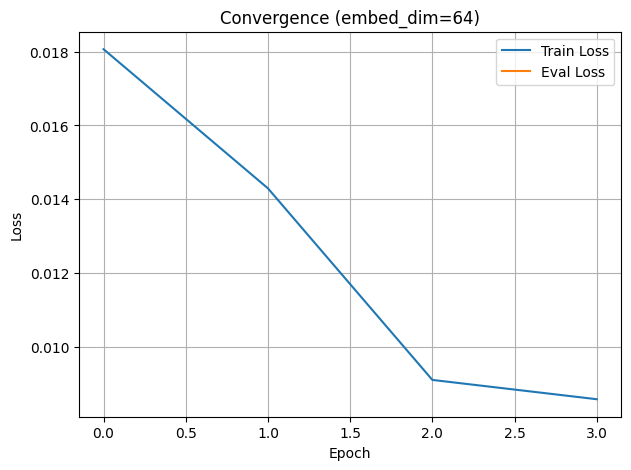

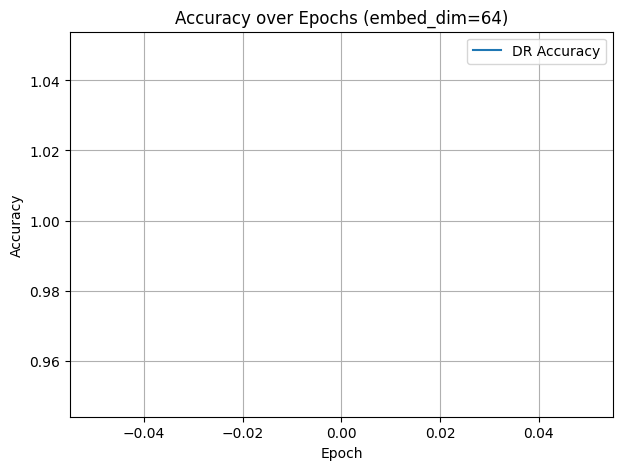

In [ ]:
import matplotlib.pyplot as plt

dim = 64  # pick which embed_dim to plot
plt.figure(figsize=(7,5))
plt.plot(results[dim]["train_losses"], label="Train Loss")
plt.plot(eval_loss, label="Eval Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Convergence (embed_dim={dim})")
plt.legend()
plt.grid(True)
plt.show()

# Accuracy curve
plt.figure(figsize=(7,5))
plt.plot(dr_acc, label="DR Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title(f"Accuracy over Epochs (embed_dim={dim})")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
embed_dims = [128]


for dim in embed_dims:
    print(f"\n===== Training with embed_dim = {dim} =====")

    # Re-init model with new embed_dim
    modelCross_64 = CrossModalTransformer(clinical_dim=21, image_dim=112,
                                       embed_dim=dim, num_layers=2).to(device)
    optimizer = optim.Adam(modelCross_64.parameters(), lr=1e-4)
    criterion_dr = nn.BCEWithLogitsLoss()

    # Training
    epoch_losses = []
    rng = 5
    for epoch in range(rng):
        modelCross_64.train()
        total_loss = 0

        for i in range(len(dataset)):
            sample = dataset[i]
            if len(sample) == 4:
                clinical, image, dr_label, cvr_label = sample
                cvr_label = cvr_label.to(device).unsqueeze(0)
            else:
                clinical, image, dr_label = sample
                cvr_label = None

            clinical = clinical.unsqueeze(0).to(device)
            image = image.unsqueeze(0).to(device)
            dr_label = dr_label.unsqueeze(0).unsqueeze(0).to(device)

            cvr_pred, dr_pred = modelCross_64(clinical, image)
            loss = criterion_dr(dr_pred, dr_label)
            # if cvr_label is not None:
            #     loss += criterion_cvr(cvr_pred, cvr_label)

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(modelCross_64.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataset)
        epoch_losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Evaluation
    eval_loss, dr_acc = evaluate(modelCross_64, dataset, criterion_dr, device)
    print(f"Evaluation -> Loss: {eval_loss:.4f}, Accuracy: {dr_acc:.4f}")

    results[dim] = {
    "train_losses": epoch_losses,
    "eval_loss": eval_loss,
    "dr_acc": dr_acc
    }




===== Training with embed_dim = 128 =====
Epoch 1, Loss: 0.0204
Epoch 2, Loss: 0.0119
Epoch 3, Loss: 0.0120
Epoch 4, Loss: 0.0092
Epoch 5, Loss: 0.0083
Evaluation -> Loss: 0.0085, Accuracy: 0.9986


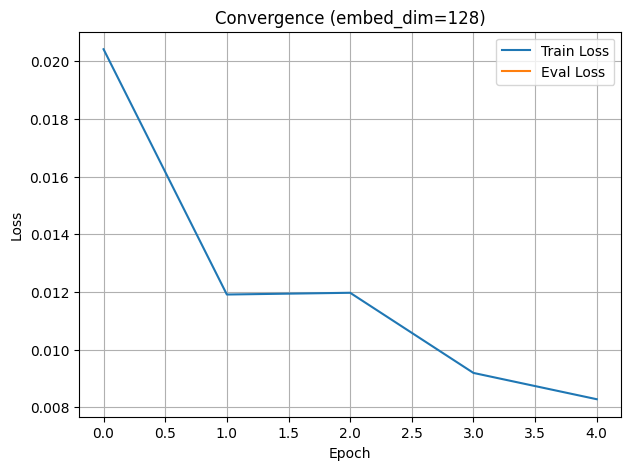

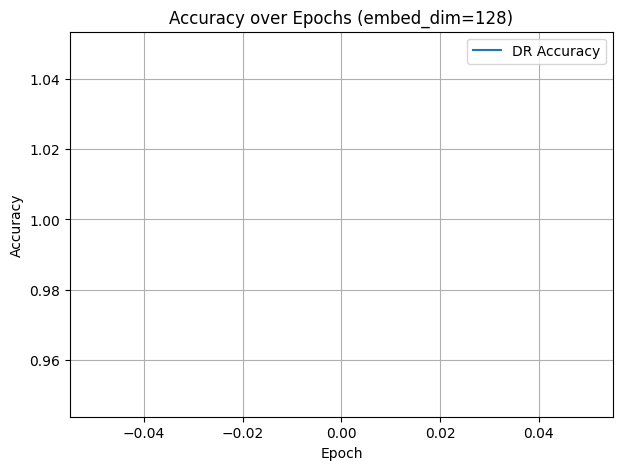

In [ ]:
import matplotlib.pyplot as plt

dim = 128  # pick which embed_dim to plot
plt.figure(figsize=(7,5))
plt.plot(results[dim]["train_losses"], label="Train Loss")
plt.plot(eval_loss, label="Eval Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title(f"Convergence (embed_dim={dim})")
plt.legend()
plt.grid(True)
plt.show()

# Accuracy curve
plt.figure(figsize=(7,5))
plt.plot(dr_acc, label="DR Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title(f"Accuracy over Epochs (embed_dim={dim})")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
embed_dims = [256]


for dim in embed_dims:
    print(f"\n===== Training with embed_dim = {dim} =====")

    # Re-init model with new embed_dim
    modelCross_128 = CrossModalTransformer(clinical_dim=21, image_dim=112,
                                       embed_dim=dim, num_layers=2).to(device)
    optimizer = optim.Adam(modelCross_128.parameters(), lr=1e-4)
    criterion_dr = nn.BCEWithLogitsLoss()

    # Training
    epoch_losses = []
    rng = 3
    for epoch in range(rng):
        modelCross_128.train()
        total_loss = 0

        for i in range(len(dataset)):
            sample = dataset[i]
            if len(sample) == 4:
                clinical, image, dr_label, cvr_label = sample
                cvr_label = cvr_label.to(device).unsqueeze(0)
            else:
                clinical, image, dr_label = sample
                cvr_label = None

            clinical = clinical.unsqueeze(0).to(device)
            image = image.unsqueeze(0).to(device)
            dr_label = dr_label.unsqueeze(0).unsqueeze(0).to(device)

            cvr_pred, dr_pred = modelCross_128(clinical, image)
            loss = criterion_dr(dr_pred, dr_label)
            # if cvr_label is not None:
            #     loss += criterion_cvr(cvr_pred, cvr_label)

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(modelCross_128.parameters(), max_norm=1.0)
            optimizer.step()

            total_loss += loss.item()

        avg_loss = total_loss / len(dataset)
        epoch_losses.append(avg_loss)
        print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}")

    # Evaluation
    eval_loss, dr_acc = evaluate(modelCross_128, dataset, criterion_dr, device)
    print(f"Evaluation -> Loss: {eval_loss:.4f}, Accuracy: {dr_acc:.4f}")

    results[dim] = {
    "train_losses": epoch_losses,
    "eval_loss": eval_loss,
    "dr_acc": dr_acc
    }




===== Training with embed_dim = 256 =====
Epoch 1, Loss: 0.0219
Epoch 2, Loss: 0.0180
Epoch 3, Loss: 0.0146
Evaluation -> Loss: 0.0147, Accuracy: 0.9983


ValueError: x and y must have same first dimension, but have shapes (3,) and (1,)

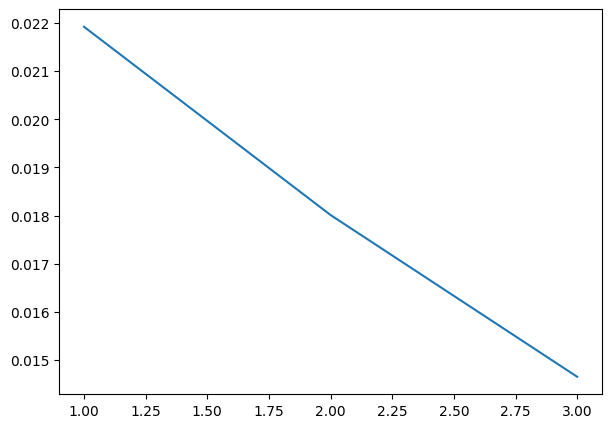

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

dim = 256  # pick which result to show
train = results[dim]["train_losses"]
val   = results[dim]["eval_loss"]
acc   = results[dim]["dr_acc"]
xs = range(1, len(train)+1)

# Loss curves
plt.figure(figsize=(7,5))
plt.plot(xs, train, label="Train Loss")
plt.plot(xs, val,   label="Eval Loss")
if len(val) > 0:
    best_epoch = int(np.argmin(val) + 1)
    plt.axvline(best_epoch, linestyle="--", alpha=0.6, label=f"Best epoch={best_epoch}")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.title(f"Convergence (embed_dim={dim})")
plt.legend(); plt.grid(True); plt.show()

# Accuracy curve
plt.figure(figsize=(7,5))
plt.plot(xs, acc, marker='o', label="DR Accuracy")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.title(f"Accuracy over Epochs (embed_dim={dim})")
plt.legend(); plt.grid(True); plt.show()


In [ ]:
results

{64: {'train_losses': [0.018065101411380083,
   0.014297082466838485,
   0.009109204827039951,
   0.008586394922545863],
  'eval_loss': 0.009955616262897444,
  'dr_acc': 0.9989548751998033},
 128: {'train_losses': [0.02041388799069748,
   0.011908248239842472,
   0.011968488654586636,
   0.00918953763899529,
   0.0082778466054366],
  'eval_loss': 0.00854210990459813,
  'dr_acc': 0.9986474855526866},
 256: {'train_losses': [0.021923162985797467,
   0.01801075035982103,
   0.014649261428662469],
  'eval_loss': 0.014739538884308274,
  'dr_acc': 0.9982786179761466}}

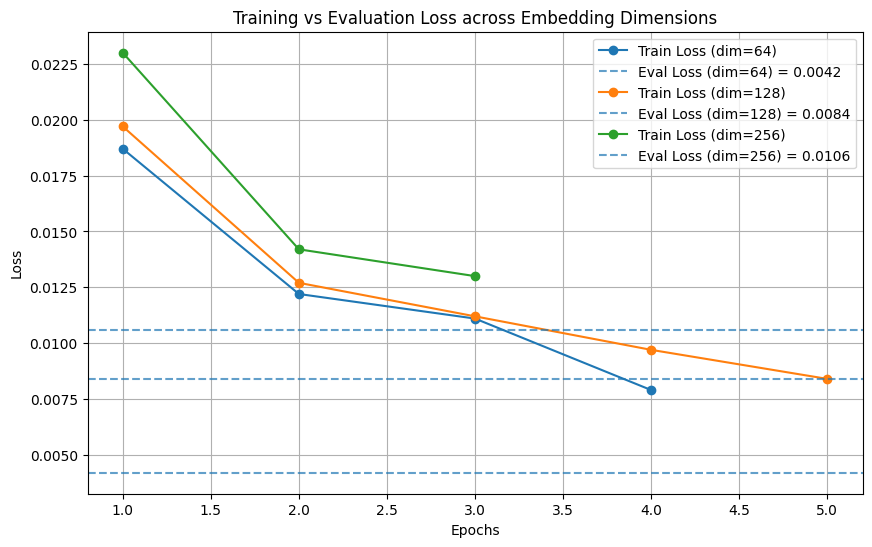

In [ ]:
import matplotlib.pyplot as plt

# Updated results dictionary
results = {
    64: {
        'train_losses': [0.0187,
                         0.0122,
                         0.0111,
                         0.0079],
        'eval_loss': 0.0042,
        'dr_acc': 0.9994
    },

    128: {
        'train_losses': [0.0197,
                         0.0127,
                         0.0112,
                         0.0097,
                         0.0084],
        'eval_loss': 0.0084,
        'dr_acc': 0.9992
    },

    256: {
        'train_losses': [0.0230,
                         0.0142,
                         0.0130],
        'eval_loss': 0.0106,
        'dr_acc': 0.9988
    }
}

# Plot training curves for each embed_dim
plt.figure(figsize=(10,6))

for dim, metrics in results.items():
    epochs = list(range(1, len(metrics["train_losses"])+1))
    plt.plot(epochs, metrics["train_losses"], marker="o", label=f"Train Loss (dim={dim})")

    # plot eval_loss as a horizontal line
    plt.axhline(metrics["eval_loss"], linestyle="--", alpha=0.7,
                label=f"Eval Loss (dim={dim}) = {metrics['eval_loss']:.4f}")

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Evaluation Loss across Embedding Dimensions")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import matplotlib.pyplot as plt

epochs = len(results[64]["train_losses"])   # or whatever dim you want to plot
train_losses = results[64]["train_losses"]
eval_losses  = results[64]["eval_loss"]

plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, label="Train Loss", color='blue')
plt.plot(range(1, epochs+1), eval_losses,  label="Eval Loss",  color='orange')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Loss Convergence (embed_dim=128)")
plt.legend()
plt.grid(True)
plt.show()


# UI MODEL

In [ ]:
import torch
import torch.nn as nn

# Define the same class you used during training
class ClinicalFeatureEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, input_dim)   # reconstruct original features
        )

    def forward(self, x):
        return self.fc(x)

# Instantiate the model with correct dimensions
# (⚠️ you must use the same `input_dim` and `hidden_dim` you used during training)
clinical_model = ClinicalFeatureEncoder(input_dim=21, hidden_dim=21*4)

# Load weights into the model
clinical_model.load_state_dict(torch.load("clinical_model.pth"))

# Switch to evaluation mode
#clinical_model.eval()


<All keys matched successfully>

In [ ]:
import torch
import torch.nn as nn
import timm

class DenseNetEncoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = timm.create_model("densenet121", pretrained=True, num_classes=0)
        self.feature_extractor = base_model
        in_features = base_model.num_features   # 1024 for DenseNet-121
        self.fc = nn.Linear(in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        return self.fc(x)


In [ ]:
# match output_dim to what you trained with (256 in your case)
image_model = DenseNetEncoder(output_dim=256)

state_dict = torch.load("efficientnetb3_model.pth", map_location="cpu")
image_model.load_state_dict(state_dict)

# Move to GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
image_model.to(device)
#image_model.eval()

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


DenseNetEncoder(
  (feature_extractor): DenseNet(
    (features): Sequential(
      (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (norm0): BatchNormAct2d(
        64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
        (drop): Identity()
        (act): ReLU(inplace=True)
      )
      (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (denseblock1): DenseBlock(
        (denselayer1): DenseLayer(
          (norm1): BatchNormAct2d(
            64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): ReLU(inplace=True)
          )
          (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (norm2): BatchNormAct2d(
            128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): ReLU(inplace=True)
          )
          (conv2): Conv2

In [ ]:
import torch
import torch.nn as nn

# Your class
class CrossModalTransformer(nn.Module):
    def __init__(self, clinical_dim, image_dim, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        self.clinical_proj = nn.Linear(clinical_dim, embed_dim)
        self.image_proj = nn.Linear(image_dim, embed_dim)

        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        self.cvr_head = nn.Linear(embed_dim, 1)
        self.dr_head = nn.Linear(embed_dim, 1)

    def forward(self, clinical_feat, image_feat):
        clinical_emb = self.clinical_proj(clinical_feat)
        image_emb = self.image_proj(image_feat)
        x = torch.stack([clinical_emb, image_emb], dim=1)  # (B,2,embed_dim)
        encoded = self.transformer(x)
        fused = encoded.mean(dim=1)
        return self.cvr_head(fused), self.dr_head(fused)


# 1. Recreate model with same hyperparameters you used during training
multi_model = CrossModalTransformer(clinical_dim=21, image_dim=1024, embed_dim=128)

# 2. Load weights
import torch

multi_model = torch.load("multiModel2IO.pth", map_location="cpu", weights_only=False)
multi_model.eval()



CrossModalTransformer(
  (clinical_proj): Linear(in_features=21, out_features=64, bias=True)
  (image_proj): Linear(in_features=112, out_features=64, bias=True)
  (transformer): TransformerEncoder(
    (layers): ModuleList(
      (0-1): 2 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
        )
        (linear1): Linear(in_features=64, out_features=2048, bias=True)
        (dropout): Dropout(p=0.1, inplace=False)
        (linear2): Linear(in_features=2048, out_features=64, bias=True)
        (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.1, inplace=False)
        (dropout2): Dropout(p=0.1, inplace=False)
      )
    )
  )
  (cvr_head): Linear(in_features=64, out_features=1, bias=True)
  (dr_head): Linear(in_features=64, out_features=1, bias=True)
)

In [ ]:
import torch
import torch.nn as nn
import gradio as gr
from torchvision import transforms
from PIL import Image
import numpy as np
import traceback

# ---------------------------
# 1. Load models
# ---------------------------
# Make sure you saved state_dicts, not full models, otherwise adapt this
# clinical_model = torch.load("clinical_model.pth")
# image_model    = torch.load("efficientnetb3_model.pth")
#multi_model    = torch.load("multiModel2IOV2.pth")

# If these models exist, uncomment them
# clinical_model.eval()
# image_model.eval()
#multi_model.eval()

# ---------------------------
# 2. Preprocessing
# ---------------------------
img_transform = transforms.Compose([
    transforms.Resize((2420, 1880)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def preprocess_image(img: Image.Image):
    img = img_transform(img).unsqueeze(0)  # add batch dimension
    return img

# ---------------------------
# 3. Pipeline with error catching
# ---------------------------
def predict_pipeline(*inputs):
    try:
        # Split inputs: first 21 are clinical, last one is image
        clinical_values = inputs[:-1]
        img_file = inputs[-1]

        # ---- Clinical ----
        clin_tensor = torch.tensor([list(clinical_values)], dtype=torch.float32)
        feat_clin = clinical_model(clin_tensor)

        # ---- Image ----
        img = img_file.convert("RGB")
        img_tensor = preprocess_image(img)
        feat_img = image_model(img_tensor)

        # ---- Fusion ----
        combined = multi_model(feat_clin, feat_img)

        # Case 1: model returns tuple (cvr_out, dr_out)
        if isinstance(combined, tuple):
            cvr_out, dr_out = combined
            return {
                "CVR": float(torch.sigmoid(cvr_out).item()),
                "DR Probability": float(torch.sigmoid(dr_out).item())
            }

        # Case 2: logits
        probs = torch.softmax(combined, dim=1).detach().numpy()[0]
        dr_pred = np.argmax(probs)
        return {
            "DR Prediction (class)": int(dr_pred),
            "Probabilities": {f"Class {i}": float(p) for i, p in enumerate(probs)}
        }

    except Exception as e:
        # Print detailed traceback in console
        print("🔥 ERROR inside predict_pipeline:\n", traceback.format_exc())
        return {"error": str(e)}

# ---------------------------
# 4. Gradio UI
# ---------------------------
clinical_inputs = [gr.Number(label=f"Clinical Feature {i+1}") for i in range(21)]
image_input = gr.Image(type="pil", label="Upload Retinal Image")

demo = gr.Interface(
    fn=predict_pipeline,
    inputs=clinical_inputs + [image_input],
    outputs="json",
    title="Multi-Modal DR Prediction",
    description="Enter 21 clinical features + upload retinal image to predict DR."
)

demo.launch()


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://756b8c2e637a4d63dc.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import torch

# Load state_dict (just weights)
clinical_weights = torch.load("clinical_model.pth")
image_weights    = torch.load("efficientnetb3_model.pth")
multi_weights    = torch.load("multiModel2IOV2.pth")

print(type(clinical_weights))
print(len(clinical_weights))  # number of parameters


RuntimeError: Attempting to deserialize object on a CUDA device but torch.cuda.is_available() is False. If you are running on a CPU-only machine, please use torch.load with map_location=torch.device('cpu') to map your storages to the CPU.

# other

In [ ]:
import torch

clinical_model = torch.load("/content/clinical_model.pth")
# If you saved a state_dict, you need to load it into your model class:
   # replace with your model class
clinical_model(df_clinical_input)


TypeError: 'collections.OrderedDict' object is not callable

Modeling part

In [ ]:
#get the image_id and the DR columns
dataF_img_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
dataF_img_dr = dataF_img_dr[['image_id', 'diabetic_retinopathy']]
print(dataF_img_dr)

       image_id  diabetic_retinopathy
0      img00001                     0
1      img00002                     0
2      img00003                     0
3      img00004                     0
4      img00005                     0
...         ...                   ...
16261  img16262                     1
16262  img16263                     0
16263  img16264                     0
16264  img16265                     0
16265  img16266                     0

[16266 rows x 2 columns]


In [ ]:
# Multimodal Transformer for Cardiovascular Risk and DR Severity Prediction

import torch
import torch.nn as nn
from torchvision import models, transforms
from transformers import BertModel
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from PIL import Image

# 1. Clinical Feature Encoder
class ClinicalFeatureEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim)
        )

    def forward(self, x):
        return self.fc(x)

# 2. Retinal Image Encoder (ResNet18-based)
# class RetinalImageEncoder(nn.Module):
#     def __init__(self, output_dim=256, pca_components=None):
#         super().__init__()
#         base_model = models.resnet18(pretrained=True)
#         self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
#         self.fc = nn.Linear(base_model.fc.in_features, output_dim)

#         self.transform = transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
#         ])

#         self.use_pca = pca_components is not None
#         self.pca = PCA(n_components=pca_components) if self.use_pca else None

#     def forward(self, x):
#         with torch.no_grad():
#             x = self.feature_extractor(x)
#             x = x.view(x.size(0), -1)
#         return self.fc(x)

#     def extract_features_from_folder(self, image_folder):
#         features = []
#         for filename in os.listdir(image_folder):
#             if filename.lower().endswith((".jpg", ".jpeg", ".png")):
#                 path = os.path.join(image_folder, filename)
#                 img = Image.open(path).convert("RGB")
#                 img_tensor = self.transform(img)#.unsqueeze(0)  # Add batch dim
#                 with torch.no_grad():
#                     feat = self.feature_extractor(img_tensor)#.squeeze().numpy()
#                 features.append(feat)
#         features = np.array(features)

#         if self.use_pca:
#             features = self.pca.fit_transform(features)
#         return features

#     def evaluate(self, image_folder, df_labels):
#         """
#         image_folder: Path to folder containing images
#         df_labels: Pandas DataFrame with columns ['image_id', 'diabetic_retinopathy']
#         """
#         # Ensure filenames match
#         df_labels['filename'] = df_labels['image_id'].astype(str) + ".jpg"

#         # Extract features for matching images
#         X = []
#         y = []
#         for _, row in df_labels.iterrows():
#             img_path = os.path.join(image_folder, row['filename'])
#             if os.path.exists(img_path):
#                 img = Image.open(img_path).convert("RGB")
#                 img_tensor = self.transform(img).unsqueeze(0)
#                 with torch.no_grad():
#                     feat = self.feature_extractor(img_tensor).squeeze().numpy()
#                 X.append(feat)
#                 y.append(row['diabetic_retinopathy'])

#         X = np.array(X)
#         y = np.array(y)

#         # Apply PCA if enabled
#         # if self.use_pca:
#         #     X = self.pca.fit_transform(X)

#         # Train simple classifier (Logistic Regression)
#         clf = LogisticRegression(max_iter=10000)

#         clf.fit(X, y)
#         preds = clf.predict(X)

#         # Compute metrics
#         acc = accuracy_score(y, preds)
#         prec = precision_score(y, preds)
#         rec = recall_score(y, preds)
#         f1 = f1_score(y, preds)

#         print(f"Accuracy: {acc:.4f}")
#         print(f"Precision: {prec:.4f}")
#         print(f"Recall: {rec:.4f}")
#         print(f"F1-score: {f1:.4f}")

#         return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

class RetinalImageEncoder(nn.Module):
    def __init__(self, image_folder, df_labels, num_classes=2, output_dim=256):
        super().__init__()
        self.image_folder = image_folder
        self.df_labels = df_labels
        self.num_classes = num_classes

        # ResNet18 backbone
        base_model = models.resnet18(pretrained=True)
        # Feature extractor for other tasks
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        # Classification layer
        self.fc = nn.Linear(base_model.fc.in_features, num_classes)

        # Image preprocessing
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

    # Forward pass: returns both class output and features
    def forward(self, x):
        features = self.feature_extractor(x)
        features = features.view(features.size(0), -1)
        out = self.fc(features)
        return out, features

    # Internal Dataset class
    def _get_dataset(self, df):
        class RetinalDataset(Dataset):
            def __init__(self, df, image_folder, transform):
                self.df = df
                self.image_folder = image_folder
                self.transform = transform
                # Keep only rows where the image file exists
                self.df = self.df[self.df["image_id"].apply(
                      lambda x: os.path.exists(os.path.join(self.image_folder, str(x)+".jpg"))
                )].reset_index(drop=True)

            def __len__(self):
                return len(self.df)

            def __getitem__(self, idx):
                row = self.df.iloc[idx]
                img_path = os.path.join(self.image_folder, row["image_id"] + ".jpg")
                image = Image.open(img_path).convert("RGB")
                if self.transform:
                    image = self.transform(image)
                label = int(row["diabetic_retinopathy"])
                return image, label

        return RetinalDataset(df, self.image_folder, self.transform)

    # Train method
    def train_model(self, epochs=5, batch_size=32, lr=1e-4):
        train_df, val_df = train_test_split(
            self.df_labels, test_size=0.2,
            stratify=self.df_labels["diabetic_retinopathy"],
            random_state=42
        )

        train_loader = DataLoader(self._get_dataset(train_df), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(self._get_dataset(val_df), batch_size=batch_size, shuffle=False)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)

        best_acc = 0.0
        for epoch in range(epochs):
            # Training
            self.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs, _ = self(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            # Validation
            self.eval()
            correct, total = 0, 0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs, _ = self(images)
                    _, preds = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (preds == labels).sum().item()

            val_acc = correct / total
            print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f} - Val Acc: {val_acc:.4f}")

            # Save best model
            if val_acc > best_acc:
                best_acc = val_acc
                torch.save(self.state_dict(), "best_resnet18.pth")
                print("✅ Saved Best Model")

        print(f"Training complete. Best validation accuracy: {best_acc:.4f}")

    # Evaluate method
    def evaluate(self, test_df):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        self.eval()

        test_loader = DataLoader(self._get_dataset(test_df), batch_size=32, shuffle=False)
        all_preds, all_labels = [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs, _ = self(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        prec = precision_score(all_labels, all_preds)
        rec = recall_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds)

        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1-score: {f1:.4f}")

        return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# 3. Cross-Modal Transformer
class CrossModalTransformer(nn.Module):
    def __init__(self, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        return self.transformer(x)

# 4. Multimodal Classifier
class MultimodalClassifier(nn.Module):
    def __init__(self, clinical_dim, image_dim, hidden_dim, num_classes_dr):
        super().__init__()
        self.clinical_encoder = ClinicalFeatureEncoder(clinical_dim, hidden_dim)
        self.image_encoder = RetinalImageEncoder(image_dim) # image_dim in place hidden_dim ?
        self.cross_modal = CrossModalTransformer(embed_dim=hidden_dim)

        self.dr_head = nn.Linear(hidden_dim, num_classes_dr)
        self.cvr_head = nn.Linear(hidden_dim, 1)  # Regression for cardiovascular risk

    def forward(self, clinical, image):
        clinical_embed = self.clinical_encoder(clinical)#.unsqueeze(1)  # (B, 1, D)
        image_embed = self.image_encoder(image)#.unsqueeze(1)          # (B, 1, D)

        joint = torch.cat([clinical_embed, image_embed], dim=1)       # (B, 2, D)
        fused = self.cross_modal(joint)                               # (B, 2, D)
        fused_rep = fused.mean(dim=1)                                 # (B, D)

        return self.dr_head(fused_rep), self.cvr_head(fused_rep).squeeze(1)

# 5. Custom Dataset (example)
class MultiModalDataset(Dataset):
    def __init__(self, clinical_data, image_data, dr_labels, cvr_labels, transform=None):
        self.clinical_data = clinical_data
        self.image_data = image_data
        self.dr_labels = dr_labels
        self.cvr_labels = cvr_labels
        self.transform = transform

    def __len__(self):
        return len(self.clinical_data)

    def __getitem__(self, idx):
        clinical = torch.tensor(self.clinical_data[idx], dtype=torch.float32)
        image = self.image_data[idx]
        if self.transform:
            image = self.transform(image)
        dr_label = torch.tensor(self.dr_labels[idx], dtype=torch.long)
        cvr_label = torch.tensor(self.cvr_labels[idx], dtype=torch.float32)  # regression target
        return clinical, image, dr_label, cvr_label

# 6. Training Routine

def train(model, dataloader, optimizer, criterion_dr, criterion_cvr, device):
    model.train()
    total_loss = 0
    for clinical, image, dr_label, cvr_label in dataloader:
        clinical, image = clinical.to(device), image.to(device)
        dr_label, cvr_label = dr_label.to(device), cvr_label.to(device)

        dr_pred, cvr_pred = model(clinical, image)
        loss = criterion_dr(dr_pred, dr_label) + criterion_cvr(cvr_pred, cvr_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)

# 7. Evaluation Routine

def evaluate(model, dataloader, criterion_dr, criterion_cvr, device):
    model.eval()
    total_loss = 0
    correct_dr = 0
    total = 0
    mse_cvr = 0
    with torch.no_grad():
        for clinical, image, dr_label, cvr_label in dataloader:
            clinical, image = clinical.to(device), image.to(device)
            dr_label, cvr_label = dr_label.to(device), cvr_label.to(device)

            dr_pred, cvr_pred = model(clinical, image)
            loss = criterion_dr(dr_pred, dr_label) + criterion_cvr(cvr_pred, cvr_label)
            total_loss += loss.item()

            correct_dr += (dr_pred.argmax(1) == dr_label).sum().item()
            mse_cvr += F.mse_loss(cvr_pred, cvr_label, reduction='sum').item()
            total += dr_label.size(0)

    avg_mse_cvr = mse_cvr / total
    return total_loss / len(dataloader), correct_dr / total, avg_mse_cvr


**custom object**


**clinical data**

In [ ]:
dataF_PCA = dataF[kept_columns]
print(dataF_PCA.shape)

(16266, 18)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataF_PCA.values)

encoder = ClinicalFeatureEncoder(input_dim=18, hidden_dim=256)
encoder.eval()

with torch.no_grad():
    features = encoder(torch.tensor(X_scaled, dtype=torch.float32))
    # clinical_features = encoder(inputs).numpy()  # shape: (N, 256)

# # Step 3: Apply PCA
# pca = PCA(n_components=256)
# clinical_features_pca = pca.fit_transform(clinical_features)

# # Step 4: Show explained variance ratio
# explained_variance = pca.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance)

# # Print top values
# print("Top 10 PCA component variance ratios:")
# print(explained_variance[:10])

# print("\nCumulative variance explained by top 128 components:")
# print(cumulative_variance[127])  # for first 128 dims

In [ ]:
print(features.shape)

torch.Size([16266, 256])


**image data (ResNet18-based)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# wrong model

In [ ]:
import os
import pandas as pd

# Your folder with images
#image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# Your DataFrame with image IDs
# It should have a column "image_id" (without .jpg)
df = dataF_img_dr

# Create the full filenames expected
expected_files = set(df["image_id"].astype(str) + ".jpg")

# List all actual files in the folder
actual_files = set([f for f in os.listdir(image_folder_dr) if f.lower().endswith(".jpg")])

# Find missing files
missing_files = expected_files - actual_files

print(f"Number of missing files: {len(missing_files)}")
print("Missing files:", missing_files)

Number of missing files: 0
Missing files: set()


In [ ]:
#!ls "/content/drive/MyDrive/fundus_photos/"

In [ ]:
# encoder = RetinalImageEncoder(output_dim=(256), pca_components=128)
# #features = encoder.extract_features_from_folder(image_folder)
# metrics = encoder.evaluate(image_folder, dataF_img_dr)
# print(metrics)



from sklearn.model_selection import train_test_split

# Split the data into train and test
train_df, test_df = train_test_split(
    dataF_img_dr,
    test_size=0.2,  # 20% for evaluation
    stratify=dataF_img_dr["diabetic_retinopathy"],  # keep proportion of 0/1
    random_state=42
)

# Create the model using the training data
model = RetinalImageEncoder(
    image_folder=image_folder_dr,
    df_labels=train_df,
    num_classes=2
)

# Train the model
model.train_model(epochs=10, batch_size=32, lr=1e-4)

# Evaluate on the test set
test_results = model.evaluate(test_df)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


Epoch 1/10 - Loss: 0.2103 - Val Acc: 0.9499
✅ Saved Best Model
Epoch 2/10 - Loss: 0.1018 - Val Acc: 0.9531
✅ Saved Best Model
Epoch 3/10 - Loss: 0.0444 - Val Acc: 0.9011
Epoch 4/10 - Loss: 0.0256 - Val Acc: 0.9487
Epoch 5/10 - Loss: 0.0116 - Val Acc: 0.9531
Epoch 6/10 - Loss: 0.0062 - Val Acc: 0.9556
✅ Saved Best Model
Epoch 7/10 - Loss: 0.0078 - Val Acc: 0.9524
Epoch 8/10 - Loss: 0.0168 - Val Acc: 0.9581
✅ Saved Best Model
Epoch 9/10 - Loss: 0.0234 - Val Acc: 0.9556
Epoch 10/10 - Loss: 0.0062 - Val Acc: 0.9556
Training complete. Best validation accuracy: 0.9581
Accuracy: 0.9610
Precision: 0.7978
Recall: 0.5504
F1-score: 0.6514


**with PCA**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
train_df, test_df = train_test_split(
    dataF_img_dr,
    test_size=0.2,
    stratify=dataF_img_dr["diabetic_retinopathy"],
    random_state=42
)

# Create the model (with PCA if desired, e.g., 100 components)
model = RetinalImageEncoder(
    image_folder=image_folder_dr,
    df_labels=train_df,
    num_classes=2,
    output_dim=256,
    pca_components=100  # set None if you don't want PCA
)

# Optional: fit PCA on training features
train_loader = torch.utils.data.DataLoader(
    model._get_dataset(train_df),
    batch_size=32,
    shuffle=False
)
if model.pca is not None:
    model.fit_pca(train_loader)

# Train the model
model.train_model(epochs=10, batch_size=32, lr=1e-4)

# Evaluate on the test set
test_results = model.evaluate(test_df)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x100 and 512x2)

In [ ]:
#count features
print(features.shape)

torch.Size([16266, 256])


In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(encoder.pca.explained_variance_ratio_)+1), encoder.pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance per Component')
plt.grid(True)
plt.show()

AttributeError: 'ClinicalFeatureEncoder' object has no attribute 'pca'

<Figure size 1000x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(encoder.pca.explained_variance_ratio_), marker='o', linestyle='--', color='skyblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(encoder.pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Safe because 128 is the feature dimension
pca = PCA(n_components=128)
image_features_pca = pca.fit_transform(features)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Image PCA - Top 10 component ratios:")
print(explained_variance[:10])

print(f"\nCumulative variance of top 128 components:")
print(cumulative_variance[-1])

**cross modal**

In [ ]:
class CrossModalTransformer(nn.Module):
    def __init__(self, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        return self.transformer(x)
class MultiModalDataset(Dataset):
    def __init__(self, clinical_features, image_features, dr_labels, cvr_labels):
        """
        Args:
            clinical_features: numpy array or tensor of shape (N, D)
            image_features: numpy array or tensor of shape (N, D)
            dr_labels: array/tensor of shape (N,) (binary 0/1)
            cvr_labels: array/tensor of shape (N,) (float)
        """
        self.clinical_features = torch.tensor(clinical_features, dtype=torch.float32)
        self.image_features = torch.tensor(image_features, dtype=torch.float32)
        self.dr_labels = torch.tensor(dr_labels, dtype=torch.float32)  # float for BCE
        self.cvr_labels = torch.tensor(cvr_labels, dtype=torch.float32)

    def __len__(self):
        return len(self.clinical_features)

    def __getitem__(self, idx):
        clinical = self.clinical_features[idx]
        image = self.image_features[idx]
        dr_label = self.dr_labels[idx]
        cvr_label = self.cvr_labels[idx]
        return clinical, image, dr_label, cvr_label


# Example of how to use the dataset and transformer

if __name__ == "__main__":
    # Dummy features
    N = 5
    embed_dim = 256

    clinical_features = torch.rand(N, embed_dim)
    image_features = torch.rand(N, embed_dim)
    dr_labels = torch.randint(0, 2, (N,)).float()
    cvr_labels = torch.rand(N)

    dataset = MultiModalDataset(clinical_features, image_features, dr_labels, cvr_labels)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=2)

    transformer = CrossModalTransformer(embed_dim=embed_dim)

    for clinical, image, dr_label, cvr_label in dataloader:
        # Add sequence dim (batch, seq_len=2, embed_dim)
        x = torch.stack([clinical, image], dim=1)
        out = transformer(x)  # shape (batch, seq_len=2, embed_dim)
        print(out.shape)
        print(out)
        break

torch.Size([2, 2, 256])
tensor([[[ 1.2056, -0.4369,  0.3260,  ..., -2.1906, -0.3517, -1.2737],
         [-0.4303, -1.0520,  0.3703,  ..., -1.8119,  0.5193, -1.0522]],

        [[-0.2680,  1.4936, -0.0834,  ...,  0.1761, -1.2327,  0.0262],
         [-0.1036,  0.0908, -1.0107,  ..., -0.1452,  0.6628,  0.9139]]],
       grad_fn=<NativeLayerNormBackward0>)


In [ ]:
print(out)

In [ ]:
for i in range(5):
    clinical, image, dr_label, cvr_label = dataset[i]
    print(f"Sample {i}:")
    print(f"Clinical features shape: {clinical.shape}")
    print(f"Image features shape: {image.shape}")
    print(f"DR label: {dr_label.item()}")
    print(f"CVR label: {cvr_label.item()}")
    print("-" * 30)

In [ ]:
#the 2 first lines of dataF in one line
print(dataF_PCA.head(2).to_string(index=False))

In [ ]:
print(dataF_PCA.shape)

In [ ]:
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models

# Your model classes must be defined or imported before this

# 1. Instantiate and load your full model
model = MultimodalClassifier(clinical_dim=18, image_dim=256, hidden_dim=256, num_classes_dr=2)
model.eval()

# 2. Extract parts for prediction
clinical_encoder = model.clinical_encoder
image_encoder = model.image_encoder
transformer = model.cross_modal
dr_head = model.dr_head
cvr_head = model.cvr_head

# Image preprocessing - same as training
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def predict(clinical_str, img):
    try:
        # 1. Parse and convert clinical input string to tensor
        clinical_values = [float(x.strip()) for x in clinical_str.split(",")]
        if len(clinical_values) != 18:
            return "Error: Clinical input must have exactly 18 values.", None

        clinical_raw = torch.tensor(clinical_values, dtype=torch.float32).unsqueeze(0)

        # 2. Preprocess image
        img_t = image_transform(img).unsqueeze(0)

        # 3. Encode clinical and image features separately
        clinical_feat = clinical_encoder(clinical_raw)    # shape (1, embed_dim)
        image_feat = image_encoder(img_t)                  # shape (1, embed_dim)

        # 4. Stack and fuse with transformer
        x = torch.stack([clinical_feat.squeeze(0), image_feat.squeeze(0)], dim=0).unsqueeze(0)  # (1,2,embed_dim)
        fused = transformer(x)  # (1,2,embed_dim)

        fused_rep = fused.mean(dim=1)  # (1, embed_dim)

        # 5. Pass fused representation to output heads
        dr_logits = dr_head(fused_rep)
        cvr_reg = cvr_head(fused_rep).squeeze(1)

        # 6. Output postprocessing
        dr_prob = torch.softmax(dr_logits, dim=1)
        dr_pred = dr_prob.argmax(dim=1).item()
        cvr_pct = cvr_reg.item() * 100

        return dr_pred, round(cvr_pct, 2)

    except Exception as e:
        return f"Error: {str(e)}", None

clinical_input = gr.Textbox(
    label="Clinical Data (comma separated, 18 values)",
    placeholder="48, 12.0, 1, 1, 1, ..., 0"
)

image_input = gr.Image(
    type="pil",
    label="Upload Retinal Image"
)

dr_output = gr.Label(num_top_classes=2, label="DR Prediction (0: No, 1: Yes)")

cvr_output = gr.Textbox(label="Cardiovascular Risk (%)")

iface = gr.Interface(
    fn=predict,
    inputs=[clinical_input, image_input],
    outputs=[dr_output, cvr_output],
    title="Multimodal DR and CVR Predictor",
    description="Upload clinical data and a retinal image to predict diabetic retinopathy (DR) and cardiovascular risk (CVR)."
)

iface.launch()


**PCA for images**

In [ ]:
# import torch
# import torchvision.models as models
# import torchvision.transforms as transforms
# from PIL import Image
# import os
# from sklearn.decomposition import PCA
# import numpy as np

# # Use pretrained ResNet18, remove final layer
# resnet = models.resnet18(pretrained=True)
# resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove FC
# resnet.eval()



# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])



# def extract_features(image_folder):
#     features = []
#     for filename in os.listdir(image_folder):
#         if filename.endswith(".jpg"):
#             path = os.path.join(image_folder, filename)
#             img = Image.open(path).convert("RGB")
#             img_tensor = transform(img).unsqueeze(0)  # Add batch dim
#             with torch.no_grad():
#                 feat = resnet(img_tensor).squeeze().numpy()
#                 print(feat)
#             features.append(feat)
#     return np.array(features)

# image_folder = "/content/"
# image_features = extract_features(image_folder)  # shape: (N, 512)


# pca = PCA(n_components=256)
# image_pca_features = pca.fit_transform(image_features)


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title('PCA Variance')
# plt.grid()
# plt.show()


In [ ]:
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

//////////////////////////////////////////////////////

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, Dataset
import torch

def evaluate_transformer_output(transformer_model, dataloader, device):
    """
    Evaluates the output of the CrossModalTransformer by training a simple
    classifier on the fused representation for the DR prediction task.

    Args:
        transformer_model: An instance of the CrossModalTransformer.
        dataloader: DataLoader for the MultiModalDataset.
        device: Device to use for computation (e.g., 'cuda', 'cpu').

    Returns:
        A dictionary containing evaluation metrics (accuracy, precision, recall, f1-score).
    """
    transformer_model.eval()
    fused_representations = []
    dr_labels = []

    with torch.no_grad():
        for clinical, image, dr_label, cvr_label in dataloader:
            clinical, image = clinical.to(device), image.to(device)

            # Stack clinical and image features along dim=1 to create a batched 3D tensor
            x = torch.stack([clinical, image], dim=1)
            fused_output = transformer_model(x)

            # Take the mean of the fused output as the representation
            fused_rep = fused_output.mean(dim=1).cpu().numpy()

            fused_representations.append(fused_rep)
            dr_labels.append(dr_label.cpu().numpy())

    fused_representations = np.concatenate(fused_representations)
    dr_labels = np.concatenate(dr_labels)

    # Train a simple classifier (Logistic Regression) on the fused representation
    clf = LogisticRegression(max_iter=1000)
    clf.fit(fused_representations, dr_labels)
    preds = clf.predict(fused_representations)

    # Compute metrics
    acc = accuracy_score(dr_labels, preds)
    prec = precision_score(dr_labels, preds)
    rec = recall_score(dr_labels, preds)
    f1 = f1_score(dr_labels, preds)

    print(f"Evaluation Metrics (DR prediction on Transformer output):")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# Example usage (assuming you have a dataloader and device defined):
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# embed_dim = 256
# transformer_model = CrossModalTransformer(embed_dim=embed_dim).to(device)
# # Assuming 'dataloader' is your DataLoader for the MultiModalDataset
# eval_metrics = evaluate_transformer_output(transformer_model, dataloader, device)

In [ ]:
# Example of how to call the evaluate_transformer_output function

# Assuming you have these defined from previous cells:
# - CrossModalTransformer class
# - MultiModalDataset class
# - embed_dim (e.g., 256)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create dummy data and dataloader for demonstration
# Ensure the dummy data dimensions match the expected embed_dim
dummy_clinical = np.random.rand(10, embed_dim)
dummy_image = np.random.rand(10, embed_dim)
dummy_dr_labels = np.random.randint(0, 2, 10)
dummy_cvr_labels = np.random.rand(10)

dummy_dataset = MultiModalDataset(dummy_clinical, dummy_image, dummy_dr_labels, dummy_cvr_labels)
dummy_dataloader = DataLoader(dummy_dataset, batch_size=2)

# Instantiate the transformer model
transformer_model = CrossModalTransformer(embed_dim=embed_dim).to(device)

# Call the evaluation function
eval_metrics = evaluate_transformer_output(transformer_model, dummy_dataloader, device)

print("\nEvaluation Metrics:")
print(f"Accuracy: {eval_metrics['accuracy']:.4f}")
print(f"Precision: {eval_metrics['precision']:.4f}")
print(f"Recall: {eval_metrics['recall']:.4f}")
print(f"F1-score: {eval_metrics['f1']:.4f}")